In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [22]:
ds = tfds.load('fashion_mnist', split='train')

In [23]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [24]:
iterator = ds.as_numpy_iterator()

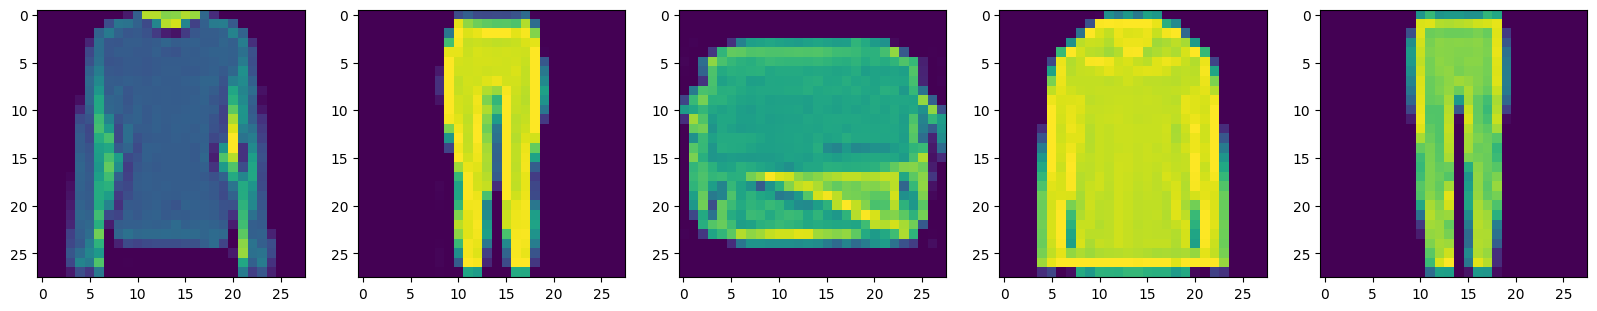

In [25]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
  ax[i].imshow(iterator.next()['image'])

In [26]:
#scale krne ke liye
def scale(data):
    image = data['image']
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.expand_dims(image, -1)
    return image

#ds preprocess
ds = ds.map(scale)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(256)
ds = ds.prefetch(tf.data.AUTOTUNE)

In [27]:
#building generator
def generator():
  model = Sequential()

  model.add(Dense (7*7*128, input_dim= 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D()) #14*14*128
  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D()) #28*28*128
  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, kernel_size=4, padding='same')) #learning
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, kernel_size=4, padding='same')) #learning
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1, kernel_size=4, padding='same', activation='sigmoid')) #28*28*1

  return model

In [28]:
img = generator().predict(np.random.randn(4,128,1))
img.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


(4, 28, 28, 1)

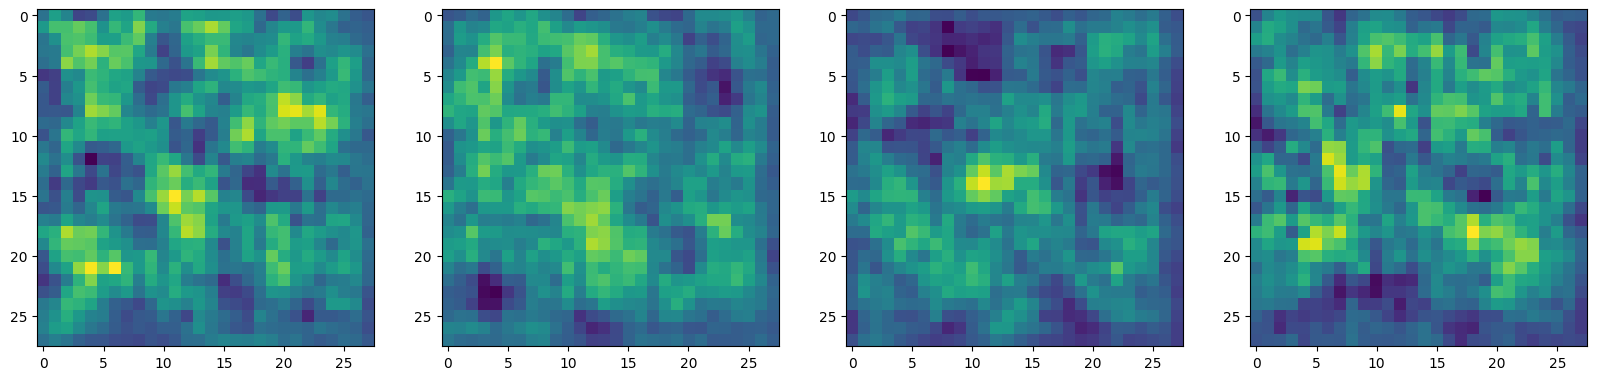

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
for i, display_img in enumerate(img):  # Change variable name here
    ax[i].imshow(np.squeeze(display_img))

In [30]:
#building discriminator
def discriminator():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=5, input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256, kernel_size=5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [31]:
discriminator().predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


array([[0.5002106 ],
       [0.500103  ],
       [0.50024885],
       [0.50022095]], dtype=float32)

In [32]:
#for single picture
img = img[0]
img = np.expand_dims(img, axis=0)
discriminator().predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


array([[0.49376446]], dtype=float32)

Epoch 1/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - d_loss: 1.2037 - g_loss: 1.1243

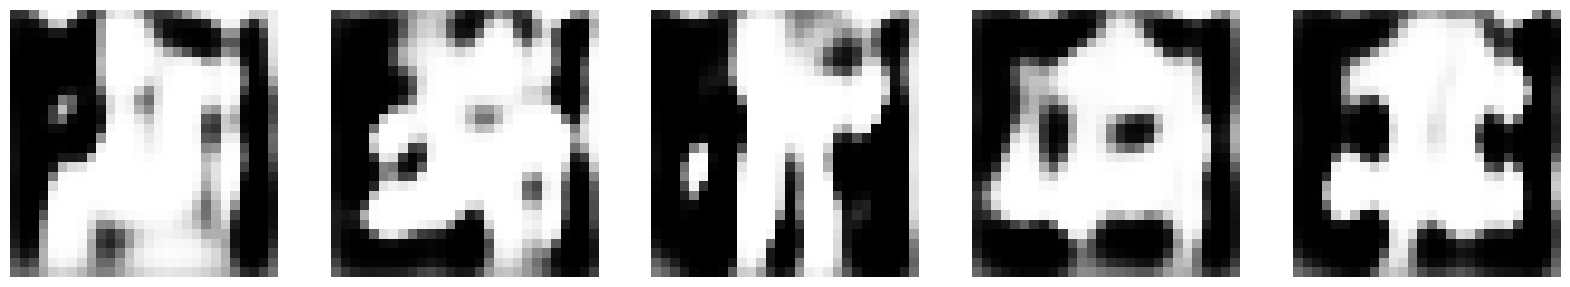

235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 469ms/step - d_loss: 1.2043 - g_loss: 1.1231
Epoch 2/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3388 - g_loss: 0.7920

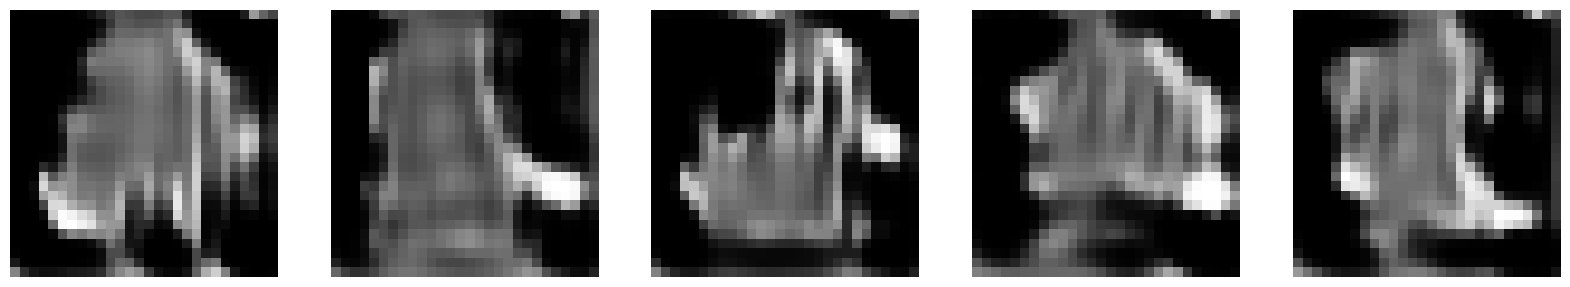

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3386 - g_loss: 0.7932
Epoch 3/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3684 - g_loss: 0.7523

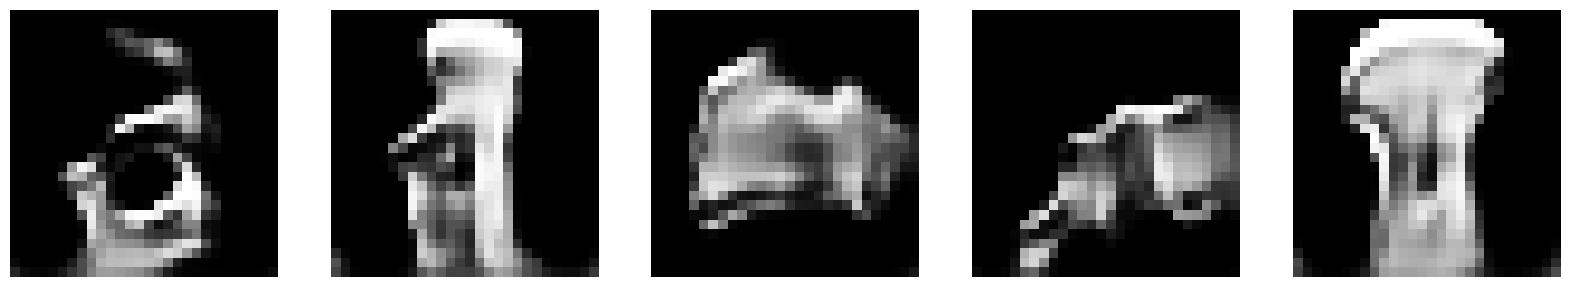

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3684 - g_loss: 0.7522
Epoch 4/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3751 - g_loss: 0.7255

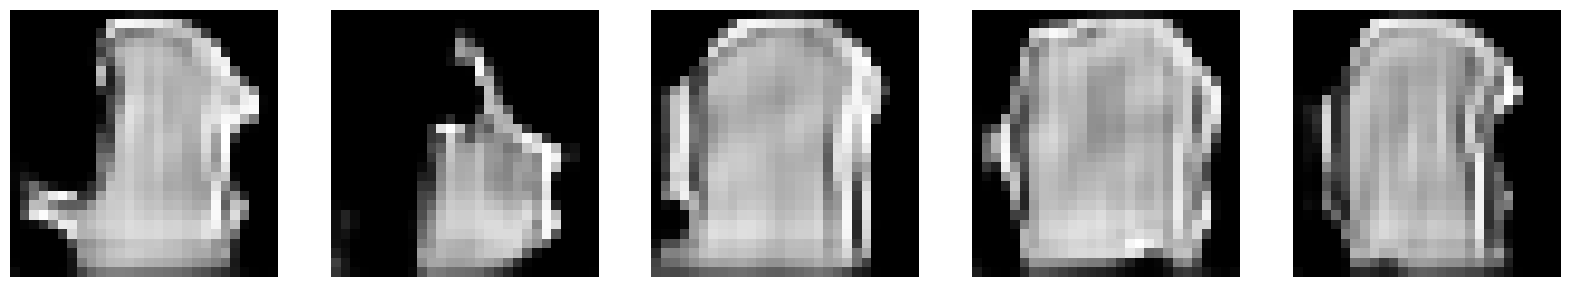

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3751 - g_loss: 0.7256
Epoch 5/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3725 - g_loss: 0.7509

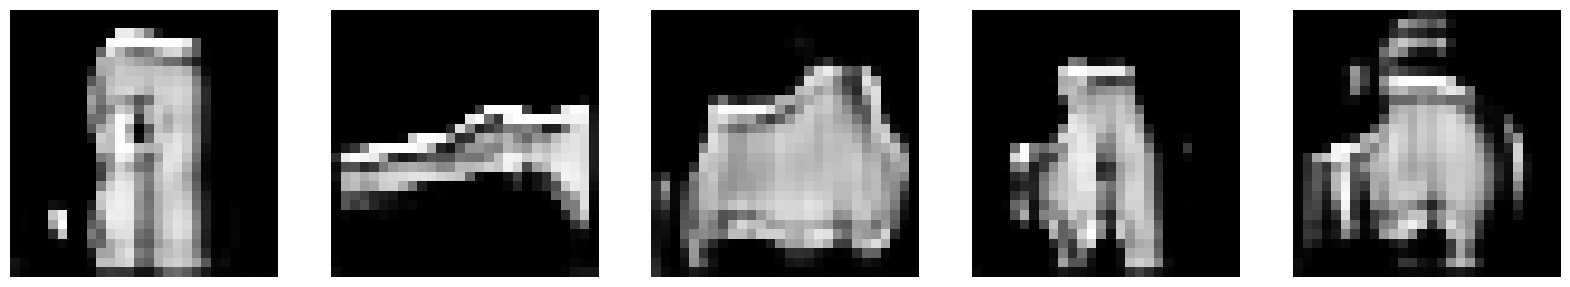

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3725 - g_loss: 0.7507
Epoch 6/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3734 - g_loss: 0.7577

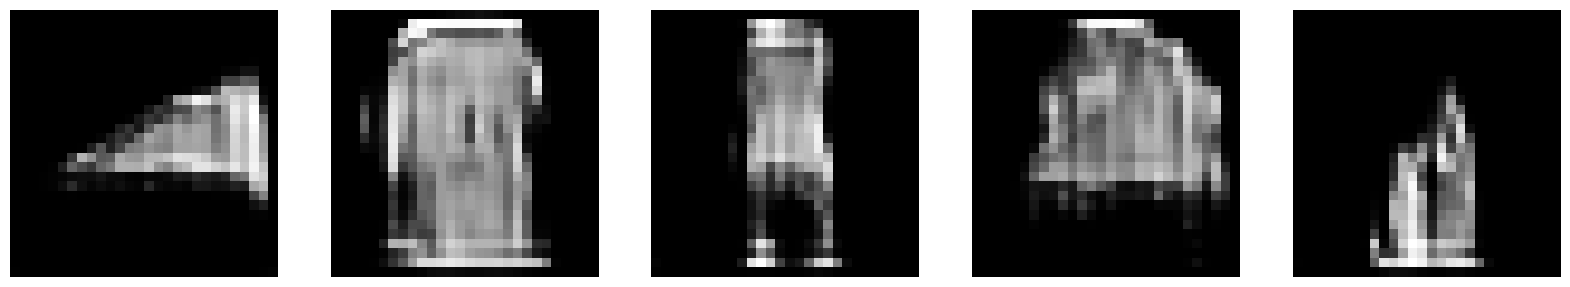

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3734 - g_loss: 0.7578
Epoch 7/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - d_loss: 1.3724 - g_loss: 0.7756

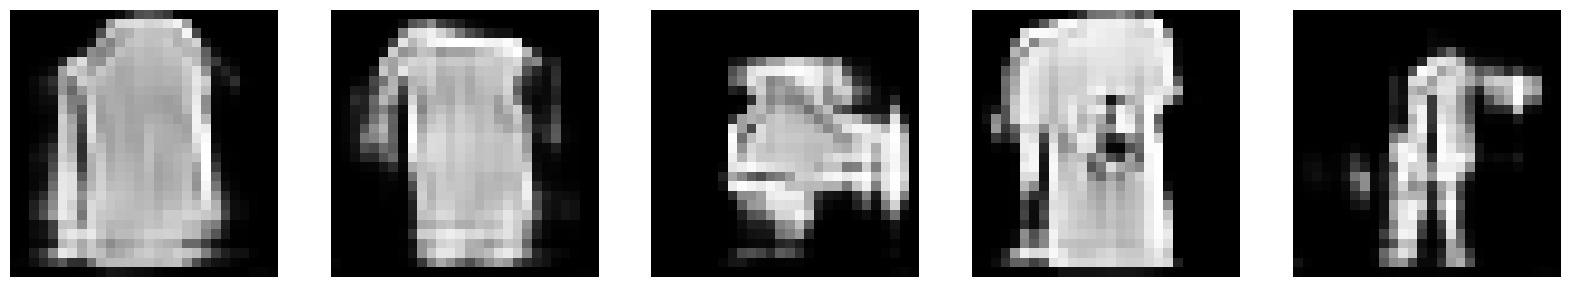

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3724 - g_loss: 0.7756
Epoch 8/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3715 - g_loss: 0.7794

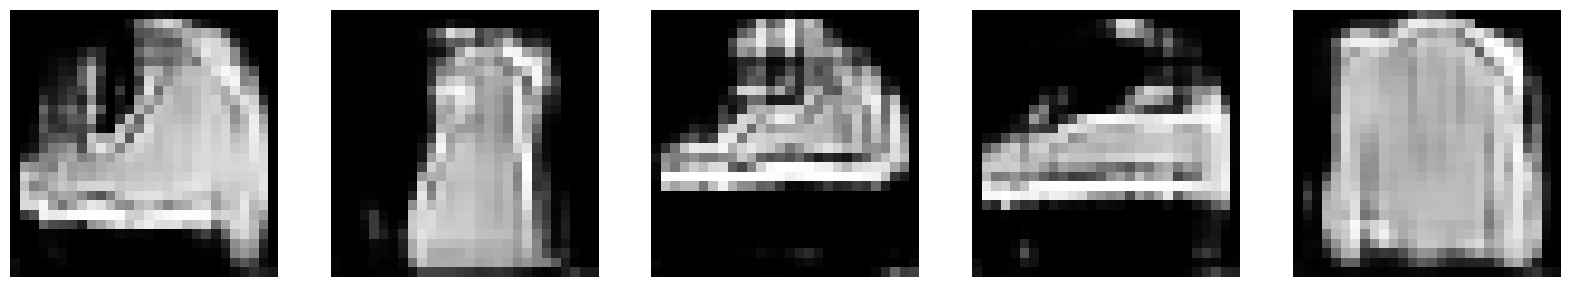

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3715 - g_loss: 0.7794
Epoch 9/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3710 - g_loss: 0.7849

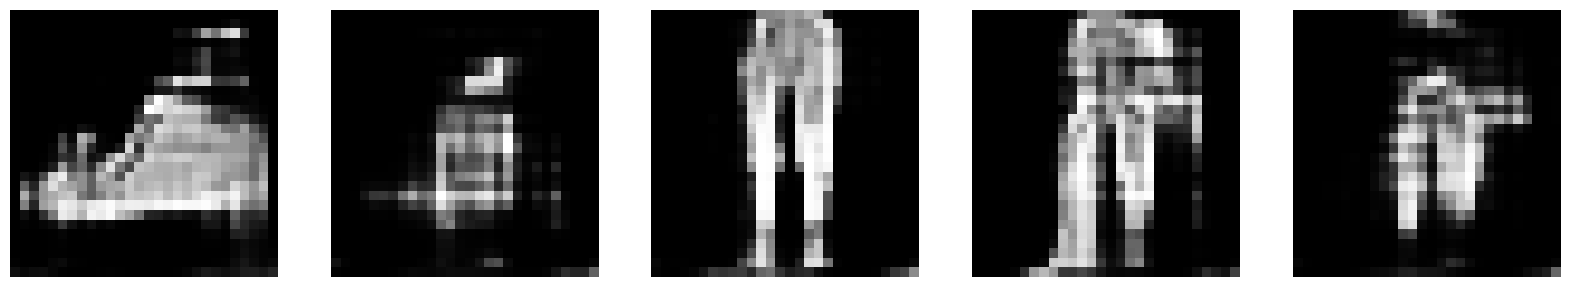

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3711 - g_loss: 0.7848
Epoch 10/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3691 - g_loss: 0.7870

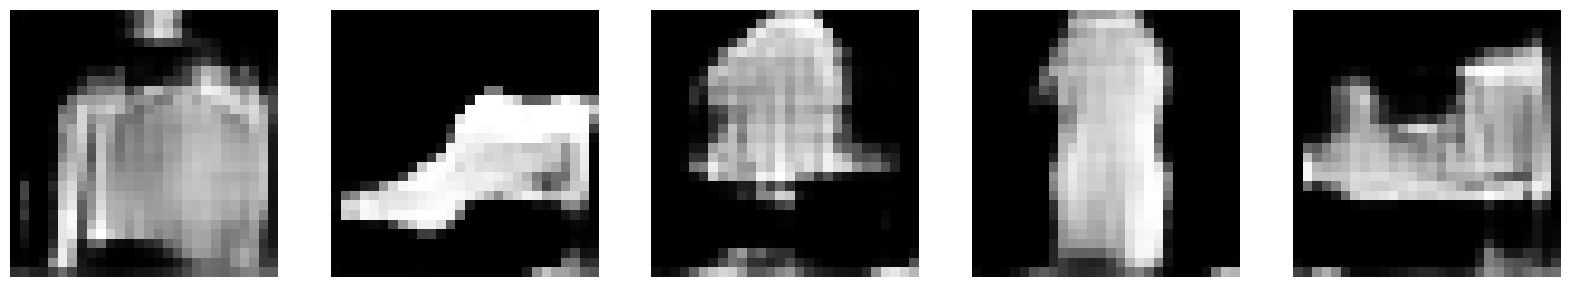

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3691 - g_loss: 0.7873
Epoch 11/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3677 - g_loss: 0.7924

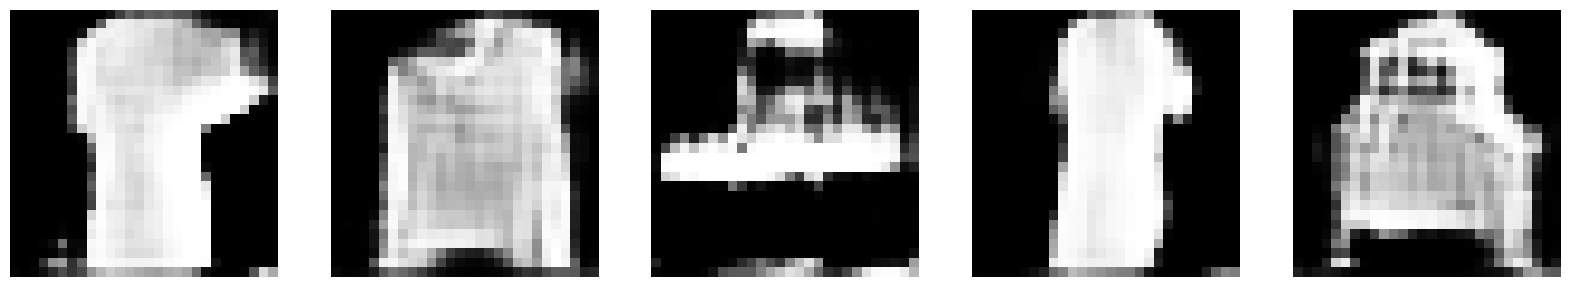

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3679 - g_loss: 0.7927
Epoch 12/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3694 - g_loss: 0.8008

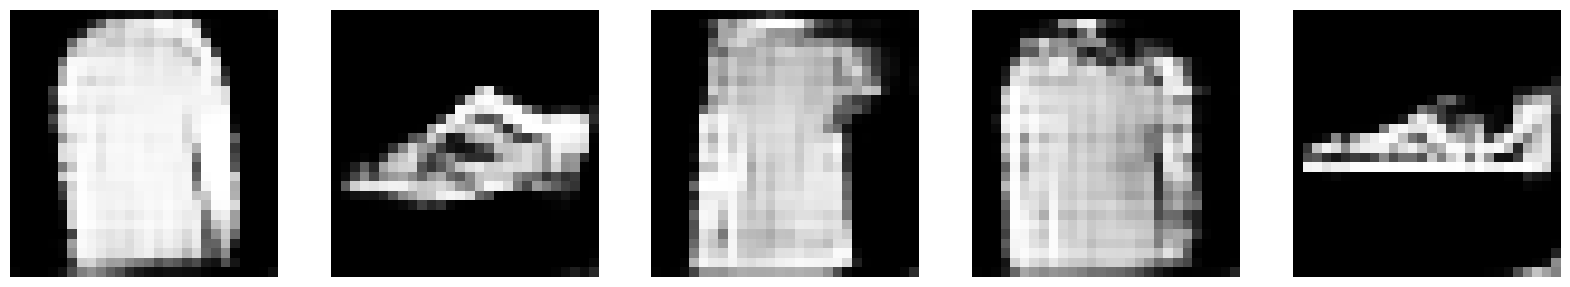

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3694 - g_loss: 0.8010
Epoch 13/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3714 - g_loss: 0.7957

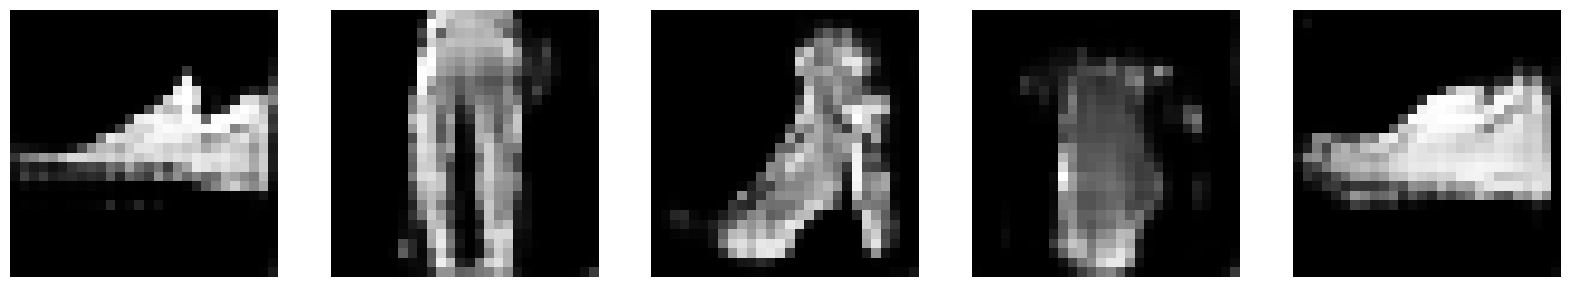

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3714 - g_loss: 0.7957
Epoch 14/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3717 - g_loss: 0.8002

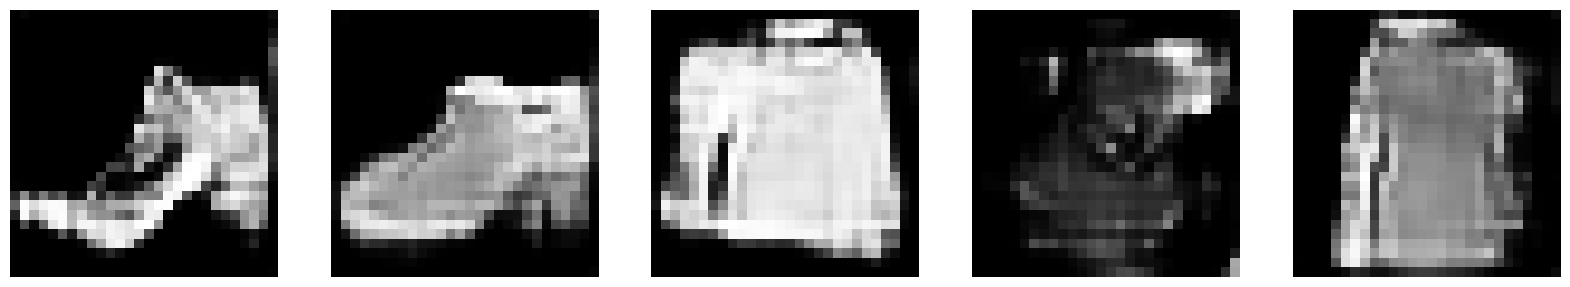

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3717 - g_loss: 0.8001
Epoch 15/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3720 - g_loss: 0.7976

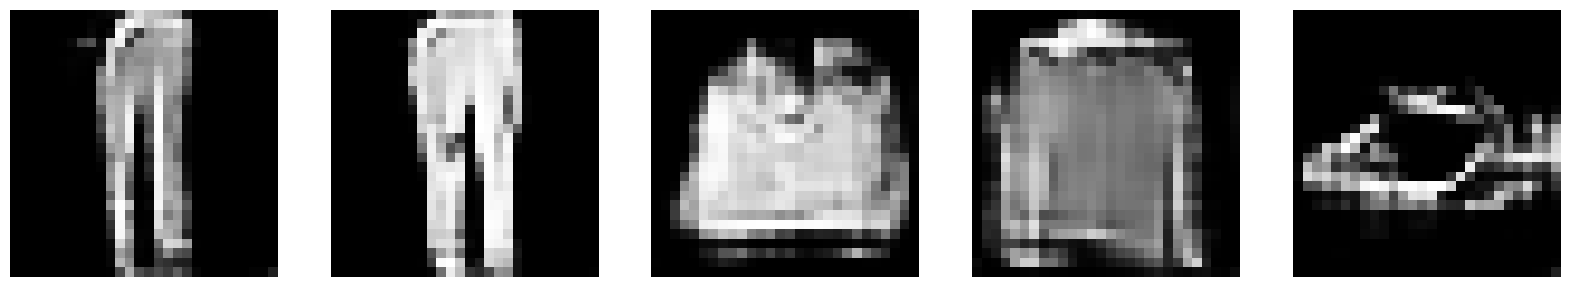

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3720 - g_loss: 0.7976
Epoch 16/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3716 - g_loss: 0.7973

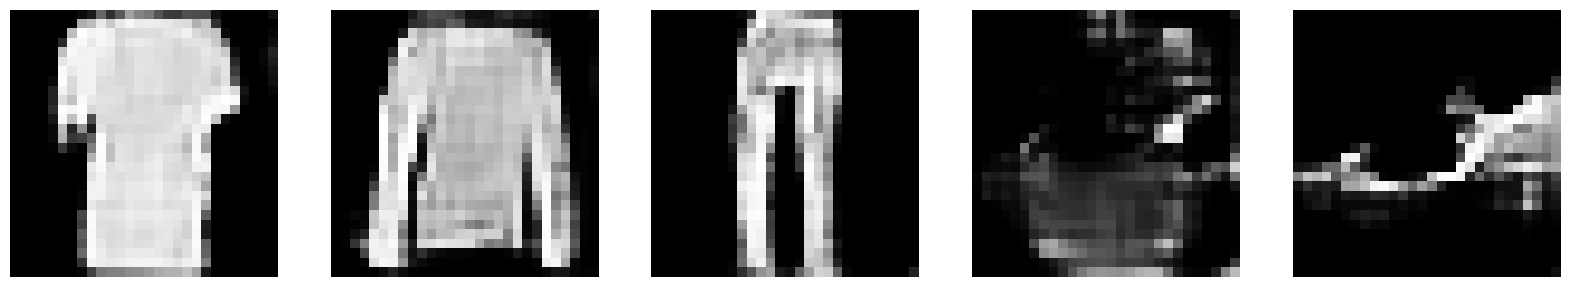

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3716 - g_loss: 0.7973
Epoch 17/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3715 - g_loss: 0.7968

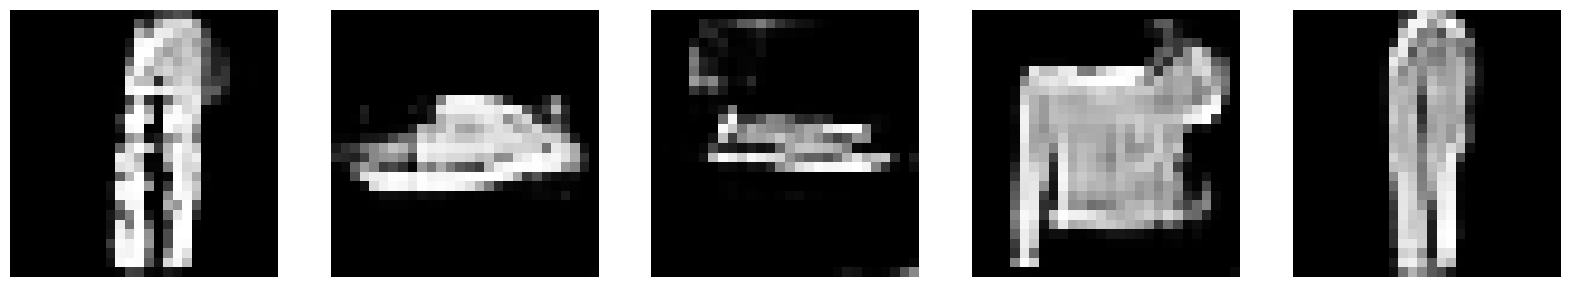

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3715 - g_loss: 0.7966
Epoch 18/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3728 - g_loss: 0.7920

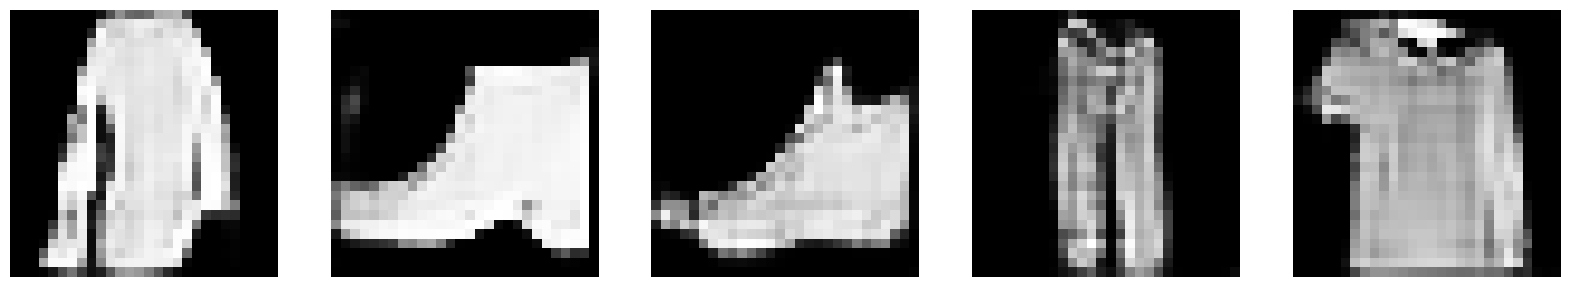

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3729 - g_loss: 0.7921
Epoch 19/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3727 - g_loss: 0.7902

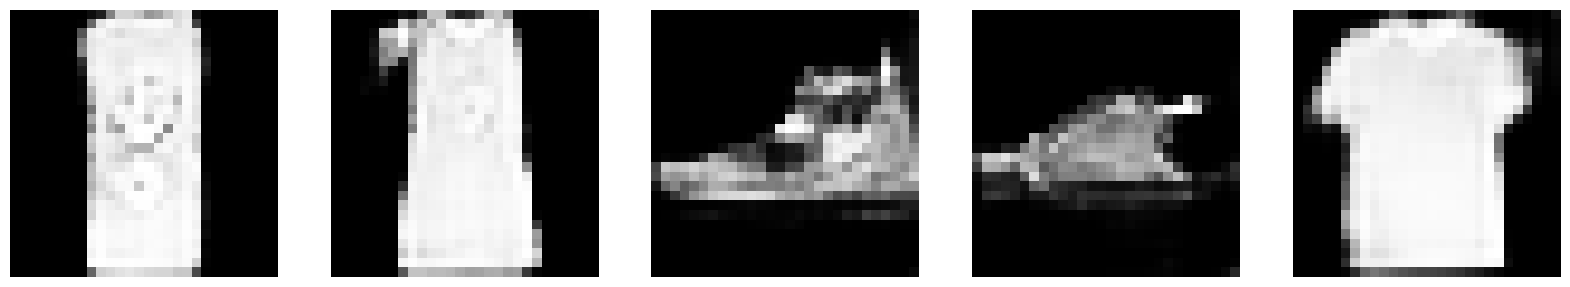

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3726 - g_loss: 0.7903
Epoch 20/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3733 - g_loss: 0.7871

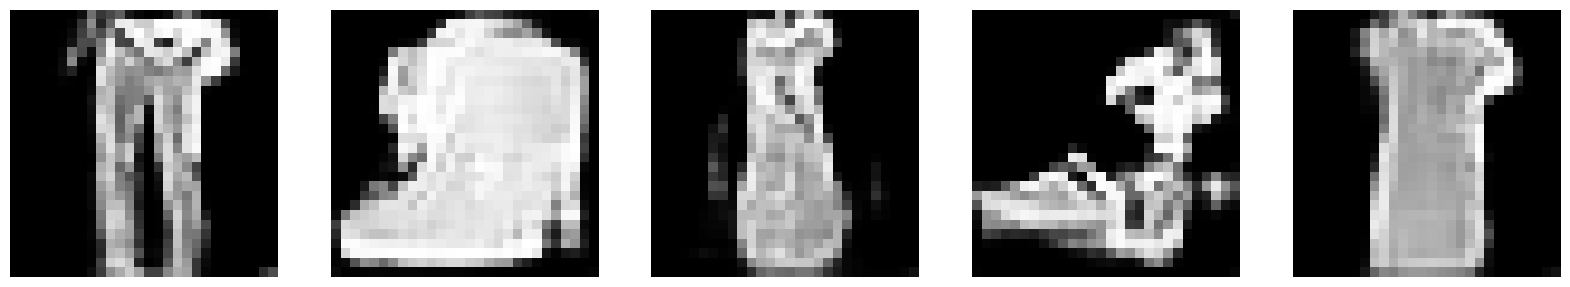

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3733 - g_loss: 0.7871
Epoch 21/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3733 - g_loss: 0.7857

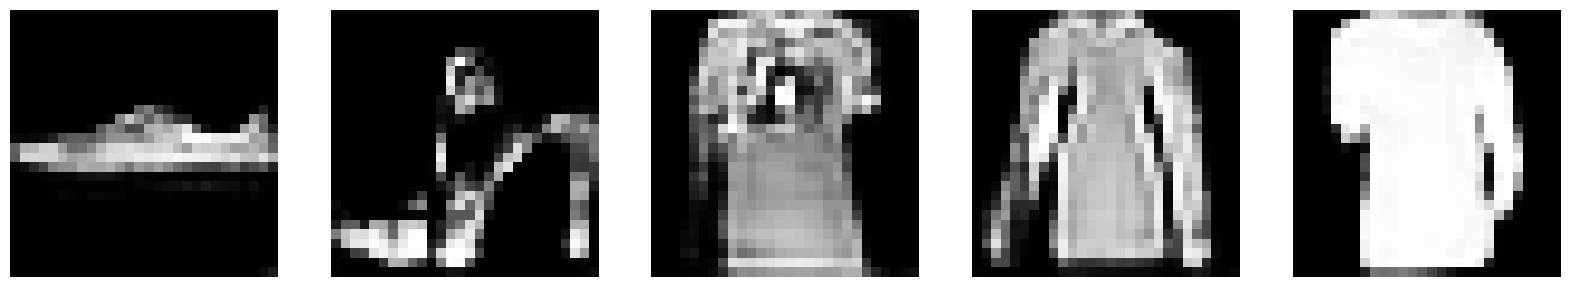

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3733 - g_loss: 0.7858
Epoch 22/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3739 - g_loss: 0.7854

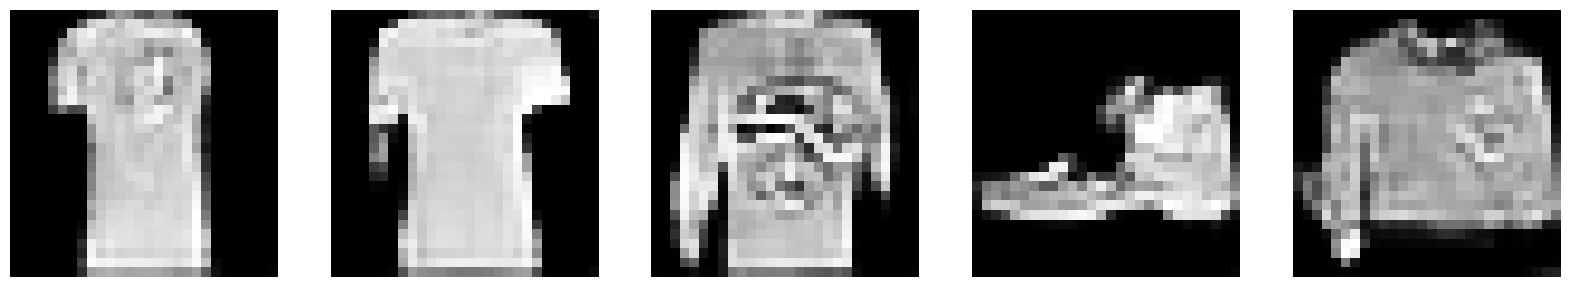

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3739 - g_loss: 0.7854
Epoch 23/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3742 - g_loss: 0.7851

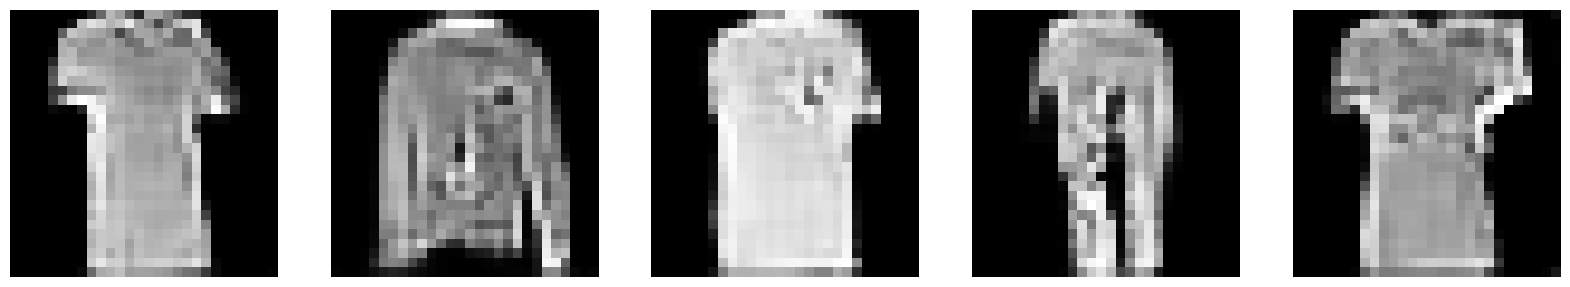

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3742 - g_loss: 0.7851
Epoch 24/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3743 - g_loss: 0.7849

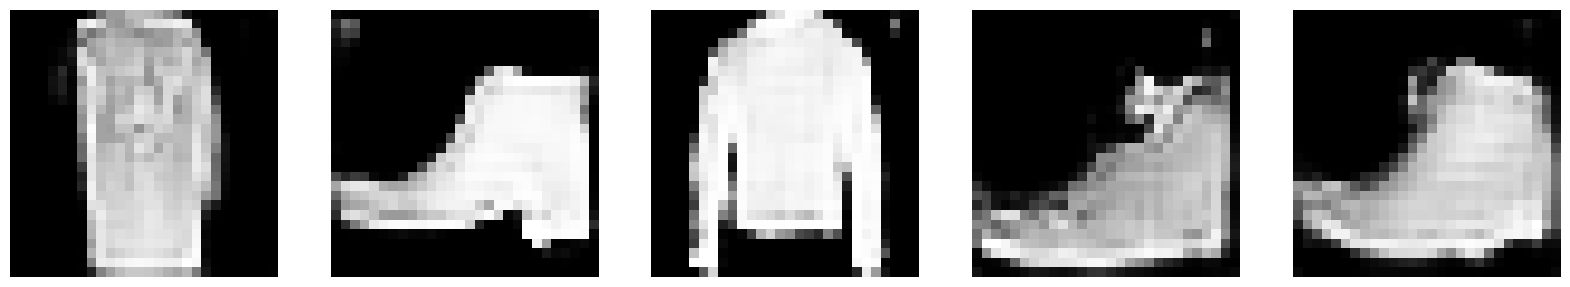

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3744 - g_loss: 0.7850
Epoch 25/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3745 - g_loss: 0.7856

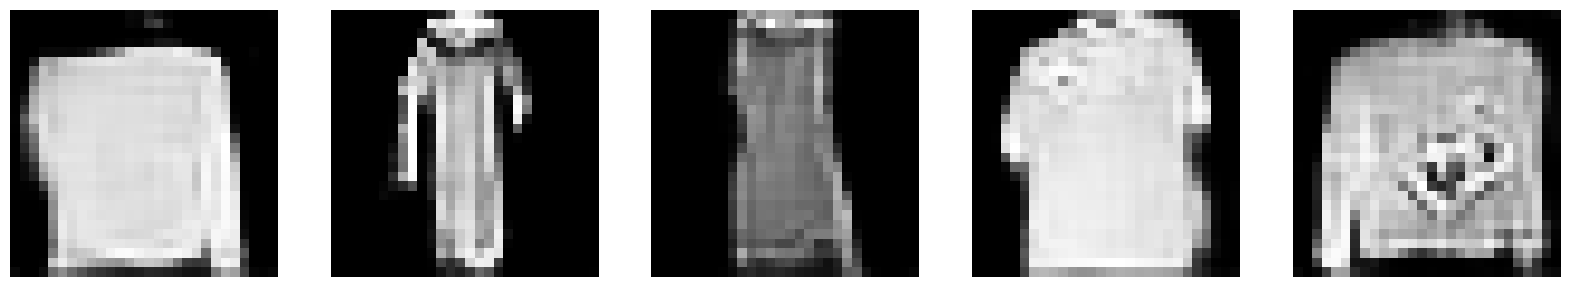

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3745 - g_loss: 0.7856
Epoch 26/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3743 - g_loss: 0.7877

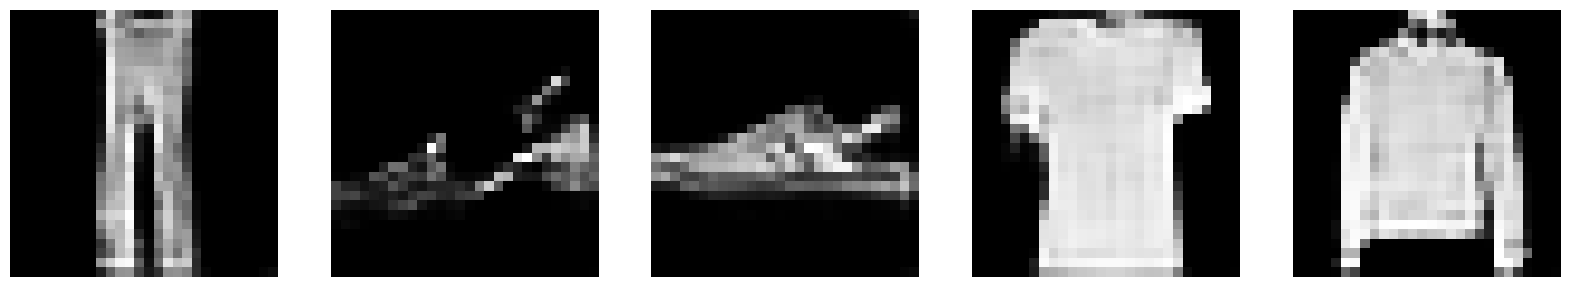

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3743 - g_loss: 0.7876
Epoch 27/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3746 - g_loss: 0.7864

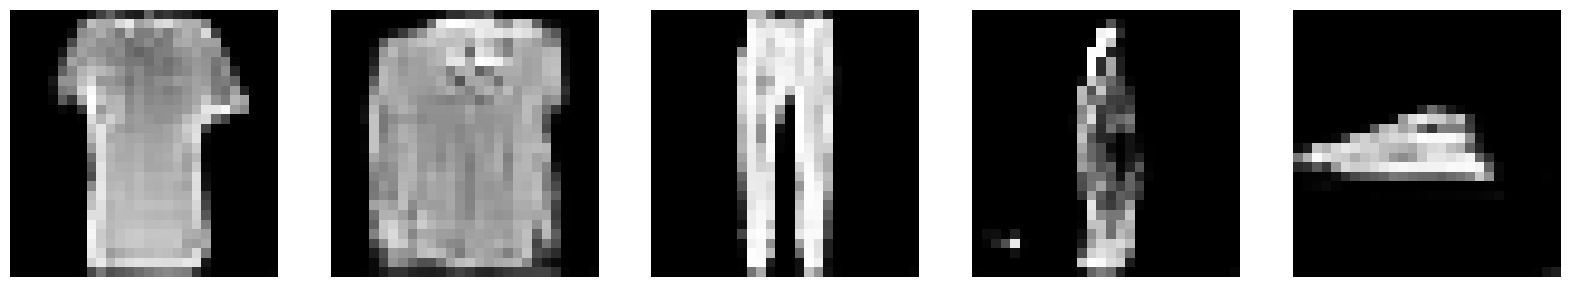

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3745 - g_loss: 0.7863
Epoch 28/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3741 - g_loss: 0.7889

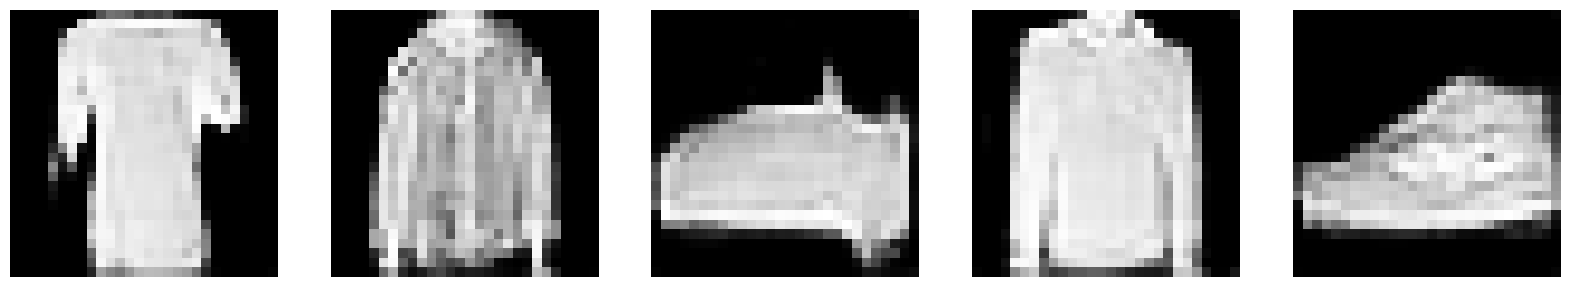

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3742 - g_loss: 0.7889
Epoch 29/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3746 - g_loss: 0.7881

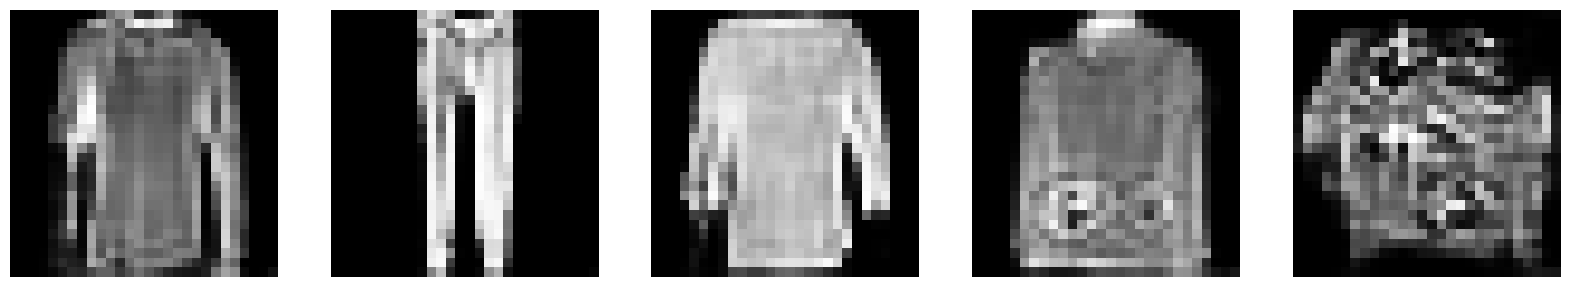

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3746 - g_loss: 0.7880
Epoch 30/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3750 - g_loss: 0.7898

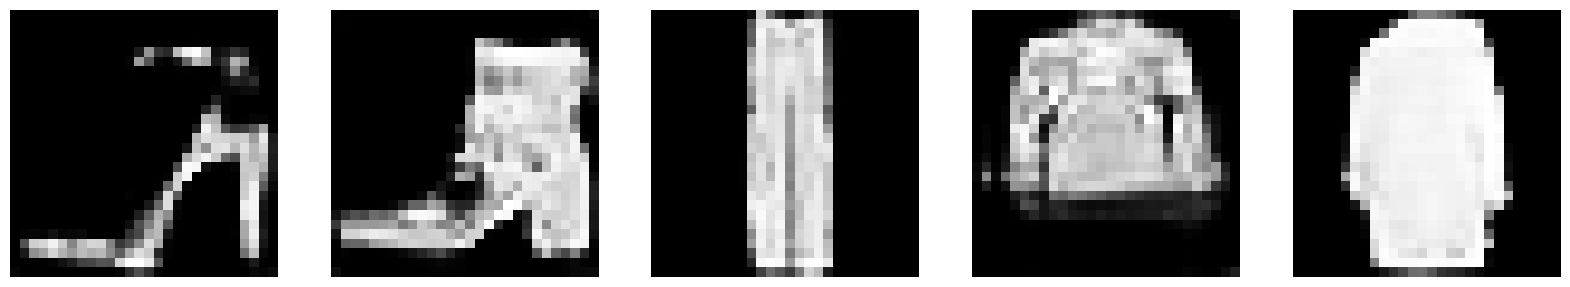

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3750 - g_loss: 0.7899
Epoch 31/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3745 - g_loss: 0.7902

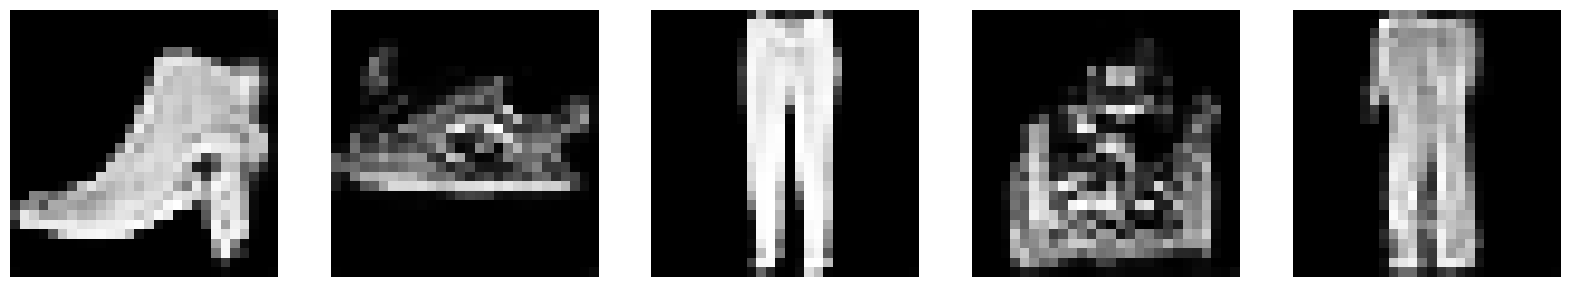

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3746 - g_loss: 0.7902
Epoch 32/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3748 - g_loss: 0.7912

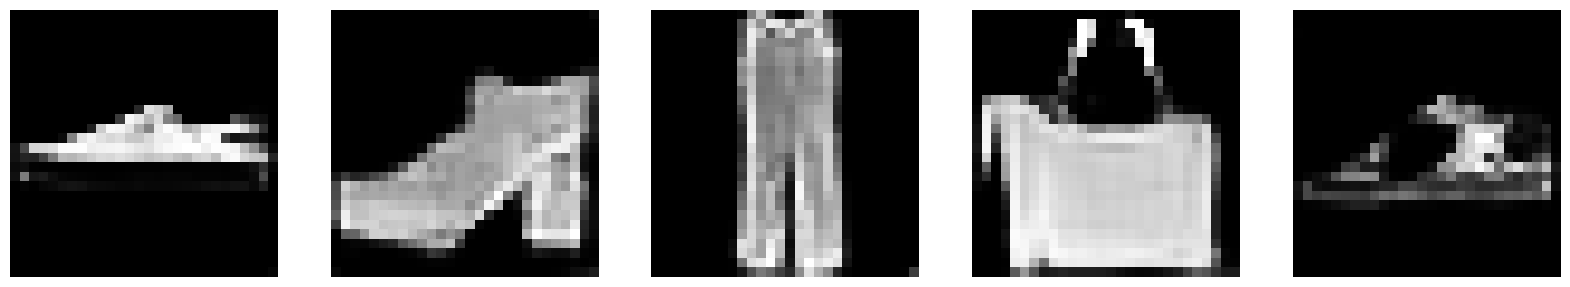

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3748 - g_loss: 0.7912
Epoch 33/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3749 - g_loss: 0.7928

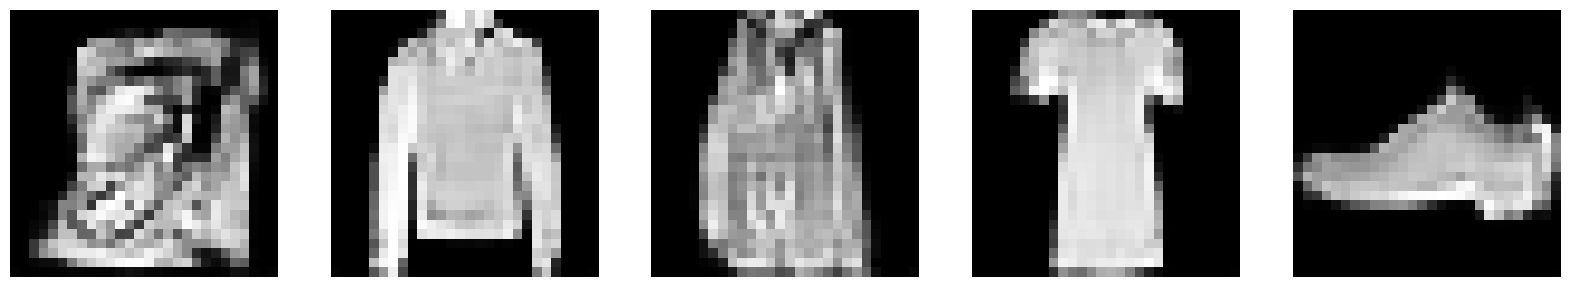

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3749 - g_loss: 0.7929
Epoch 34/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3748 - g_loss: 0.7906

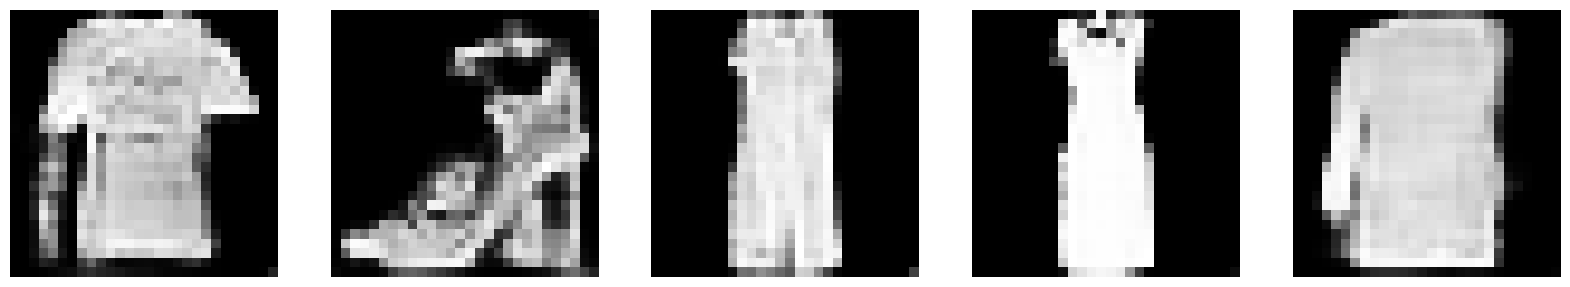

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3747 - g_loss: 0.7906
Epoch 35/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3749 - g_loss: 0.7927

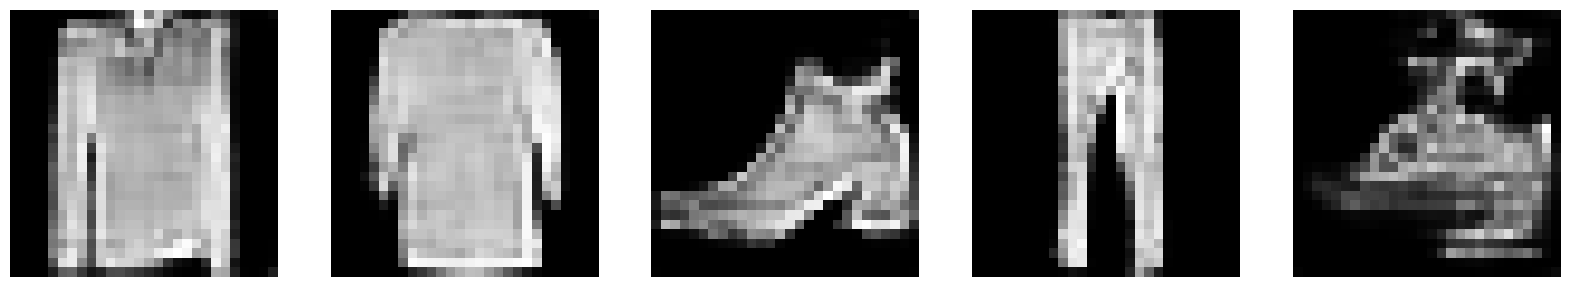

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3749 - g_loss: 0.7926
Epoch 36/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3755 - g_loss: 0.7924

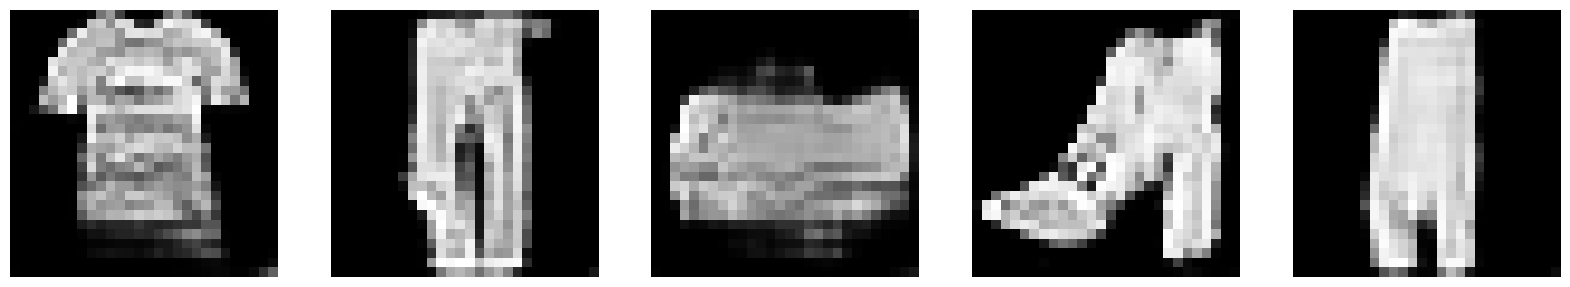

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3755 - g_loss: 0.7926
Epoch 37/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3752 - g_loss: 0.7944

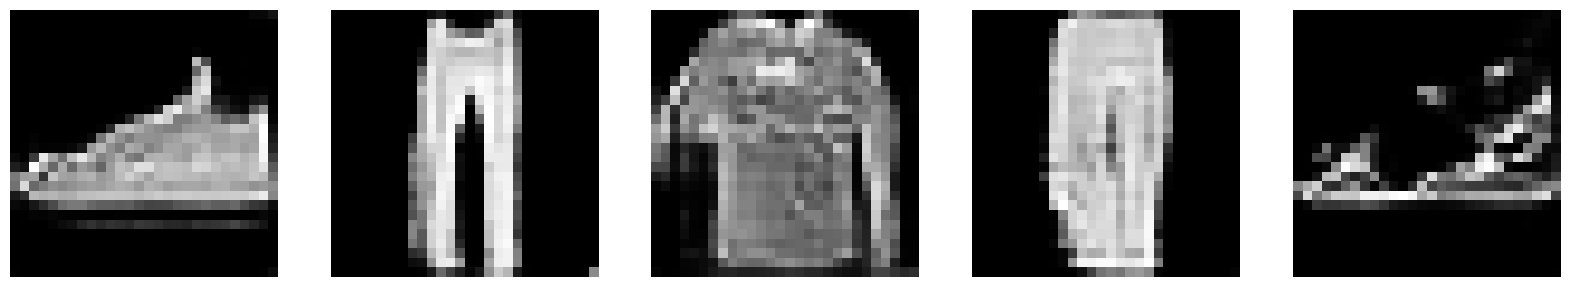

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3752 - g_loss: 0.7943
Epoch 38/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - d_loss: 1.3757 - g_loss: 0.7943

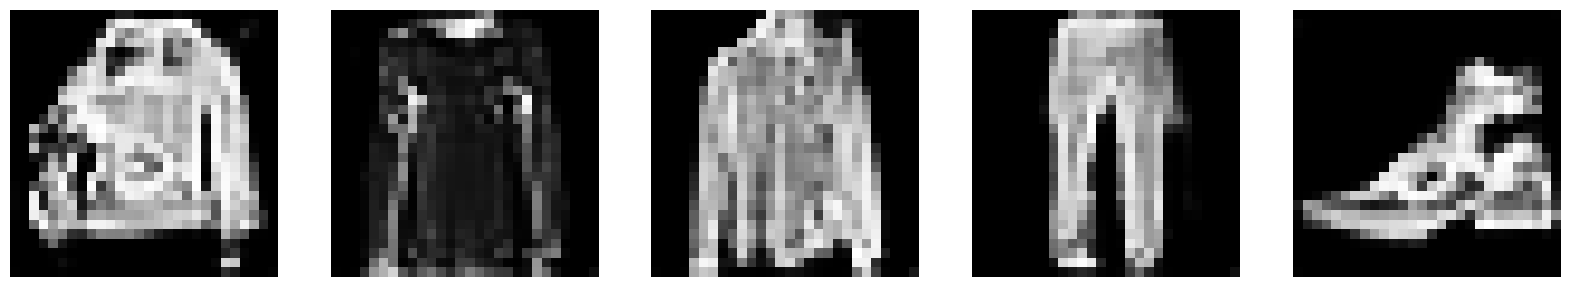

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3757 - g_loss: 0.7943
Epoch 39/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3753 - g_loss: 0.7944

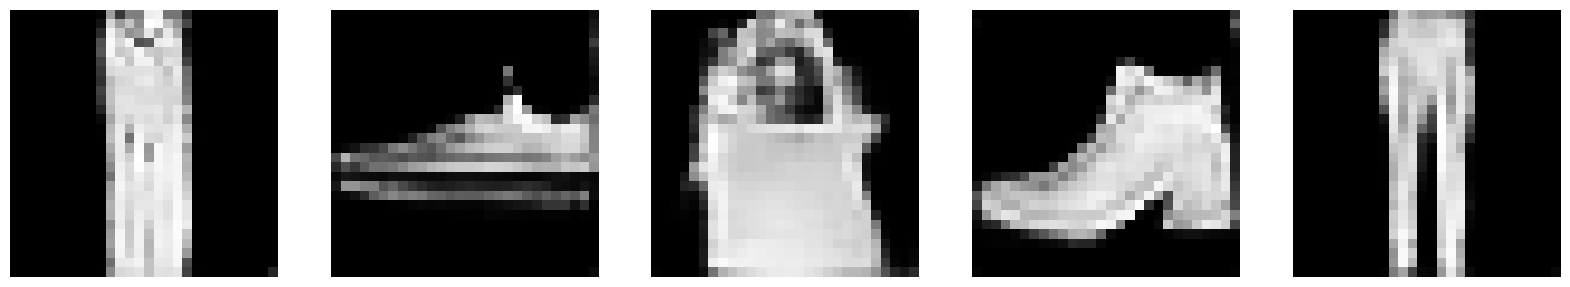

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3753 - g_loss: 0.7944
Epoch 40/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3754 - g_loss: 0.7966

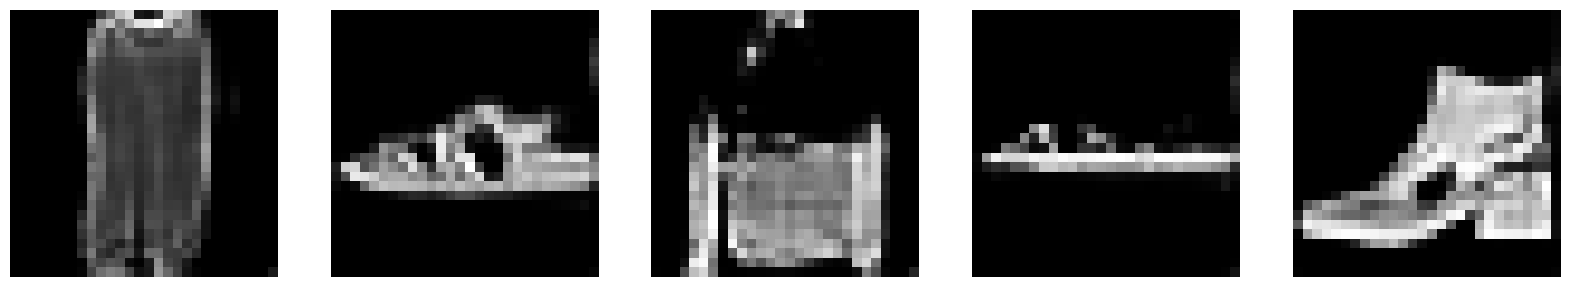

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 403ms/step - d_loss: 1.3754 - g_loss: 0.7965
Epoch 41/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3756 - g_loss: 0.7973

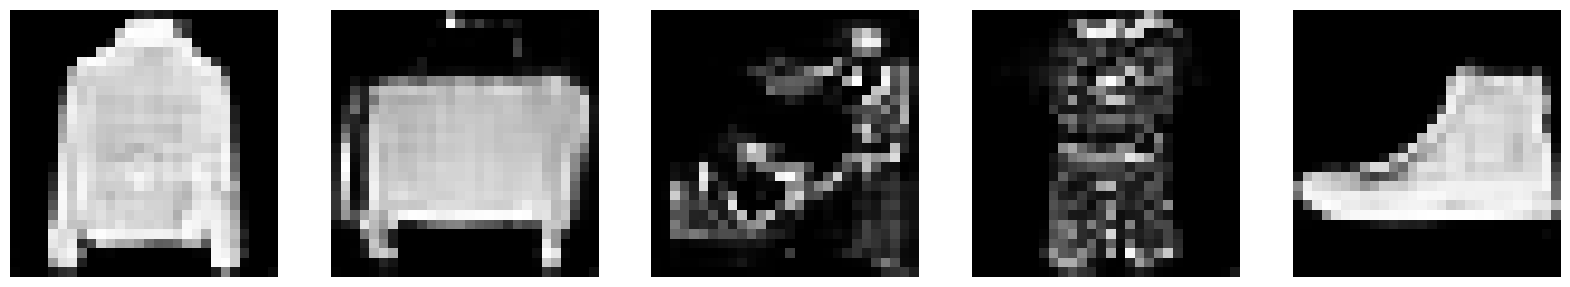

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3756 - g_loss: 0.7973
Epoch 42/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3753 - g_loss: 0.7953

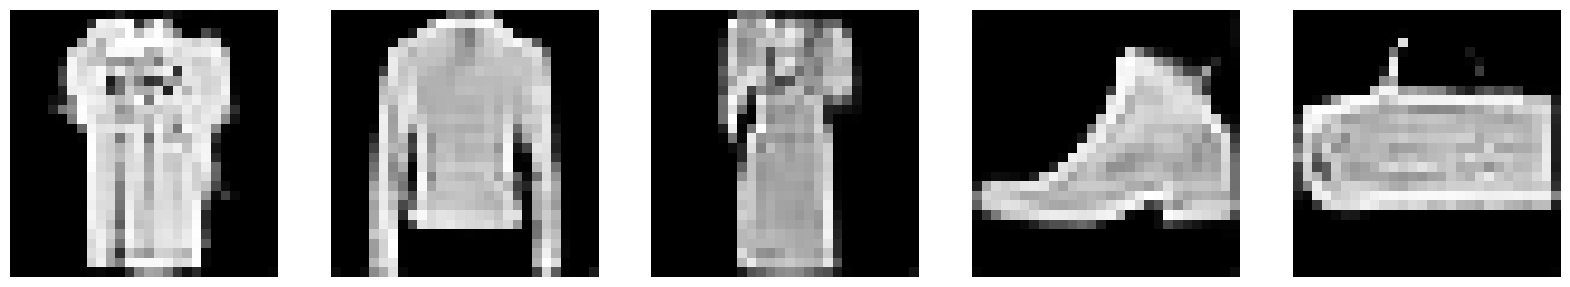

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3753 - g_loss: 0.7952
Epoch 43/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3752 - g_loss: 0.7964

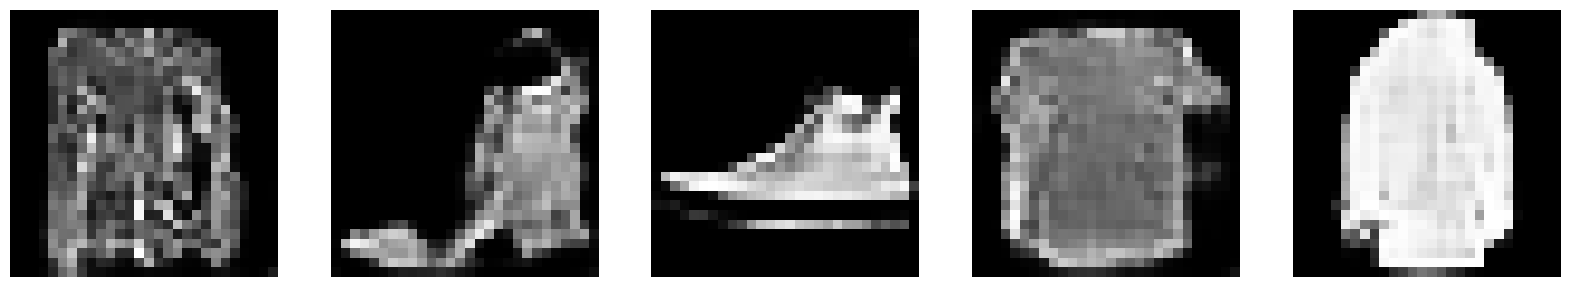

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3753 - g_loss: 0.7964
Epoch 44/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3760 - g_loss: 0.7972

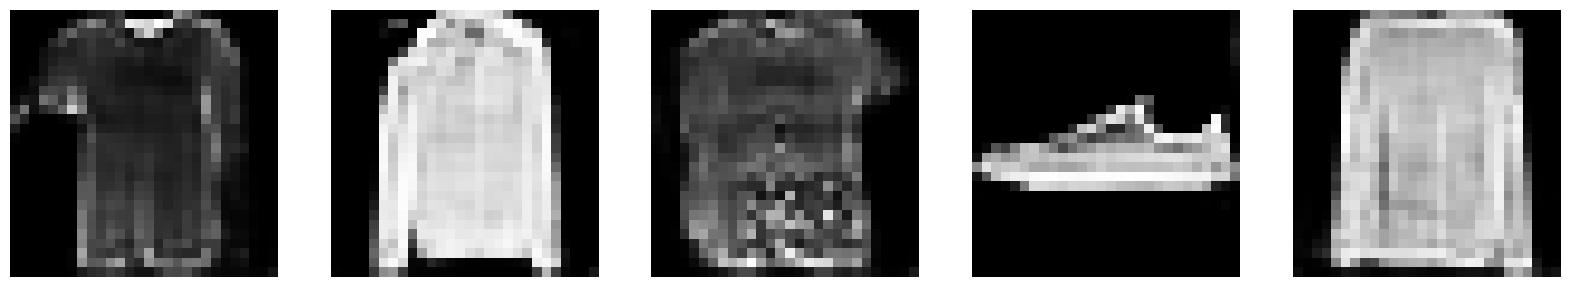

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3760 - g_loss: 0.7971
Epoch 45/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3758 - g_loss: 0.7957

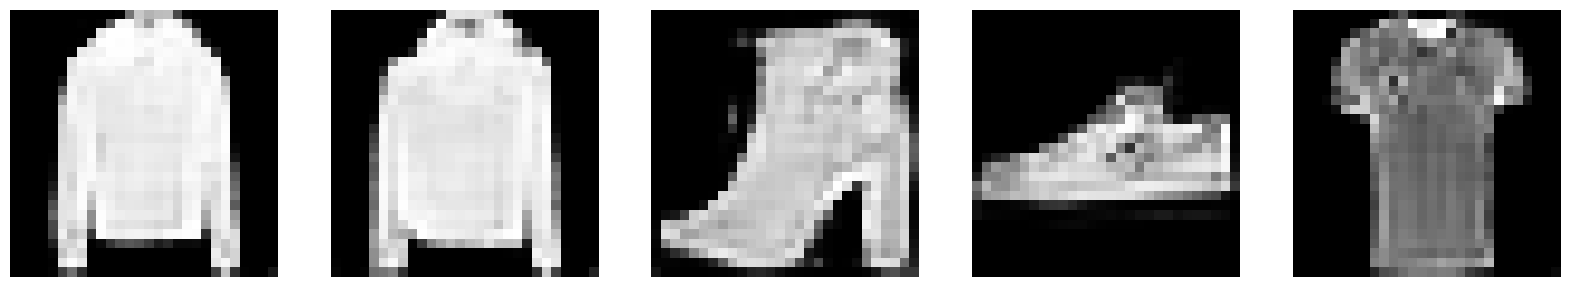

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3758 - g_loss: 0.7957
Epoch 46/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3755 - g_loss: 0.7969

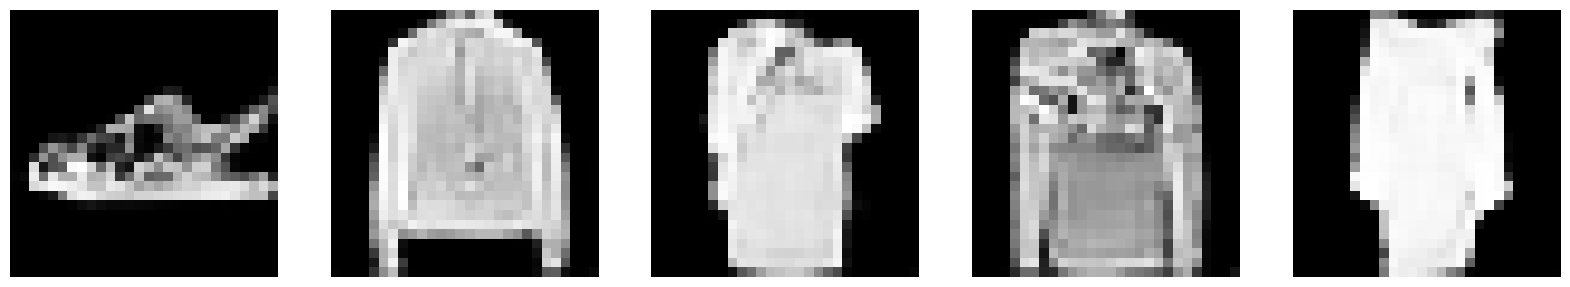

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3756 - g_loss: 0.7968
Epoch 47/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3759 - g_loss: 0.7969

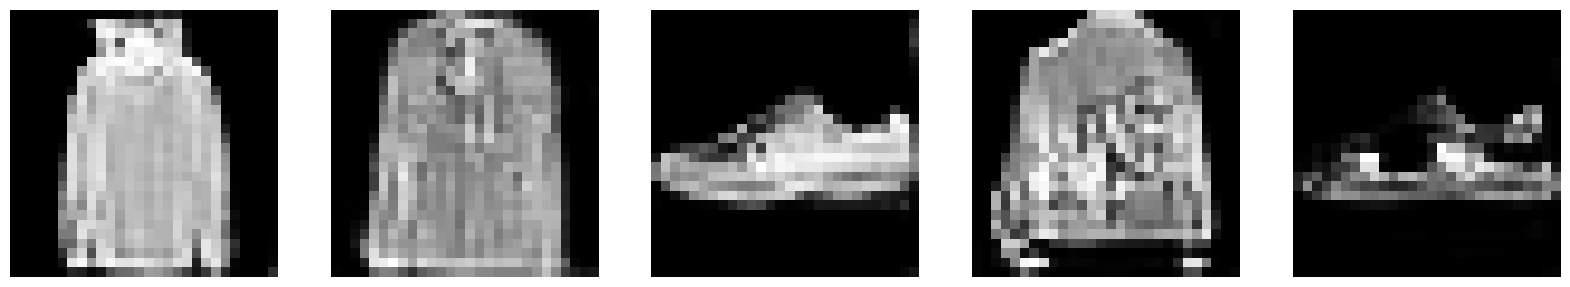

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3758 - g_loss: 0.7969
Epoch 48/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3756 - g_loss: 0.7955

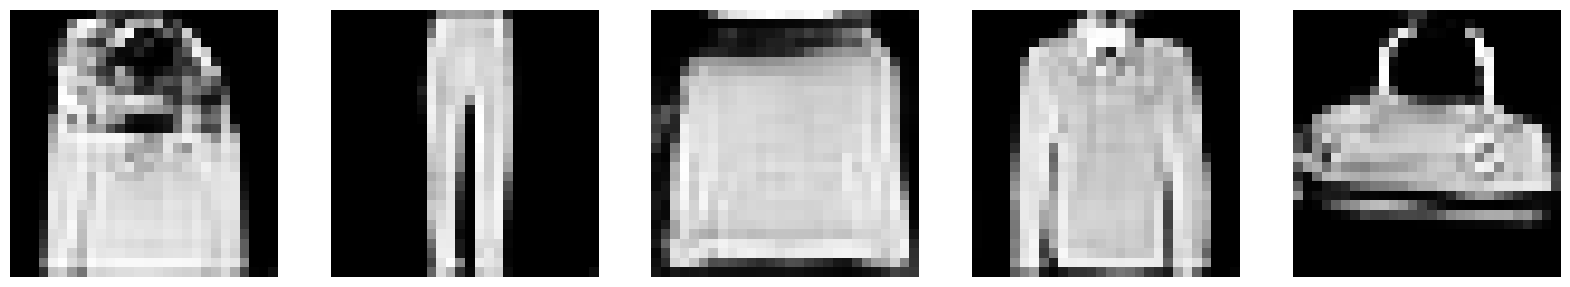

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3756 - g_loss: 0.7956
Epoch 49/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3760 - g_loss: 0.7965

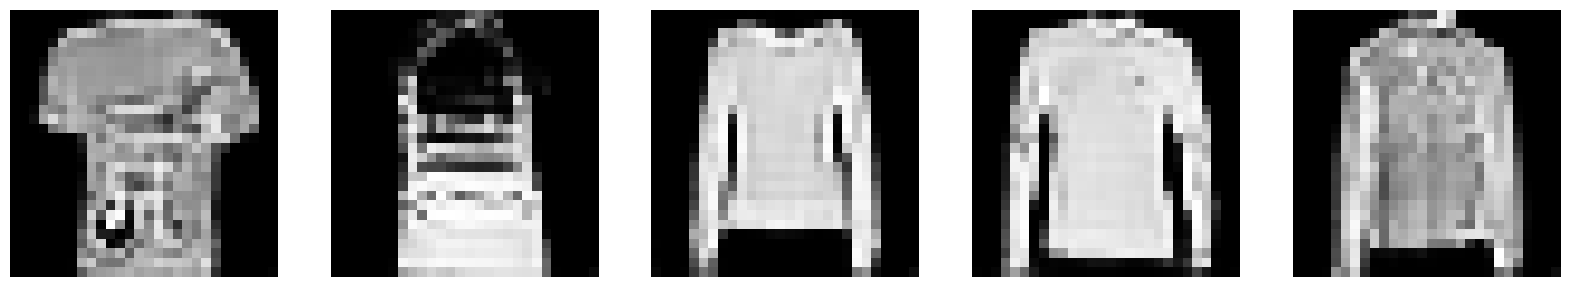

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3760 - g_loss: 0.7965
Epoch 50/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - d_loss: 1.3758 - g_loss: 0.7961

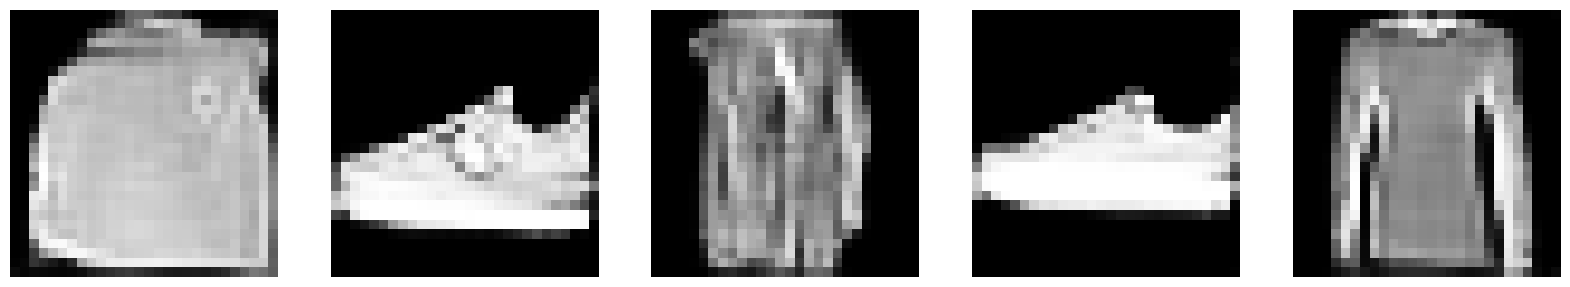

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 399ms/step - d_loss: 1.3758 - g_loss: 0.7961
Epoch 51/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3758 - g_loss: 0.7960

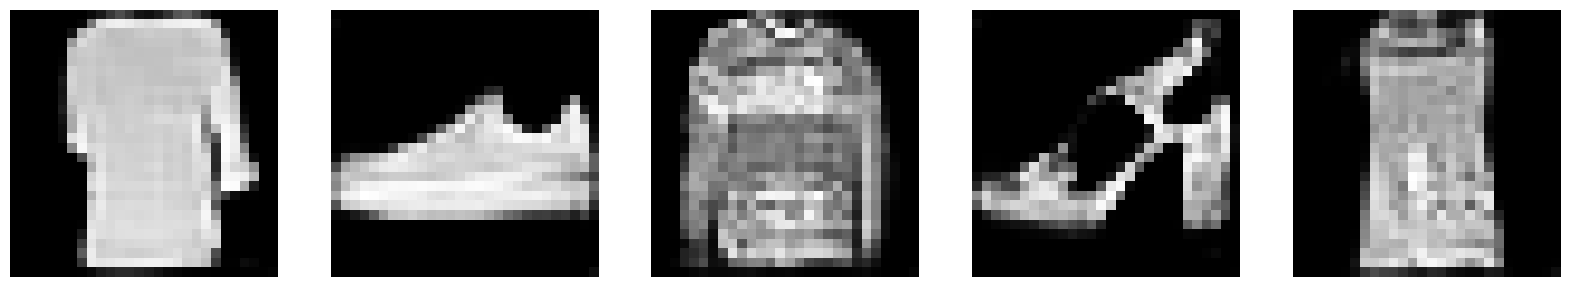

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3758 - g_loss: 0.7960
Epoch 52/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3759 - g_loss: 0.7962

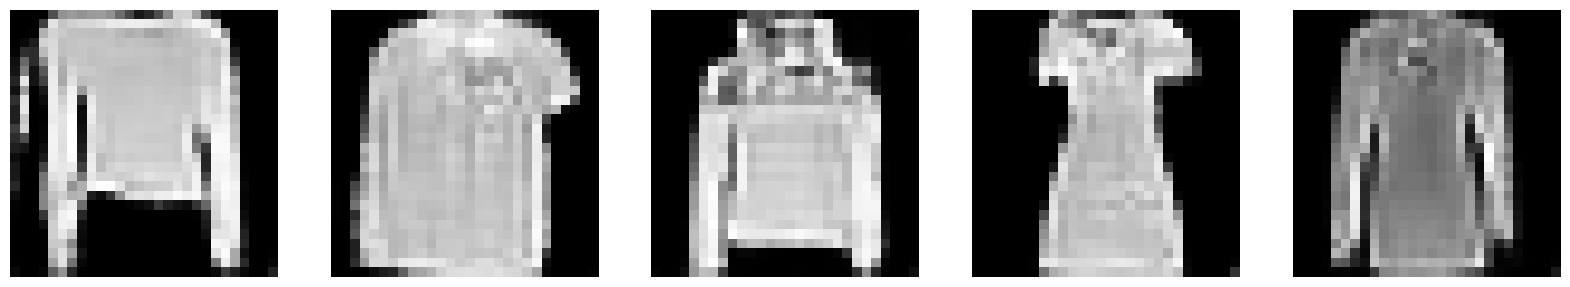

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3759 - g_loss: 0.7962
Epoch 53/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3760 - g_loss: 0.7973

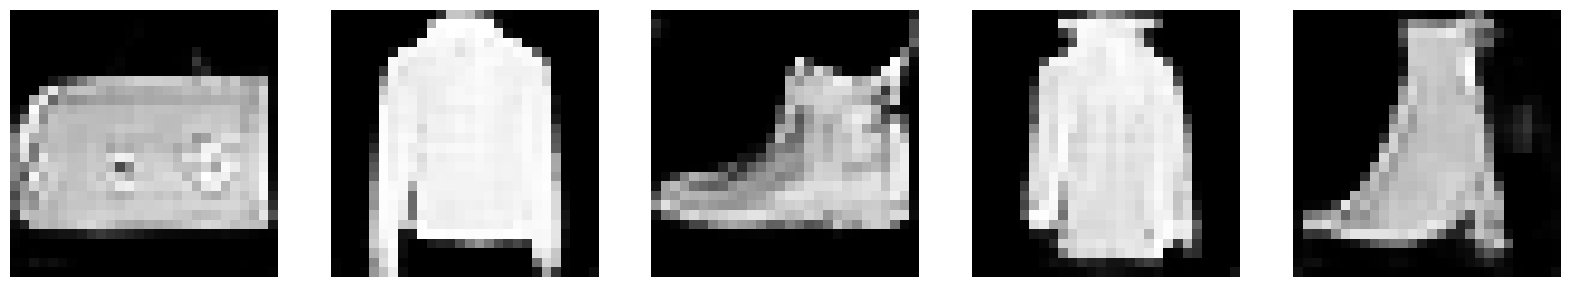

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3760 - g_loss: 0.7973
Epoch 54/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3761 - g_loss: 0.7970

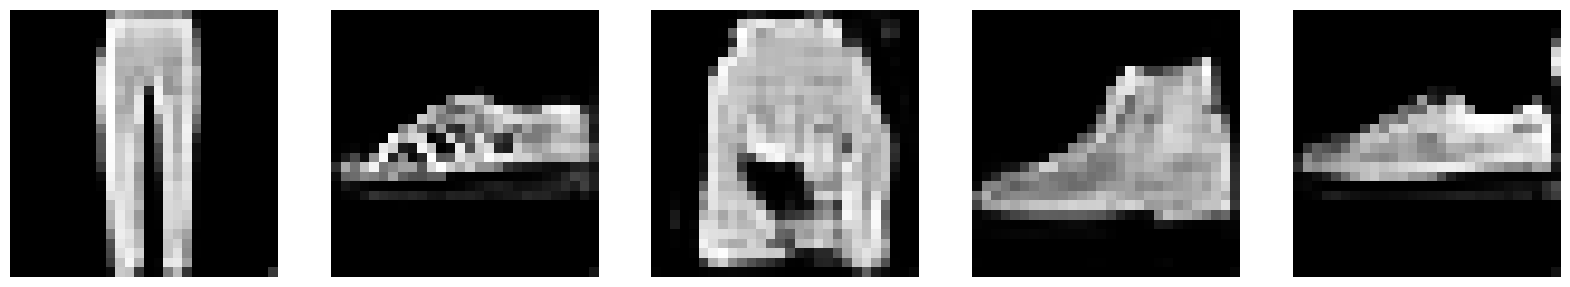

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.7969
Epoch 55/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3759 - g_loss: 0.7975

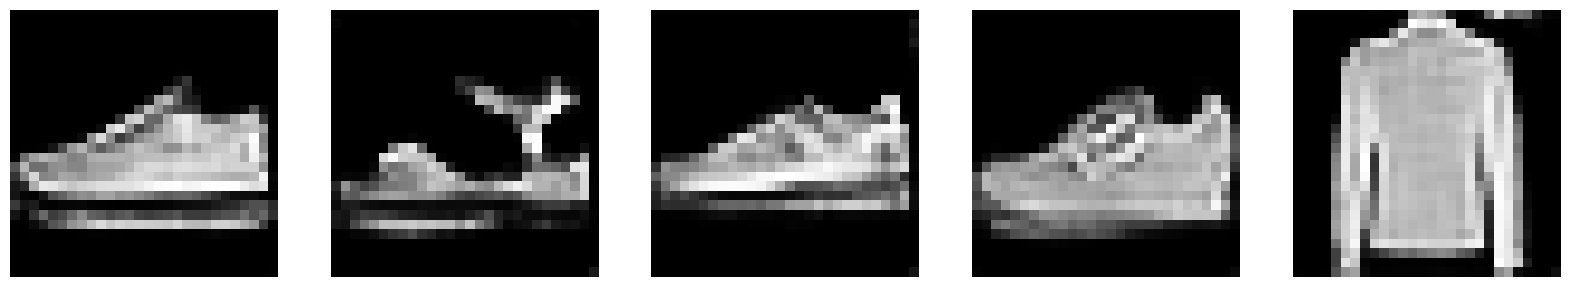

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3759 - g_loss: 0.7975
Epoch 56/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3760 - g_loss: 0.7961

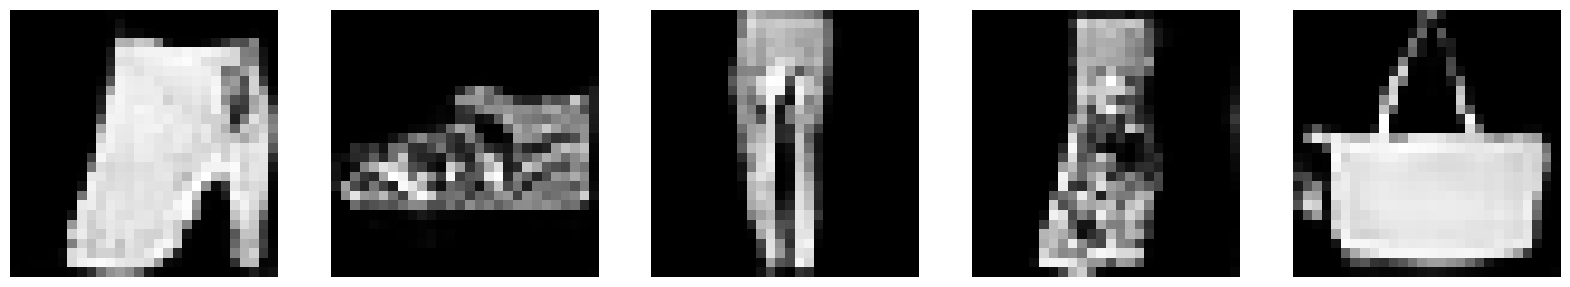

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3760 - g_loss: 0.7961
Epoch 57/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.7965

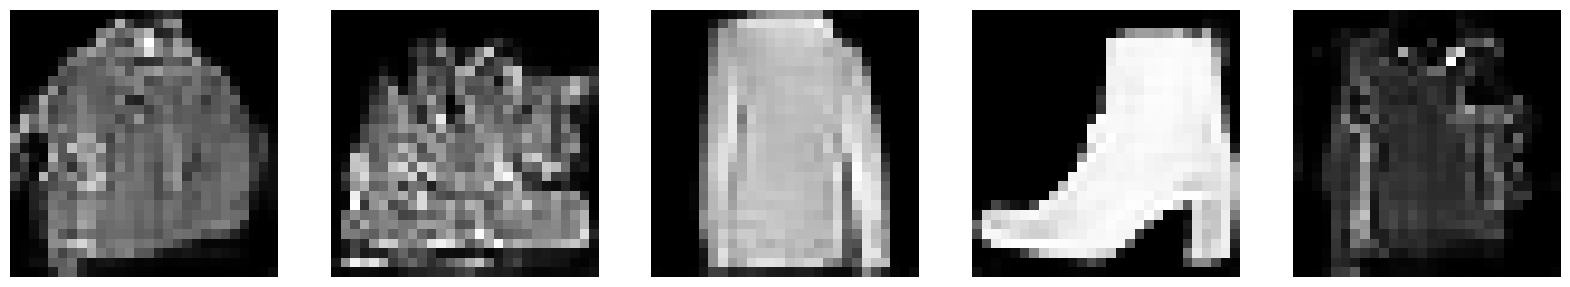

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.7965
Epoch 58/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3760 - g_loss: 0.7982

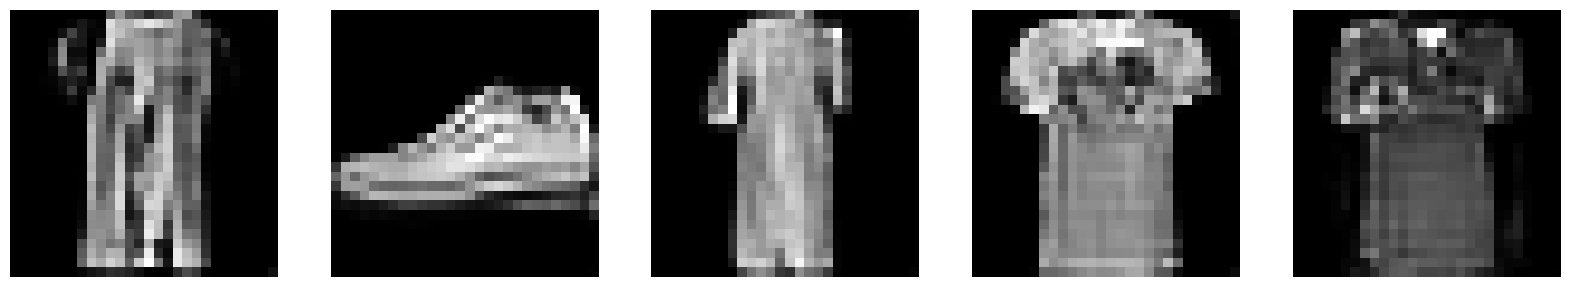

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3760 - g_loss: 0.7982
Epoch 59/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3758 - g_loss: 0.7970

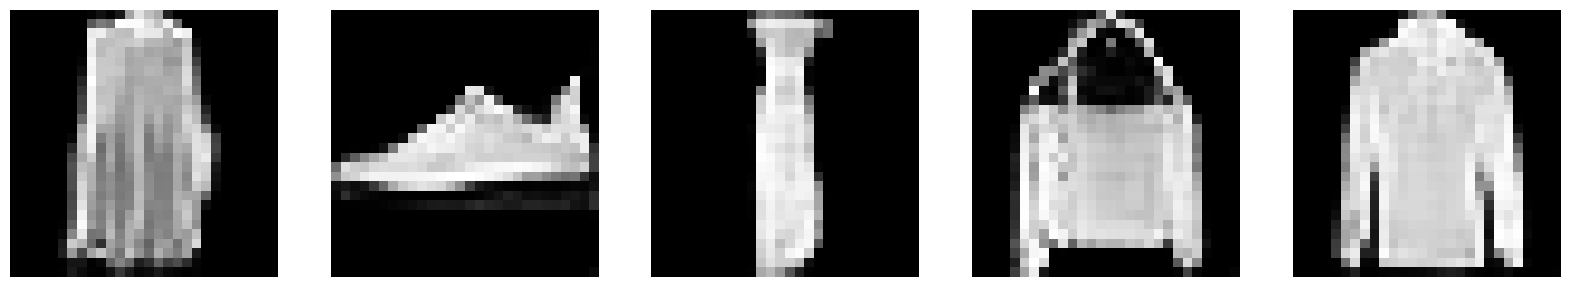

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3758 - g_loss: 0.7970
Epoch 60/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3760 - g_loss: 0.7974

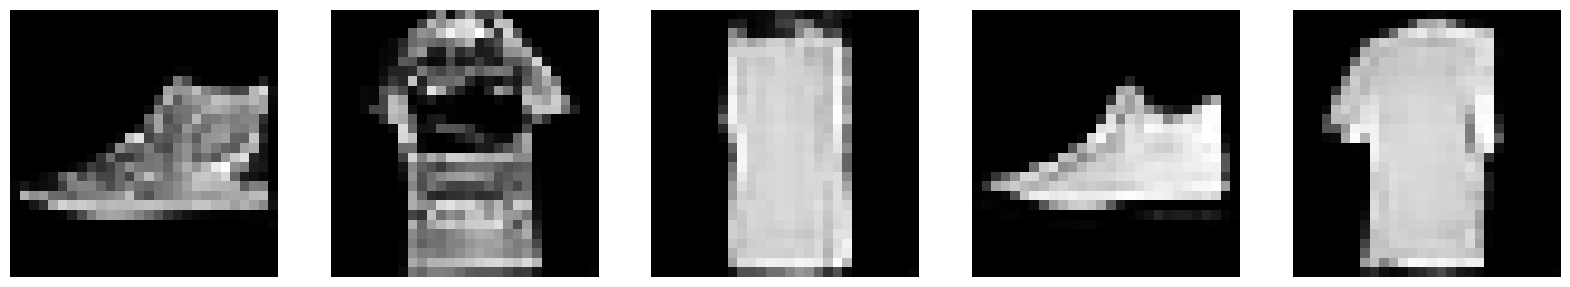

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3760 - g_loss: 0.7974
Epoch 61/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3760 - g_loss: 0.7976

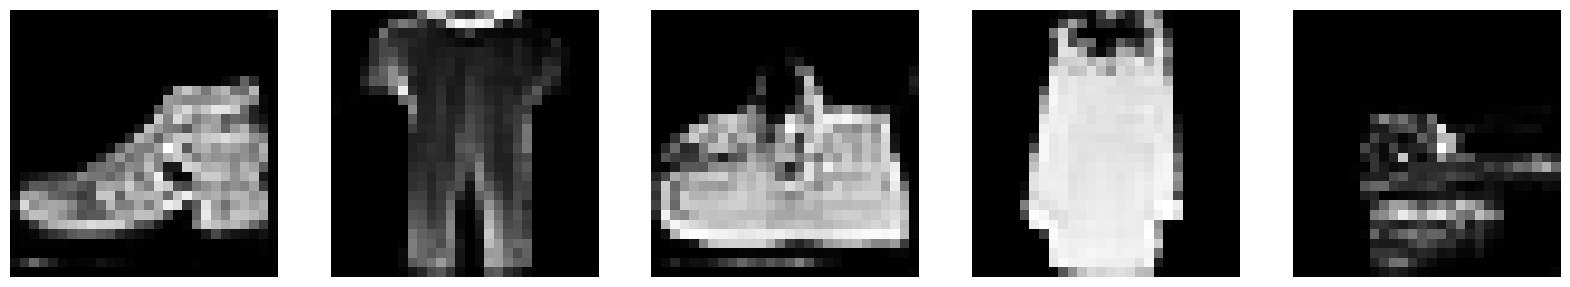

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3759 - g_loss: 0.7976
Epoch 62/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3760 - g_loss: 0.7977

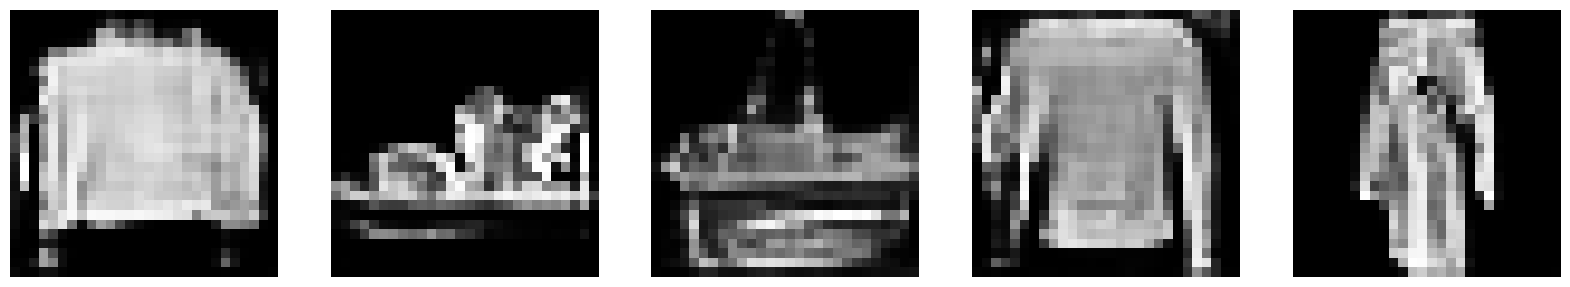

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3760 - g_loss: 0.7978
Epoch 63/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3760 - g_loss: 0.7983

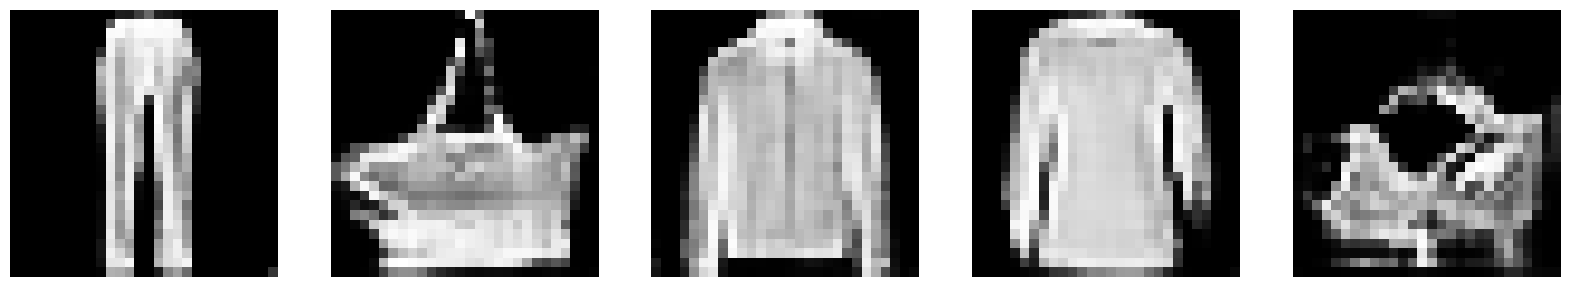

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3760 - g_loss: 0.7984
Epoch 64/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.7964

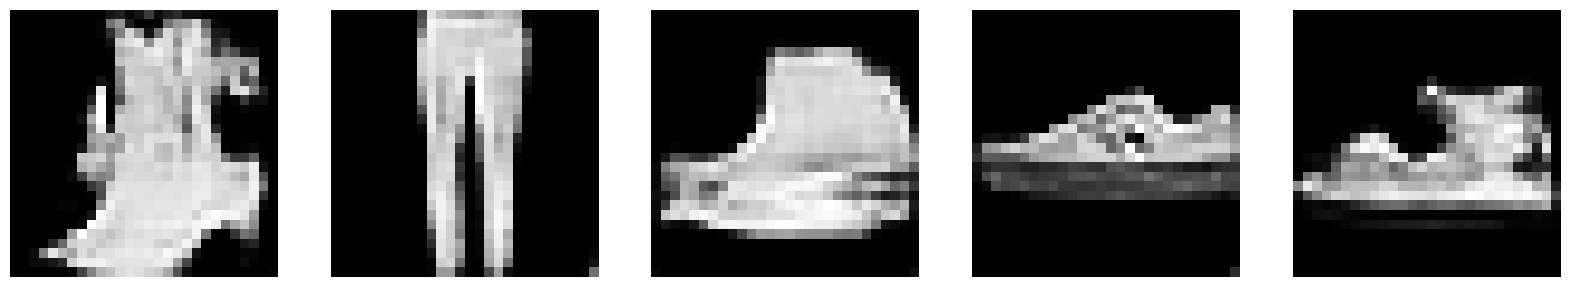

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.7964
Epoch 65/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.7986

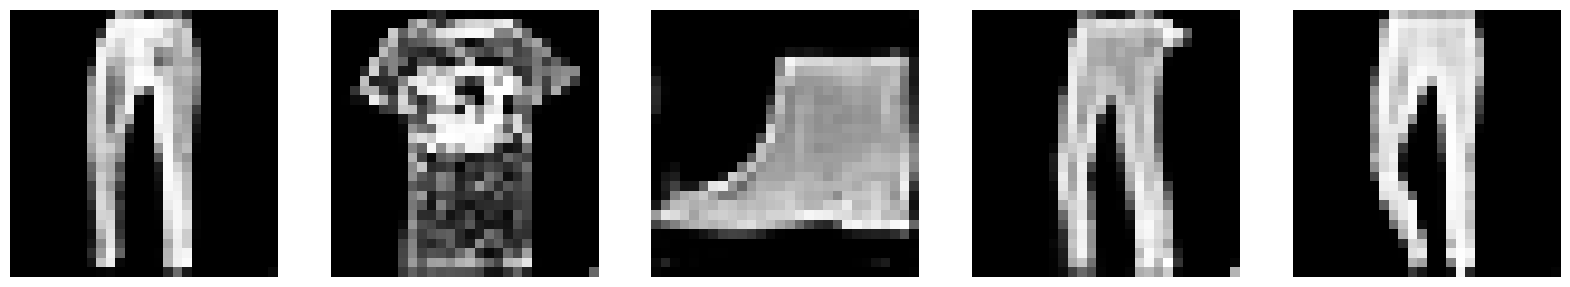

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.7986
Epoch 66/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3758 - g_loss: 0.7961

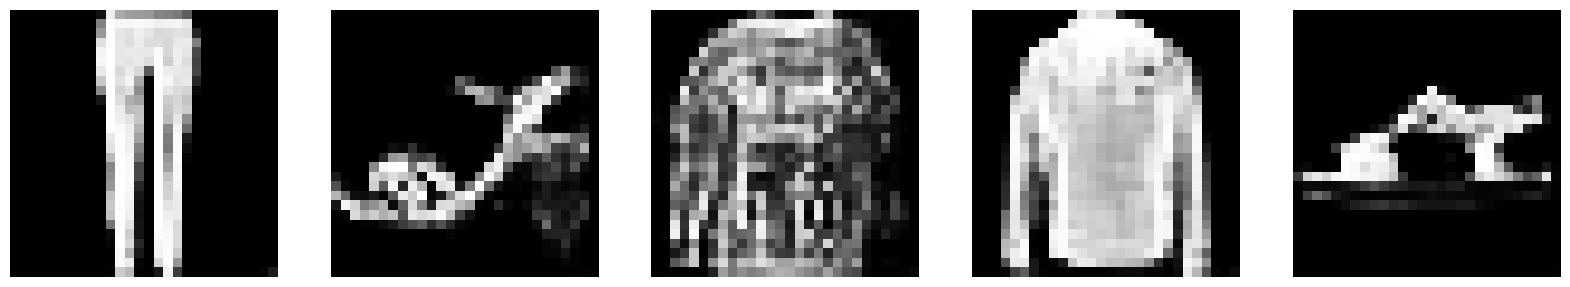

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3758 - g_loss: 0.7961
Epoch 67/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3760 - g_loss: 0.7979

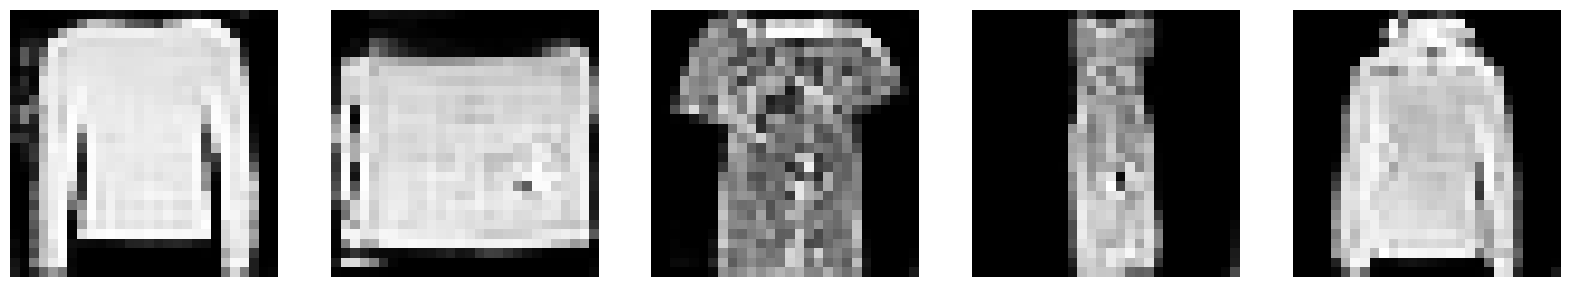

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3760 - g_loss: 0.7979
Epoch 68/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3762 - g_loss: 0.7970

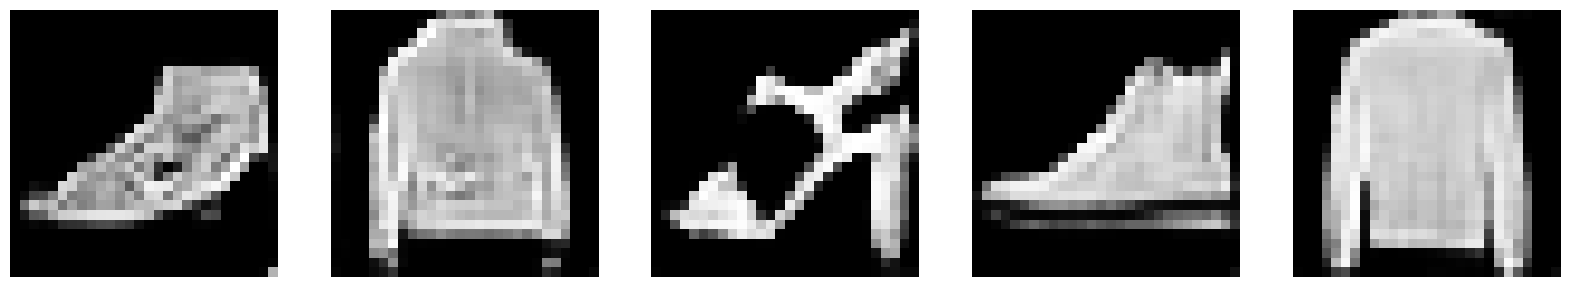

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3762 - g_loss: 0.7970
Epoch 69/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.7988

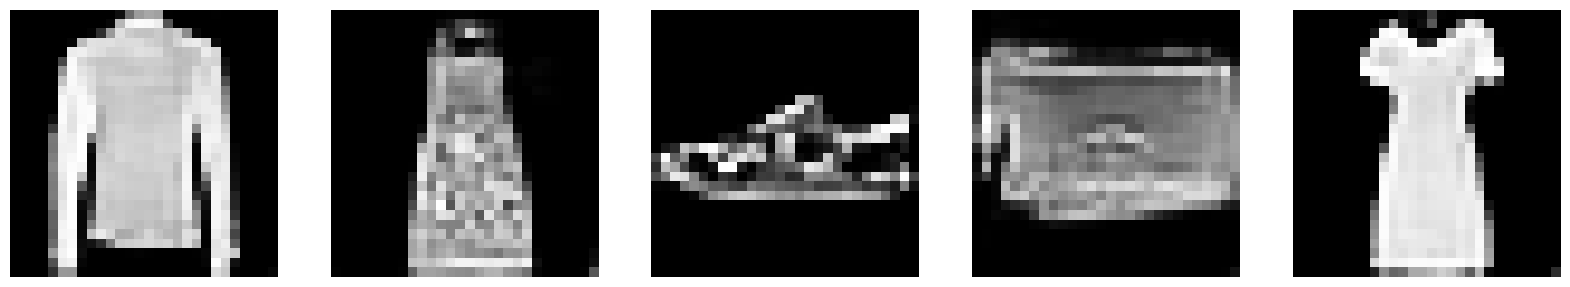

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.7988
Epoch 70/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3762 - g_loss: 0.7981

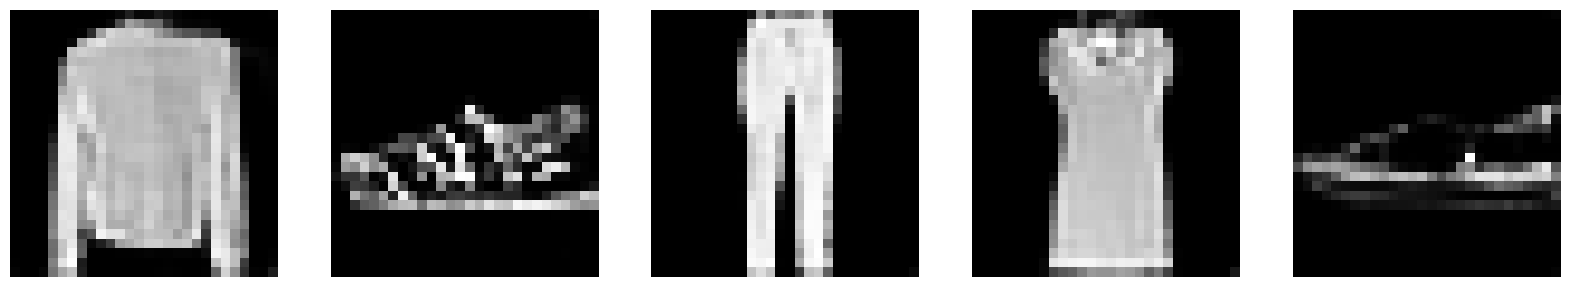

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3762 - g_loss: 0.7981
Epoch 71/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3760 - g_loss: 0.7986

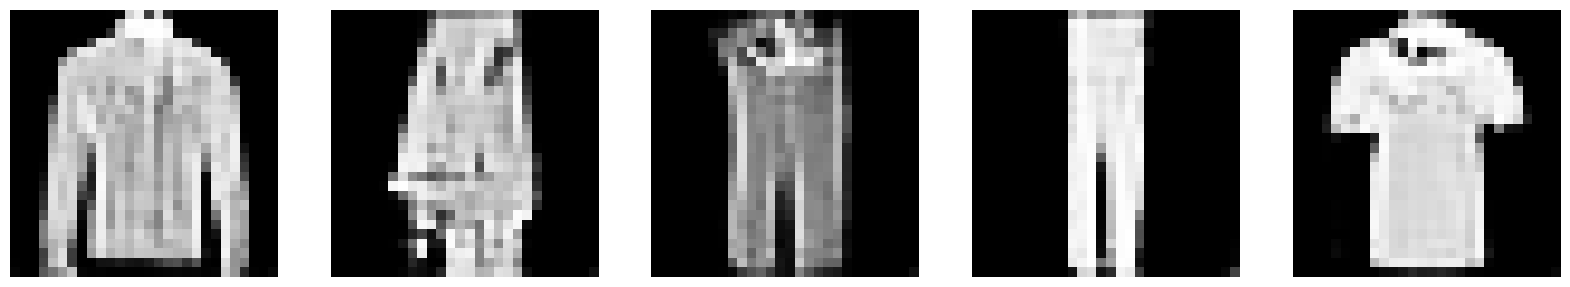

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3760 - g_loss: 0.7987
Epoch 72/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.7980

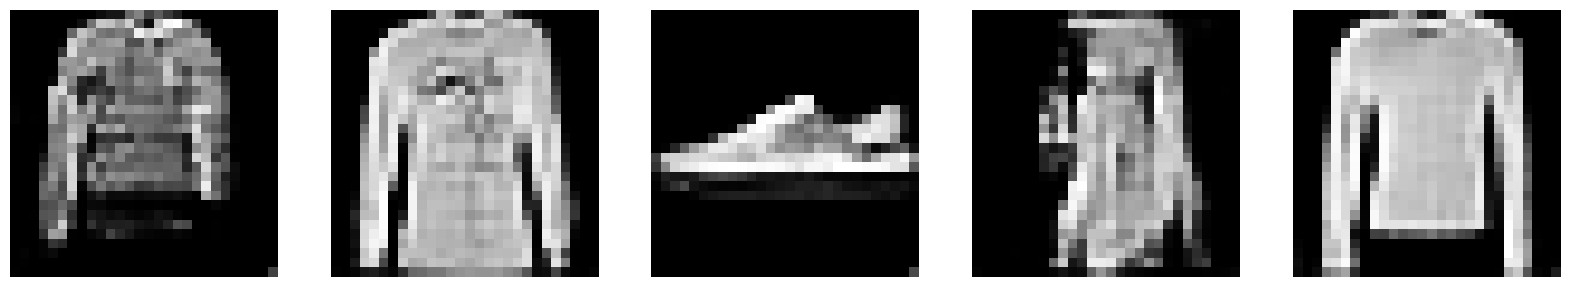

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.7980
Epoch 73/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.7995

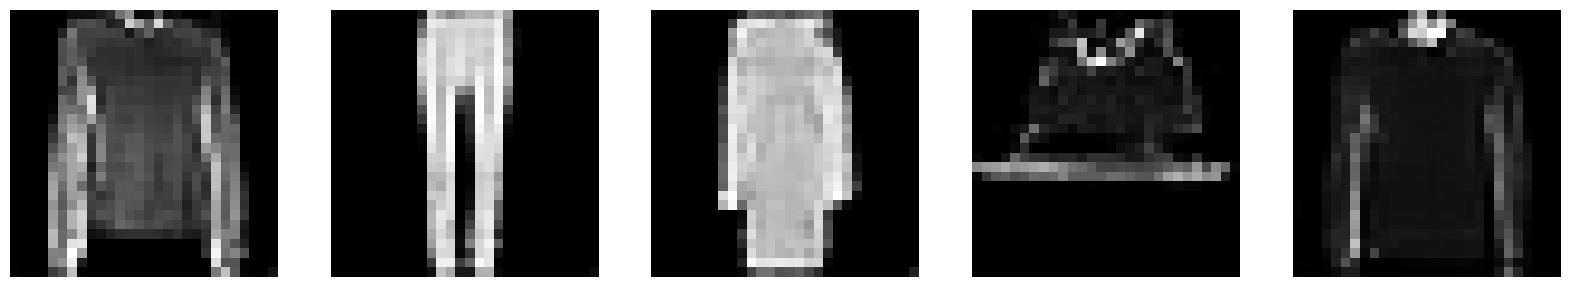

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.7995
Epoch 74/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3760 - g_loss: 0.7986

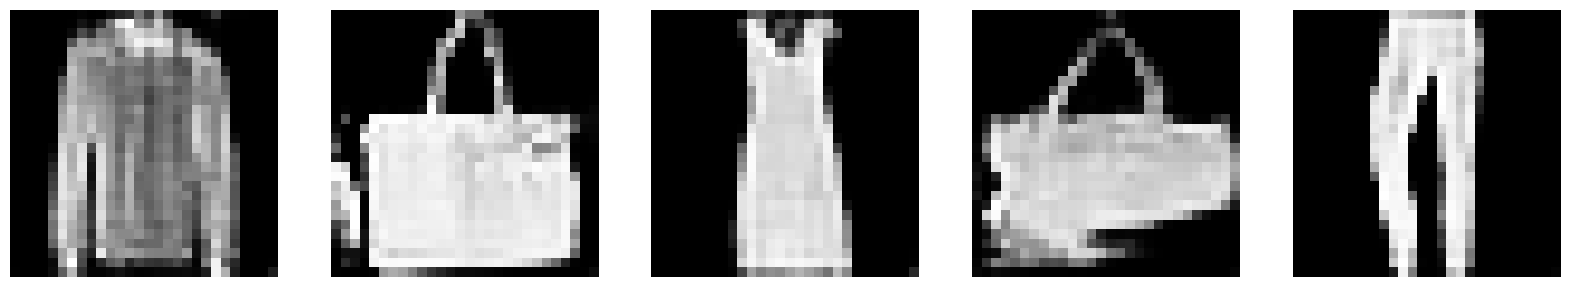

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3761 - g_loss: 0.7986
Epoch 75/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3760 - g_loss: 0.8003

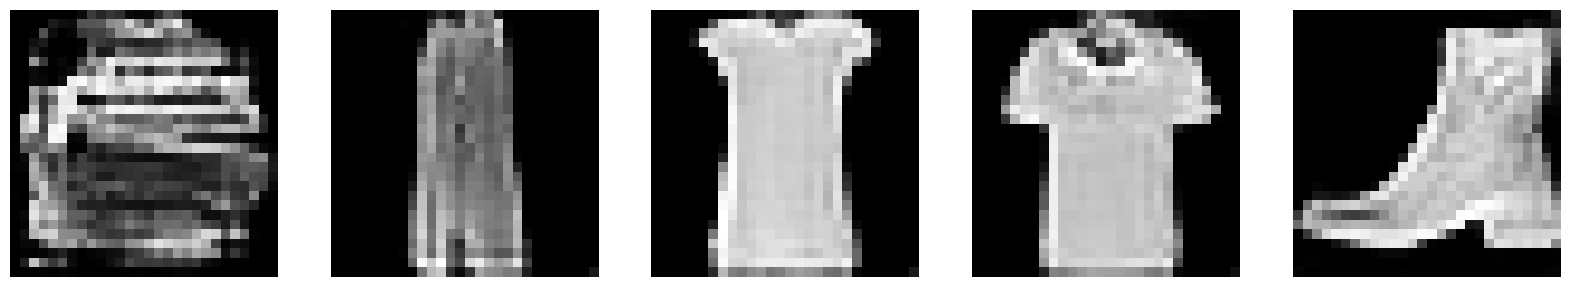

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3760 - g_loss: 0.8003
Epoch 76/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.8000

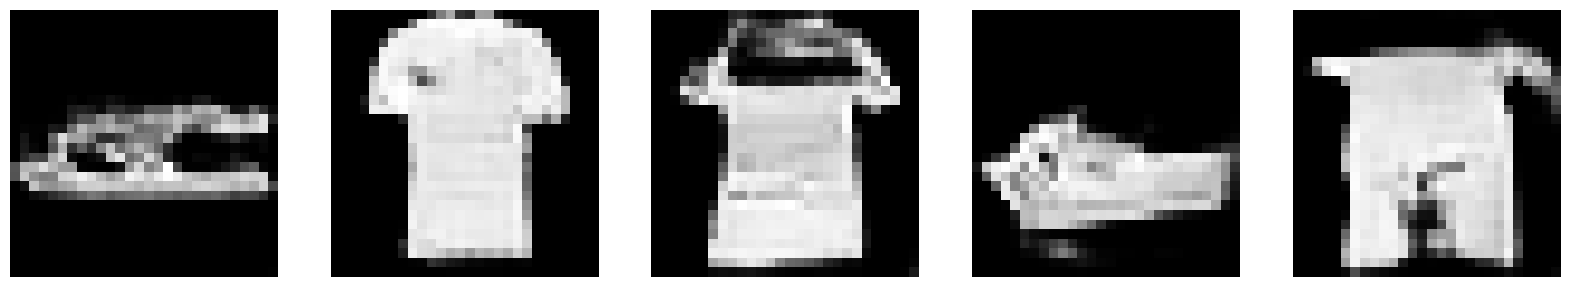

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3761 - g_loss: 0.8000
Epoch 77/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3765 - g_loss: 0.8005

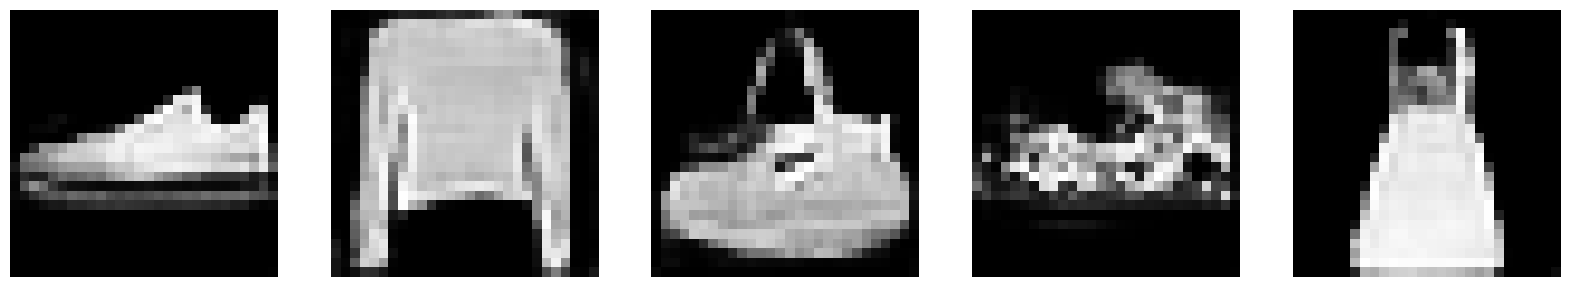

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8005
Epoch 78/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.7996

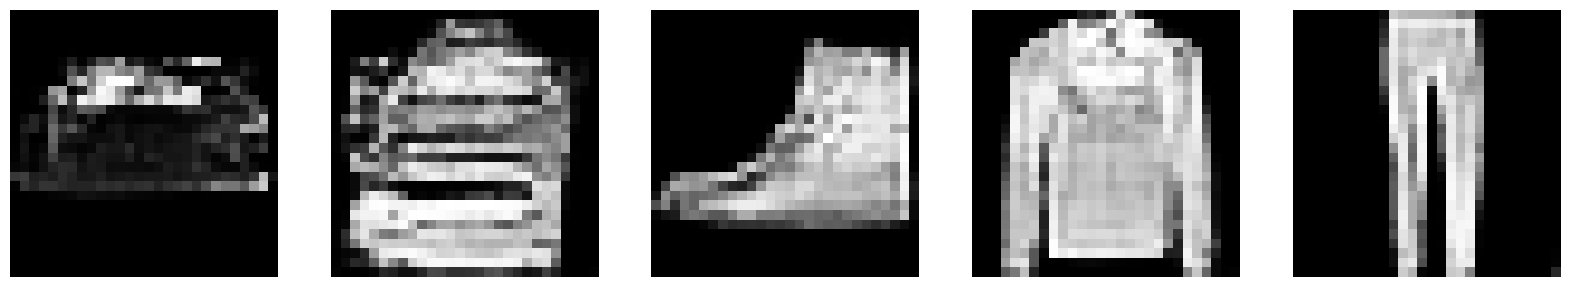

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.7996
Epoch 79/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3762 - g_loss: 0.7985

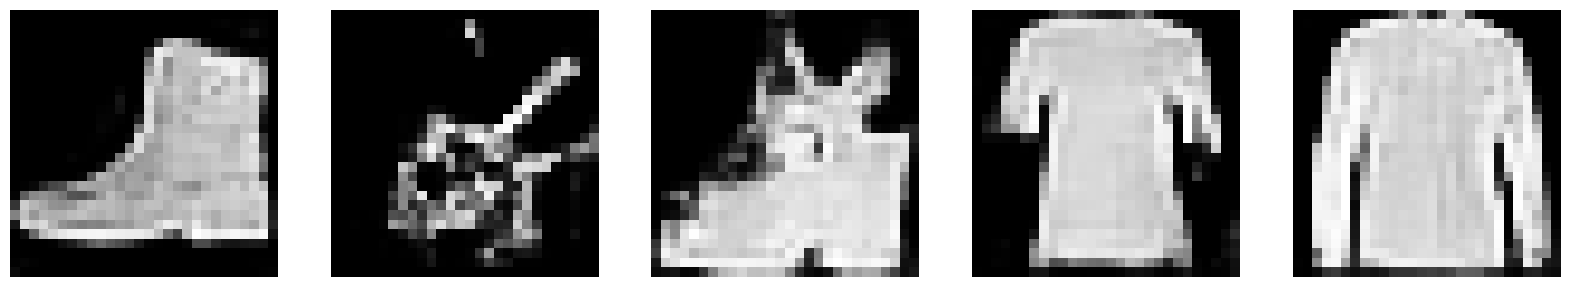

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3762 - g_loss: 0.7985
Epoch 80/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3760 - g_loss: 0.7989

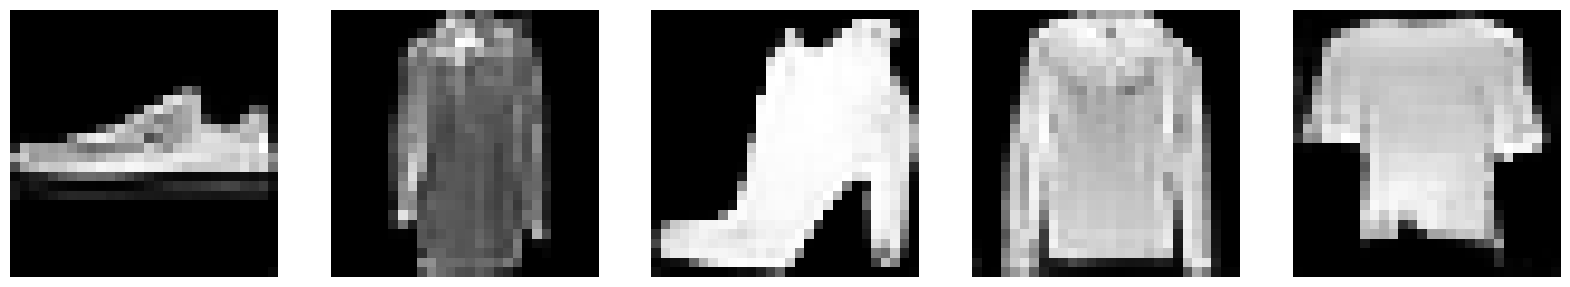

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3760 - g_loss: 0.7989
Epoch 81/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.7994

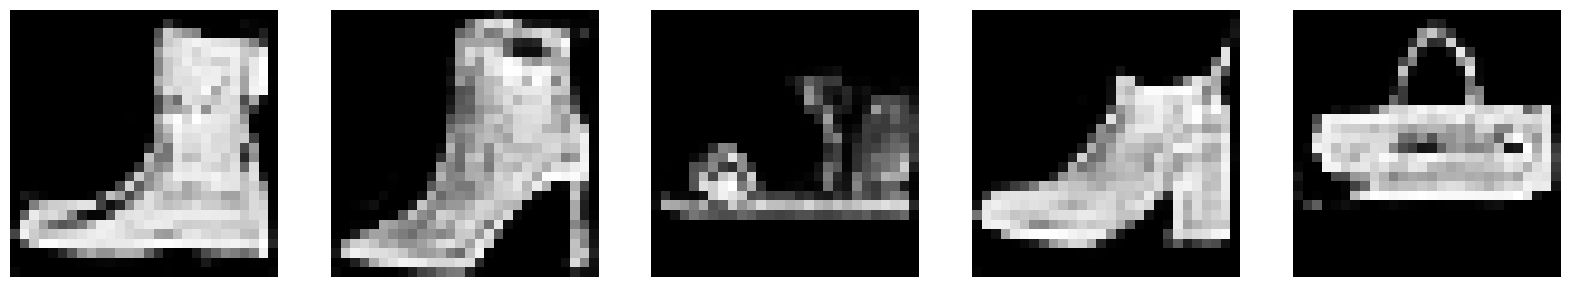

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.7993
Epoch 82/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3761 - g_loss: 0.7995

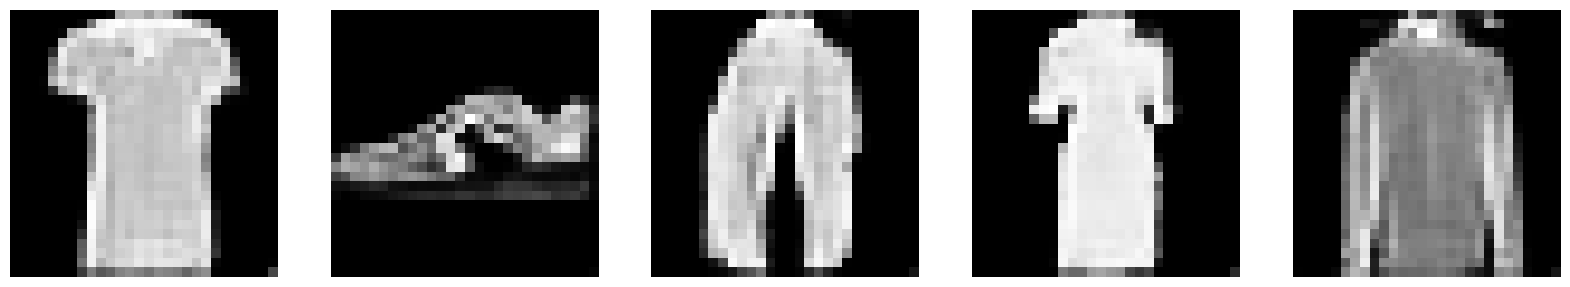

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3761 - g_loss: 0.7995
Epoch 83/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.7992

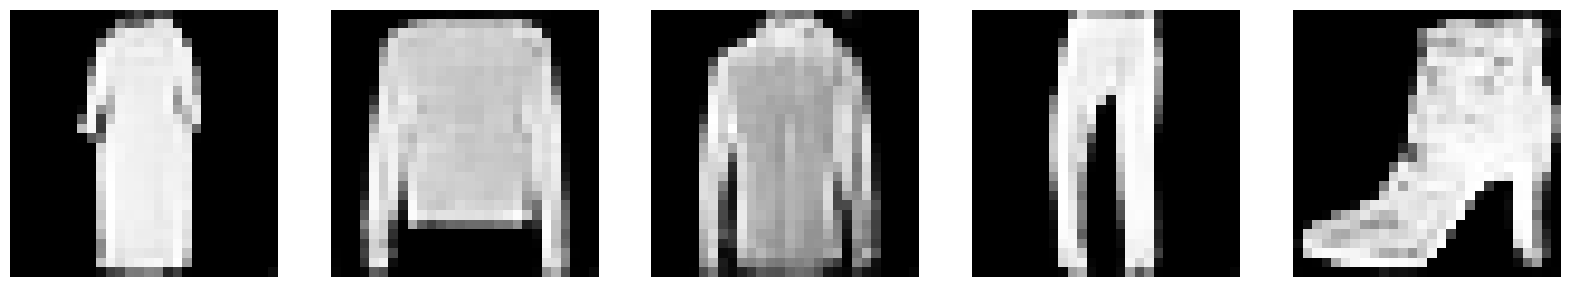

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.7992
Epoch 84/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.7992

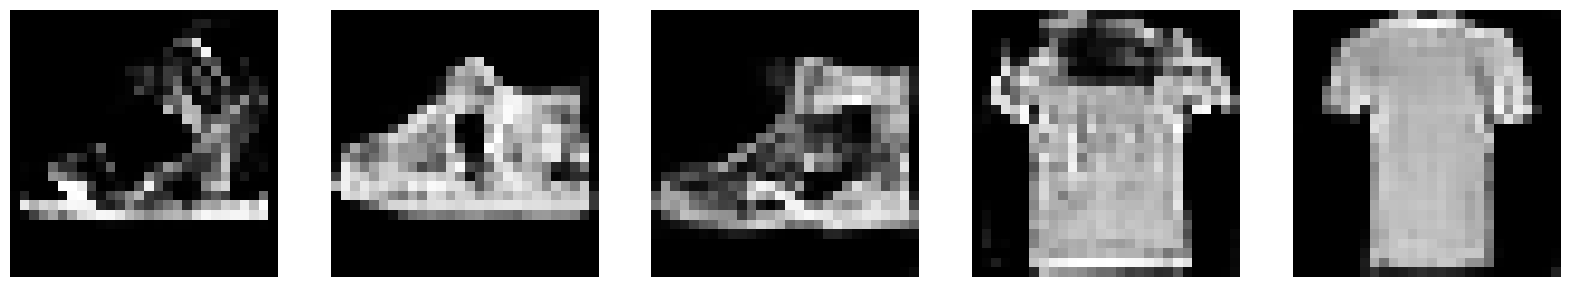

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.7992
Epoch 85/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.7992

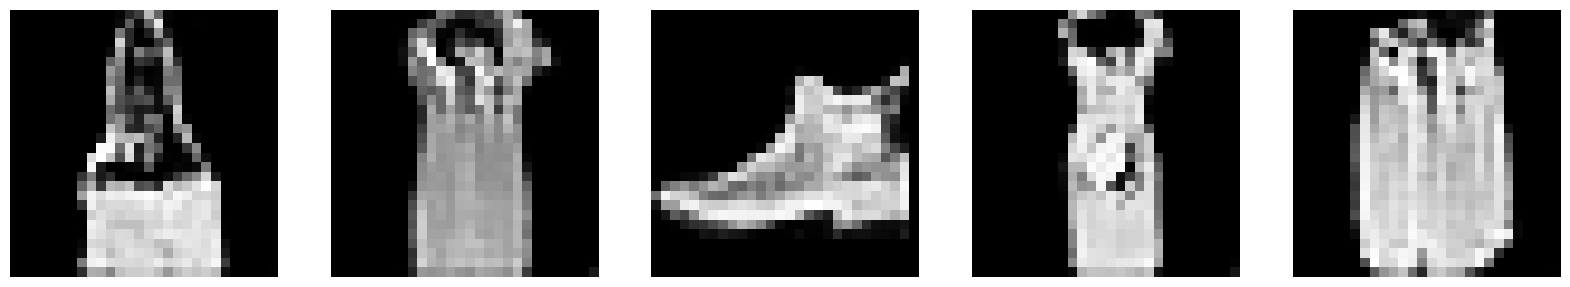

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.7992
Epoch 86/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3764 - g_loss: 0.7999

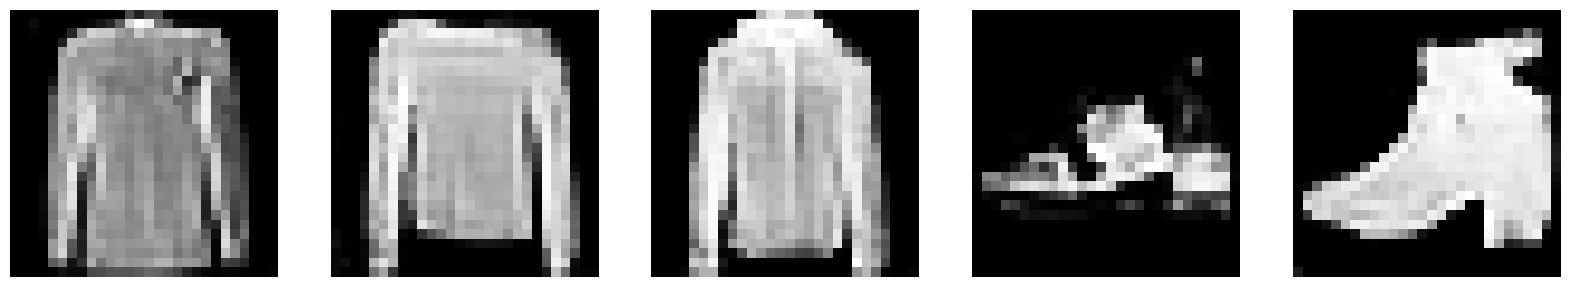

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3764 - g_loss: 0.7999
Epoch 87/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.7987

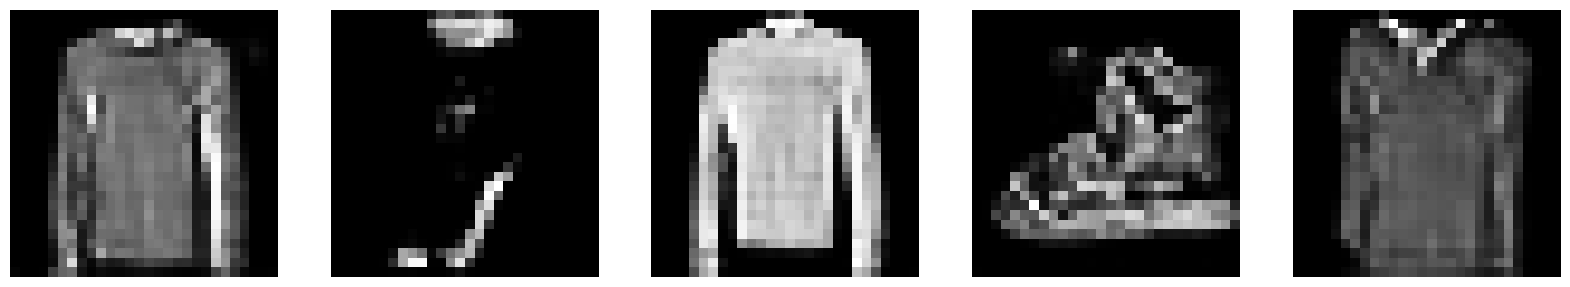

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3764 - g_loss: 0.7986
Epoch 88/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3760 - g_loss: 0.7977

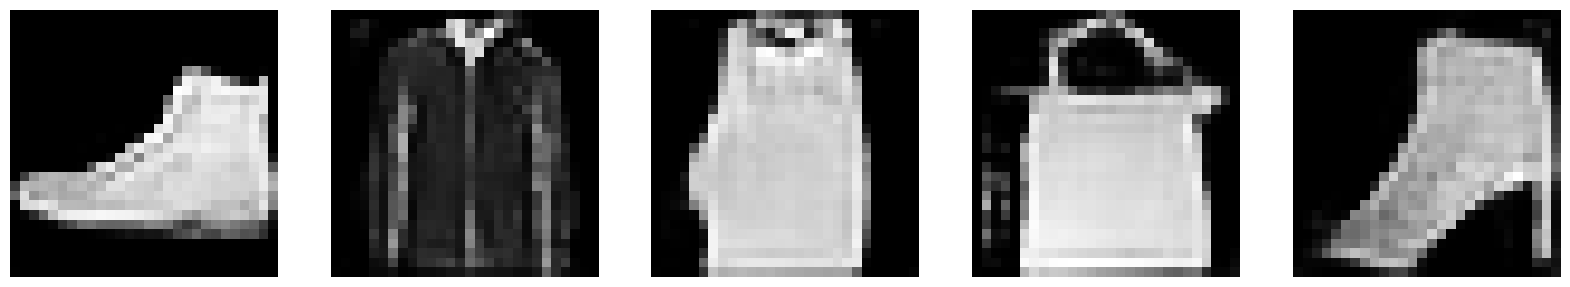

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3760 - g_loss: 0.7976
Epoch 89/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.7999

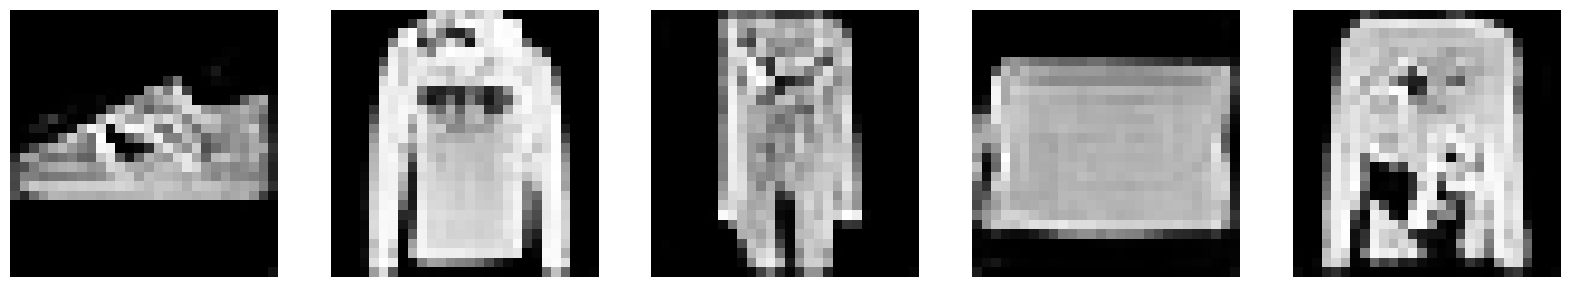

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.7998
Epoch 90/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3765 - g_loss: 0.7990

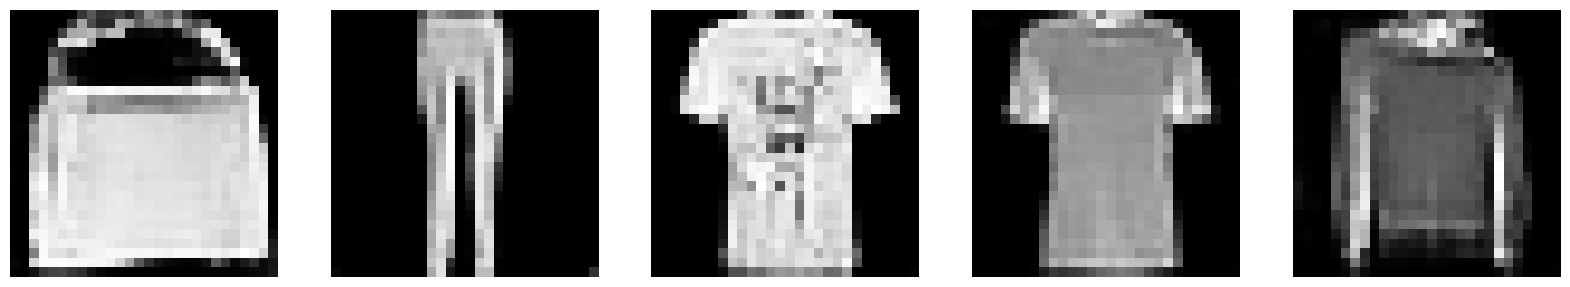

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3765 - g_loss: 0.7991
Epoch 91/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.7990

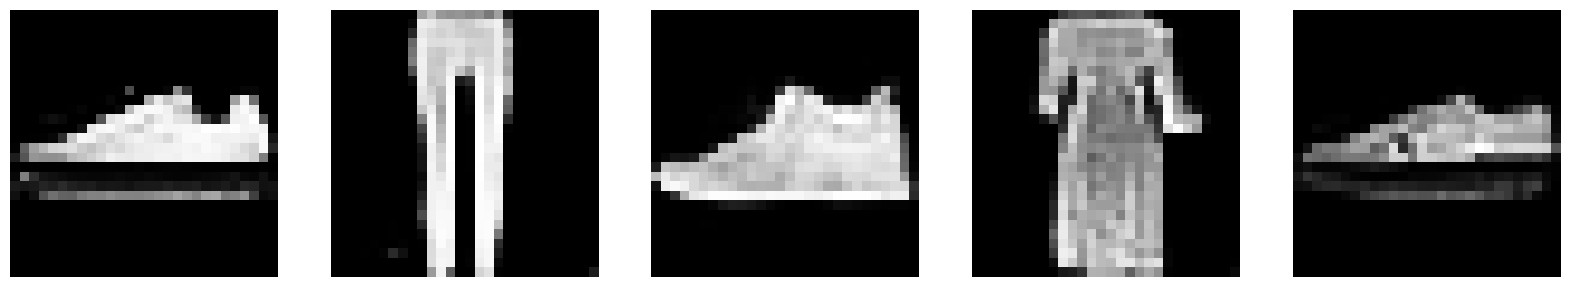

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.7990
Epoch 92/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.7986

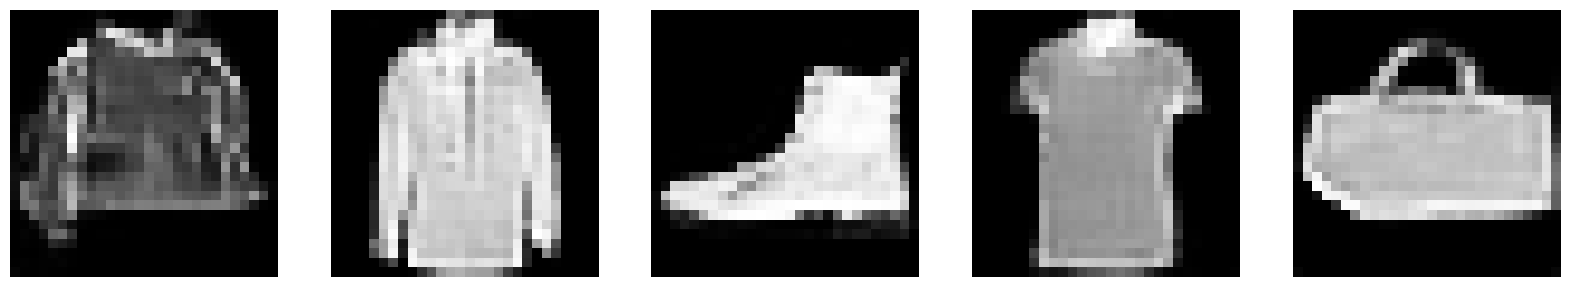

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.7986
Epoch 93/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.7984

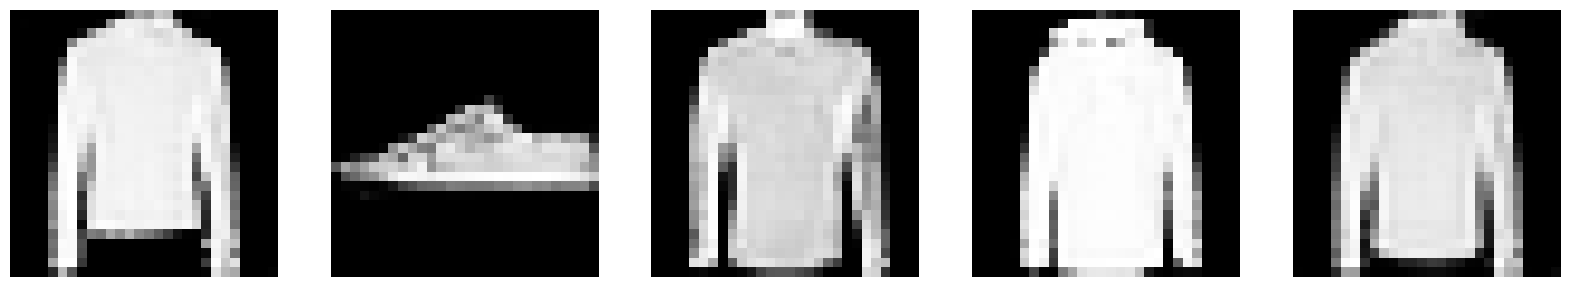

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3762 - g_loss: 0.7984
Epoch 94/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3766 - g_loss: 0.7981

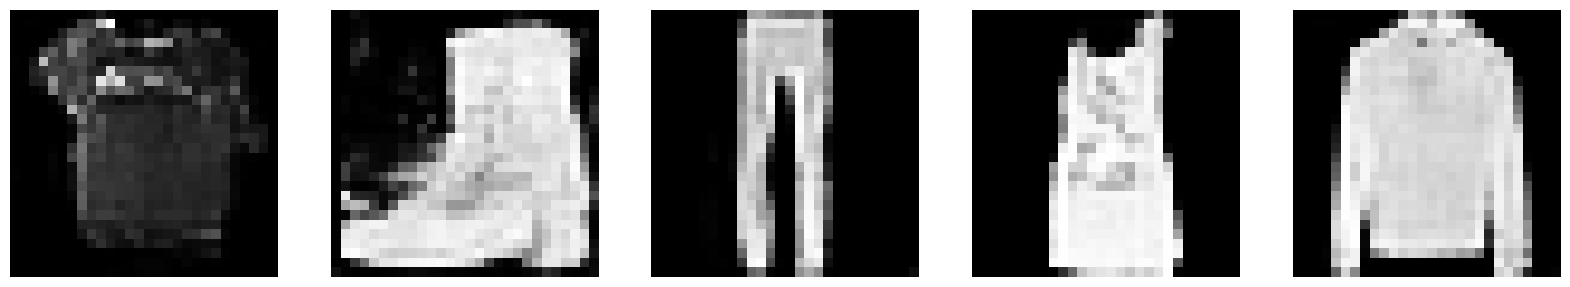

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3766 - g_loss: 0.7981
Epoch 95/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3761 - g_loss: 0.7986

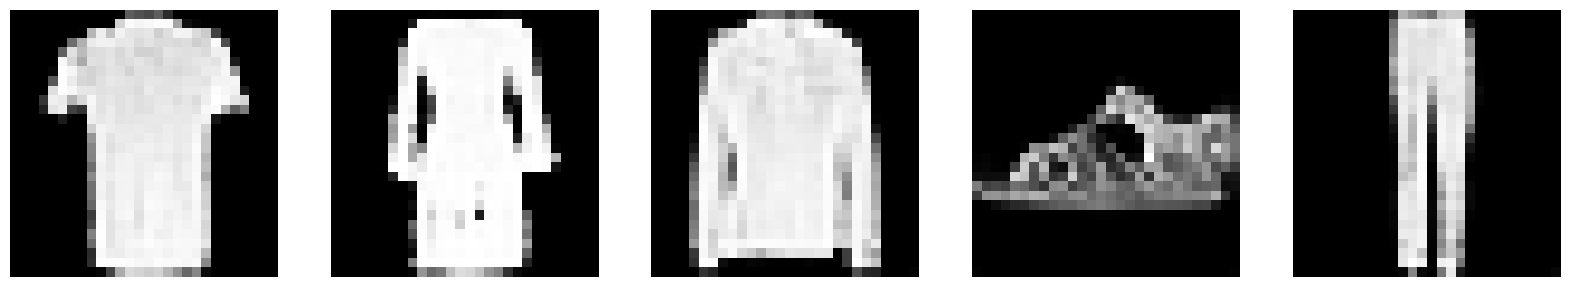

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3760 - g_loss: 0.7986
Epoch 96/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3765 - g_loss: 0.7984

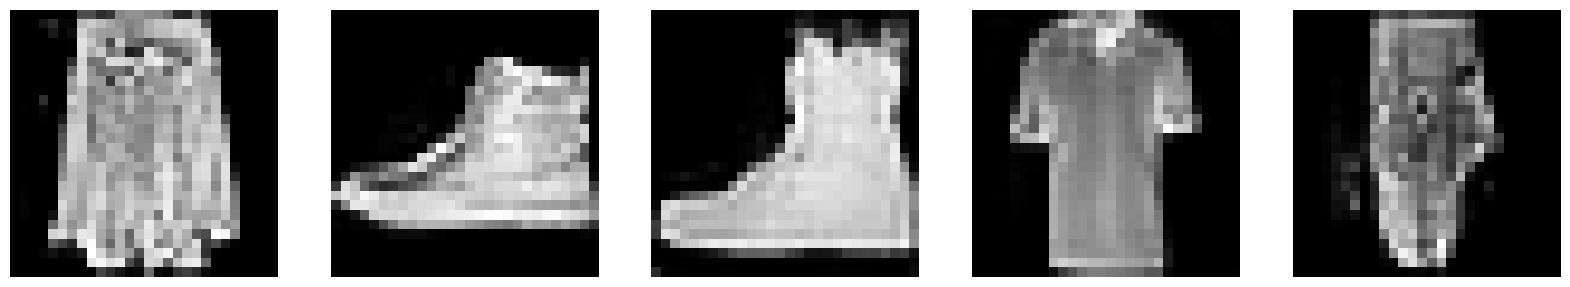

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3765 - g_loss: 0.7984
Epoch 97/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.7990

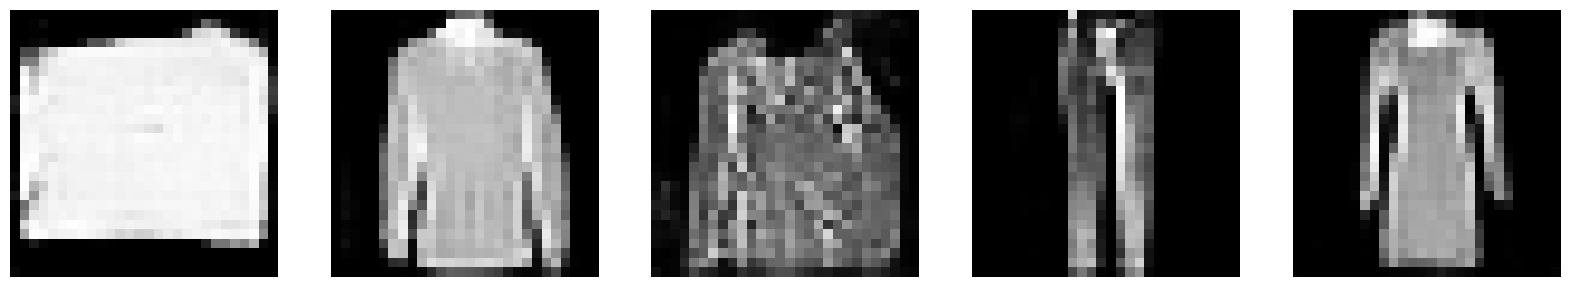

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.7990
Epoch 98/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.7995

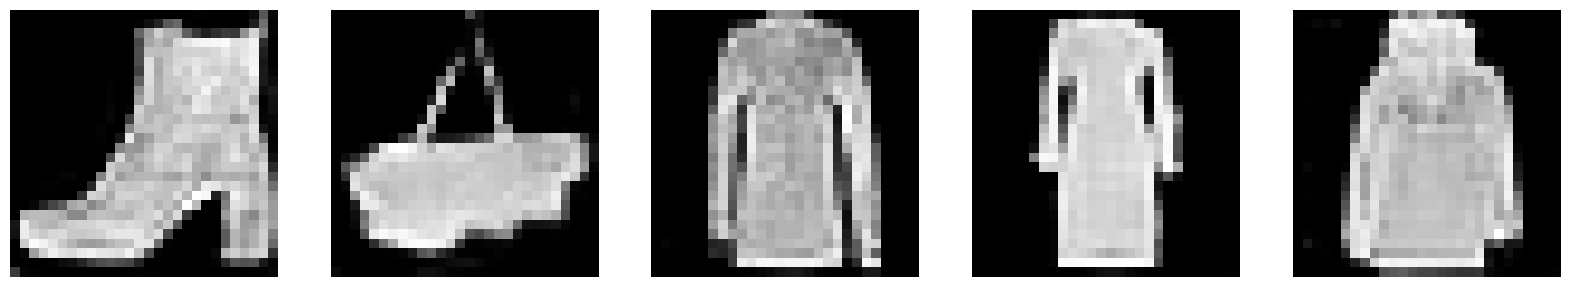

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.7995
Epoch 99/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8009

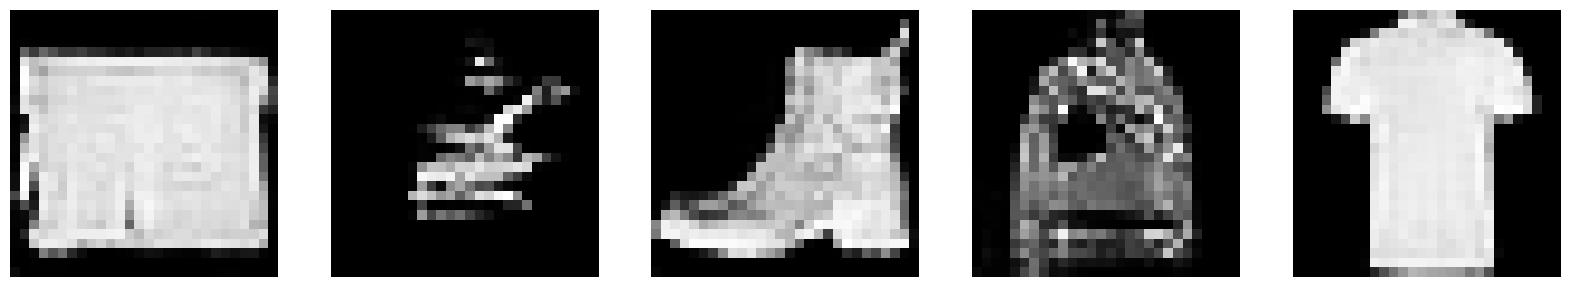

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8009
Epoch 100/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8003

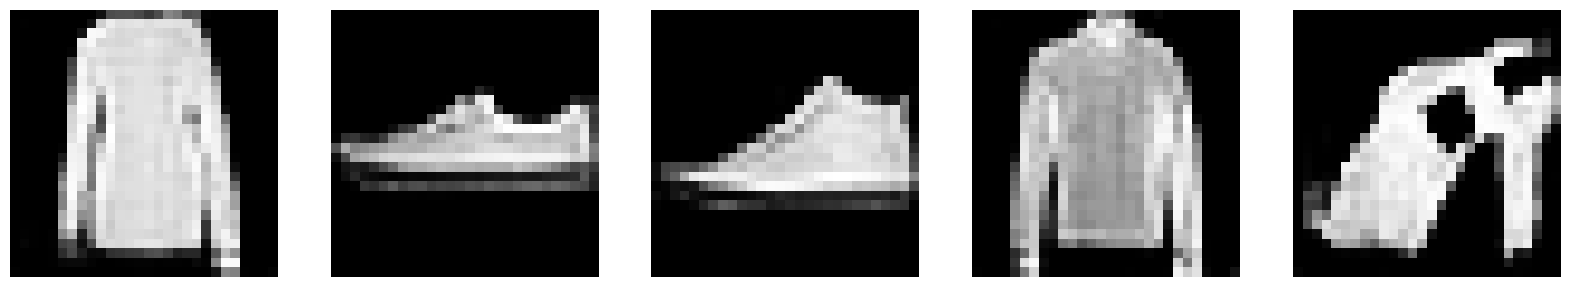

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8004
Epoch 101/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8004

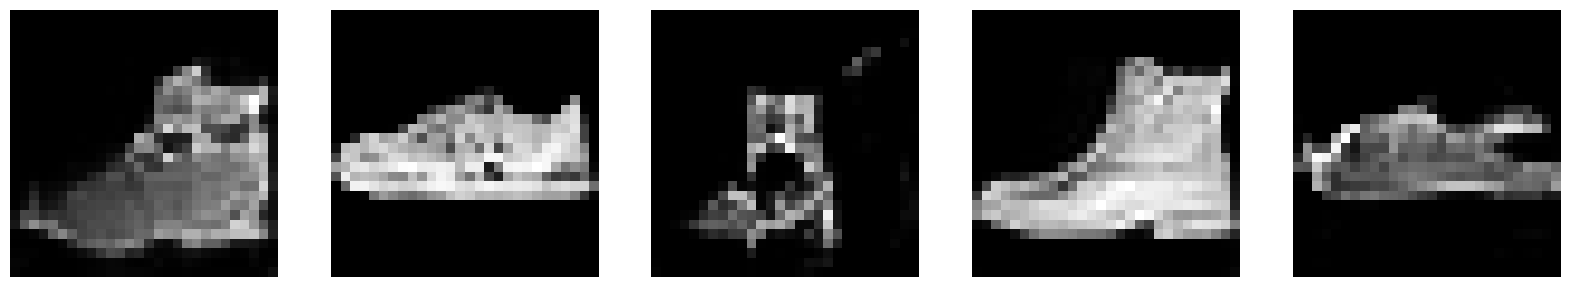

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8004
Epoch 102/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8008

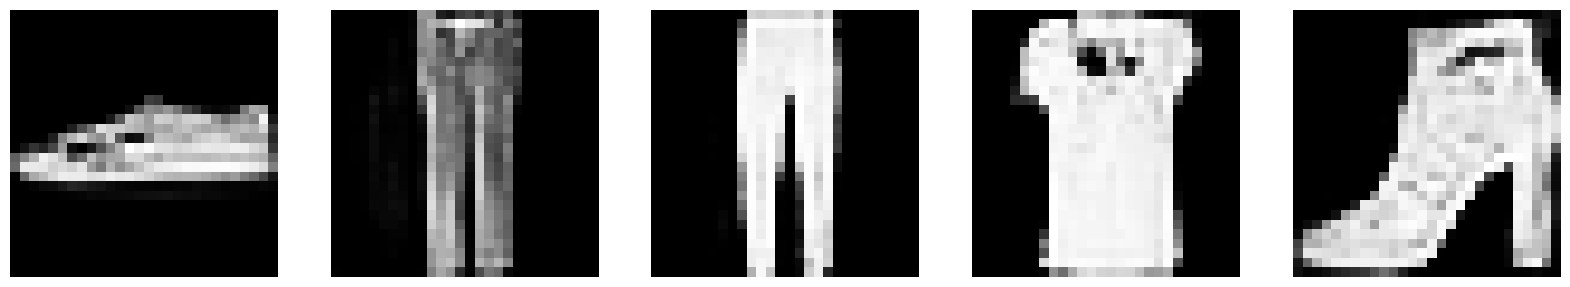

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8008
Epoch 103/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8003

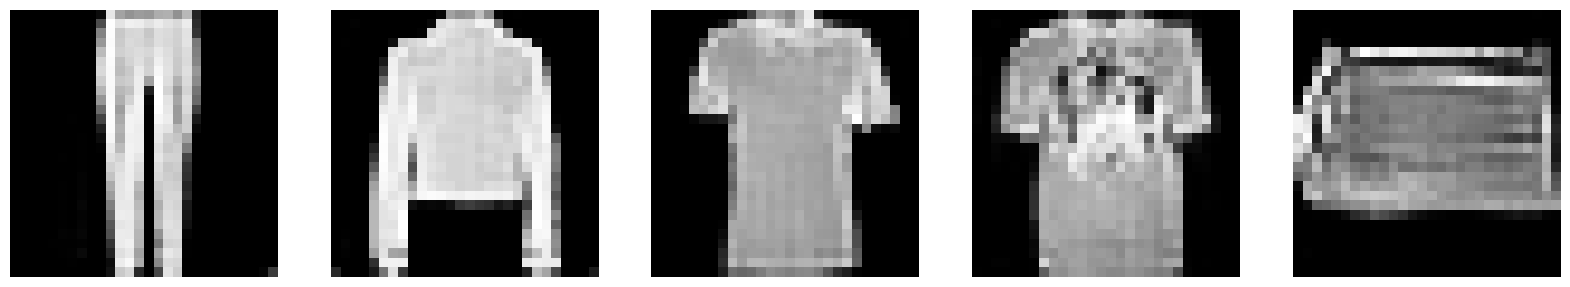

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8004
Epoch 104/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3764 - g_loss: 0.8004

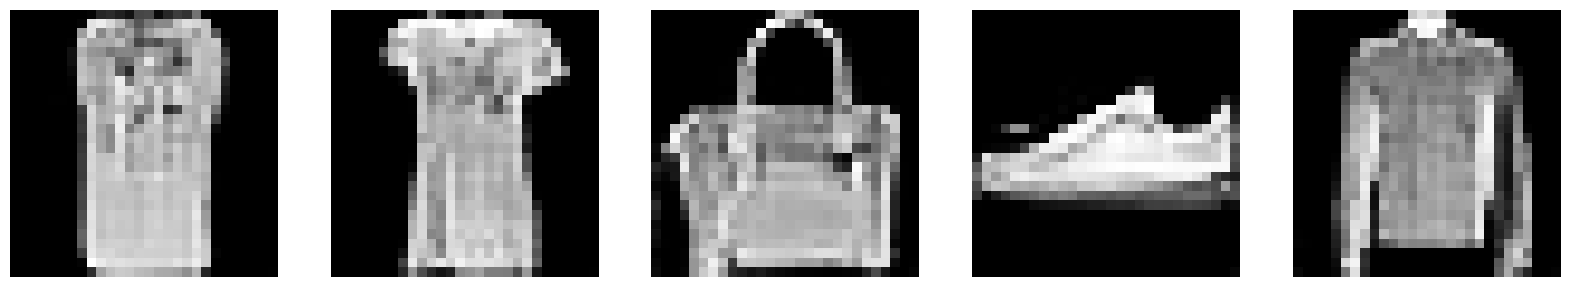

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3764 - g_loss: 0.8004
Epoch 105/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8017

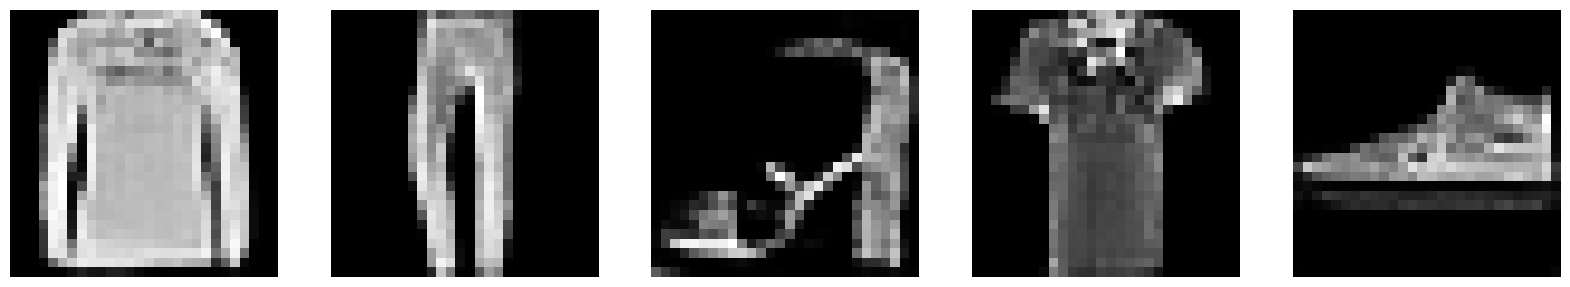

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8017
Epoch 106/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8005

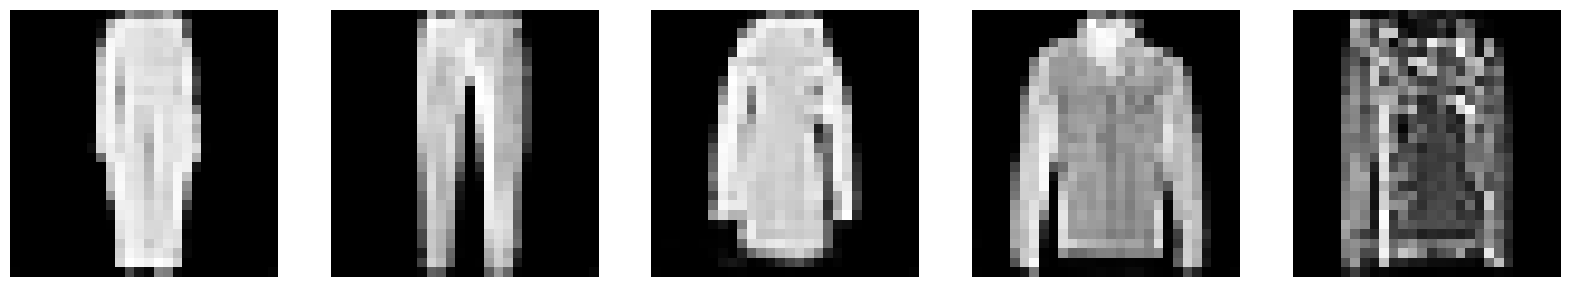

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8005
Epoch 107/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8006

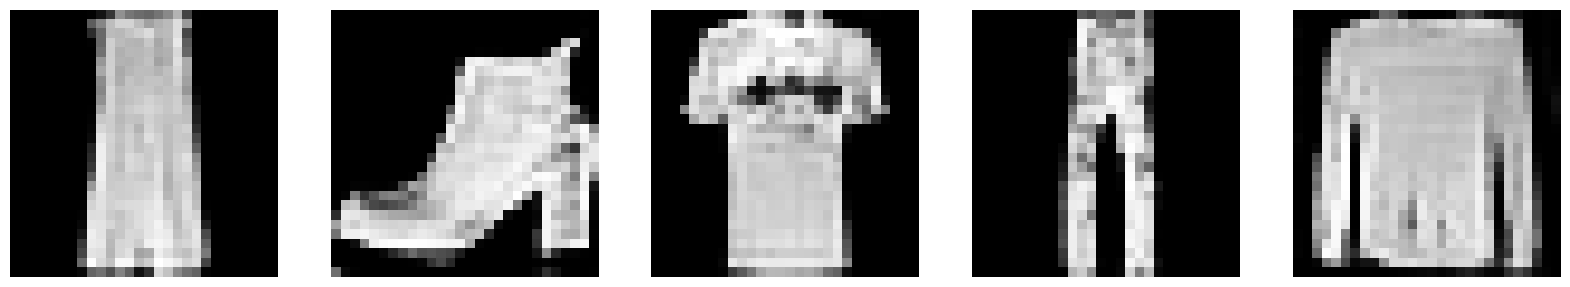

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8006
Epoch 108/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.8005

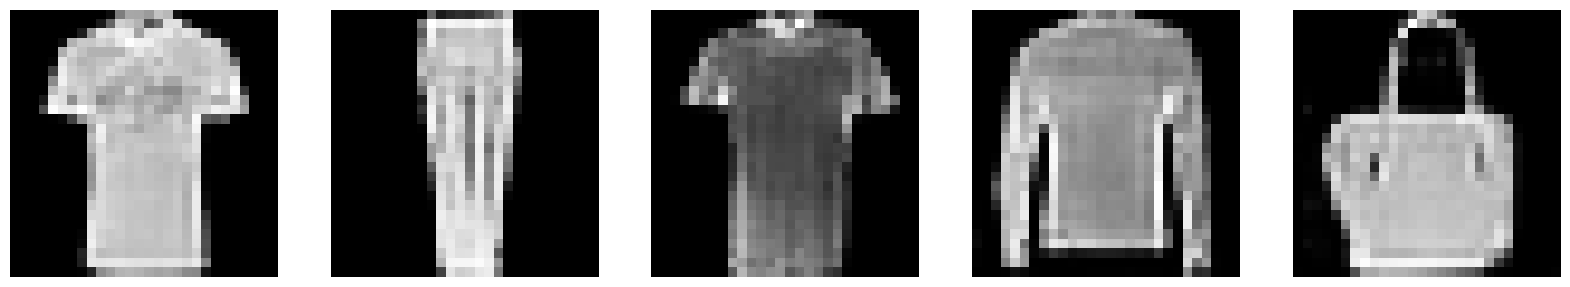

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3760 - g_loss: 0.8005
Epoch 109/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3762 - g_loss: 0.8008

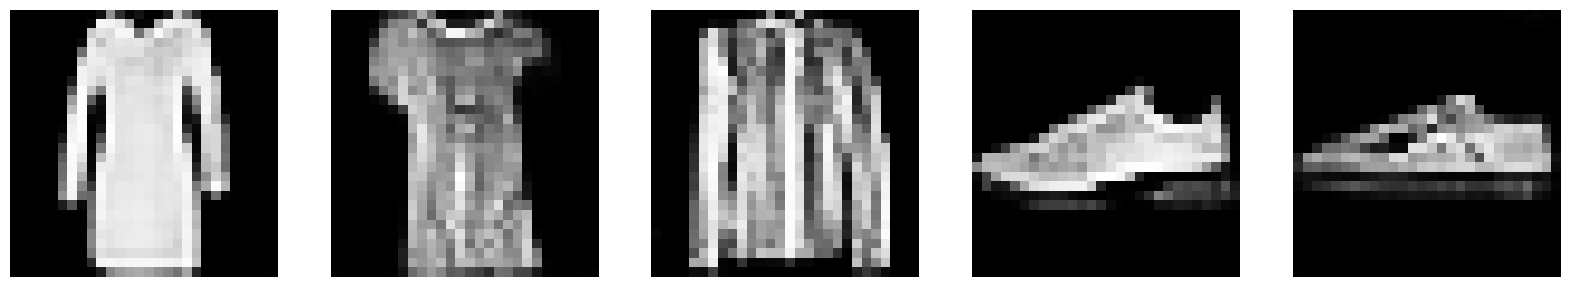

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3761 - g_loss: 0.8007
Epoch 110/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3764 - g_loss: 0.7997

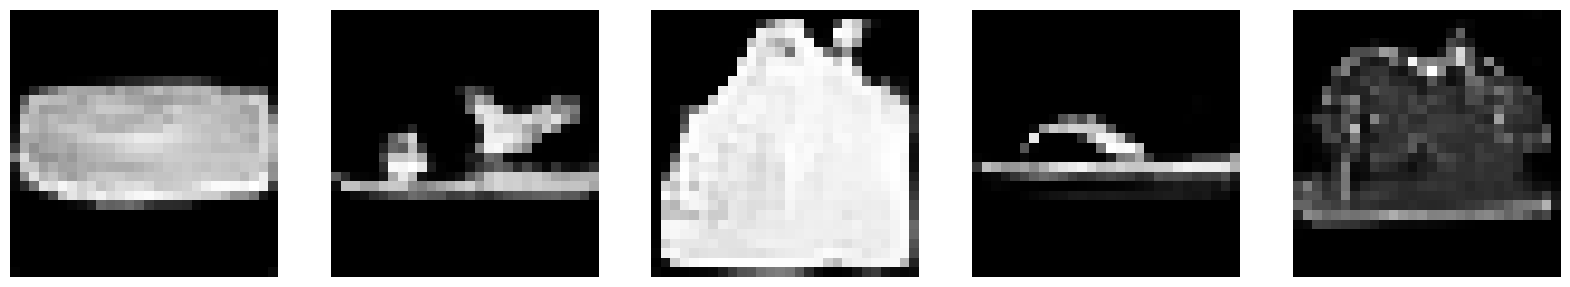

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3764 - g_loss: 0.7997
Epoch 111/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8001

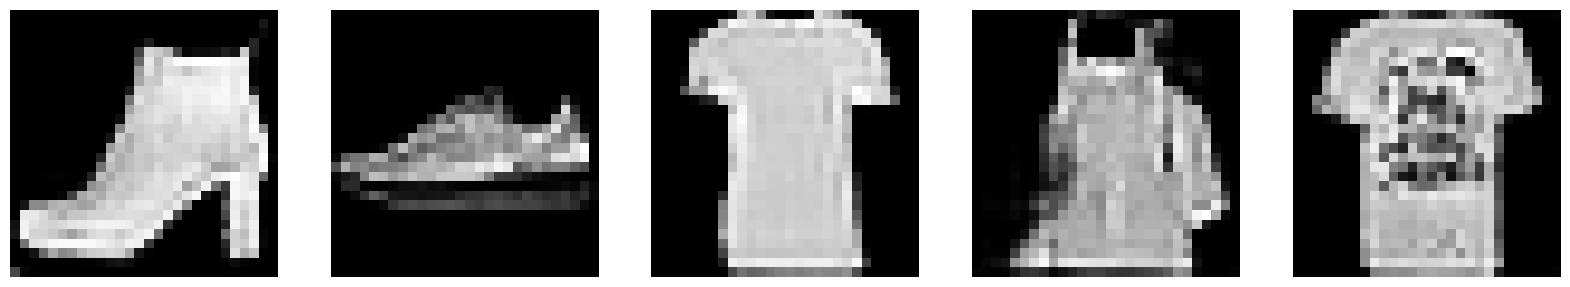

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8001
Epoch 112/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3761 - g_loss: 0.8002

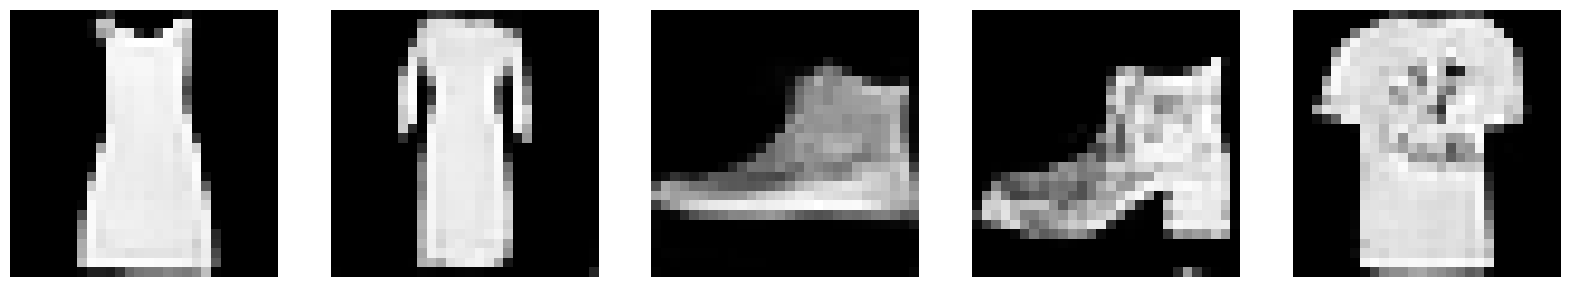

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.8002
Epoch 113/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8000

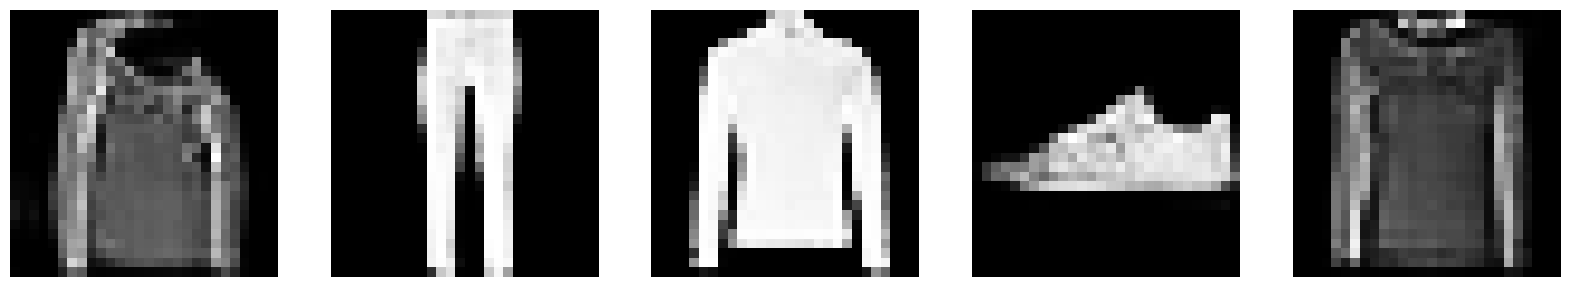

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8000
Epoch 114/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8003

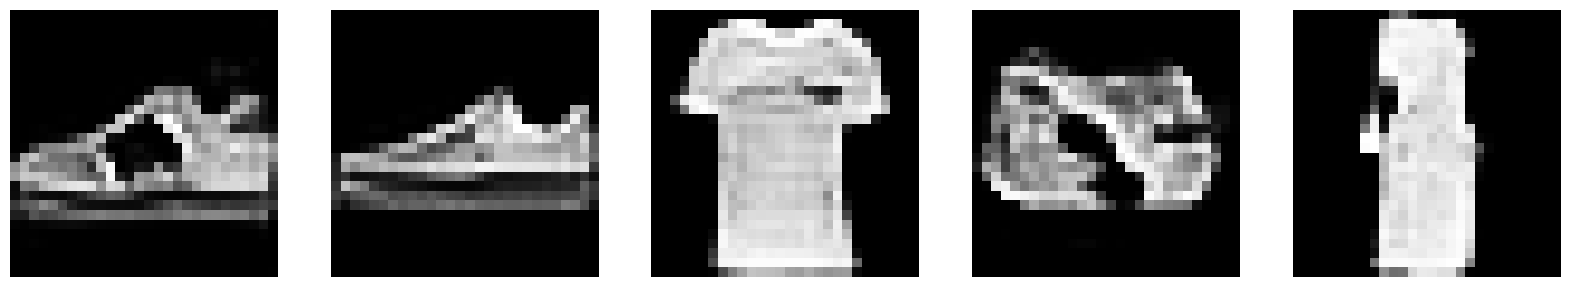

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8003
Epoch 115/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.7999

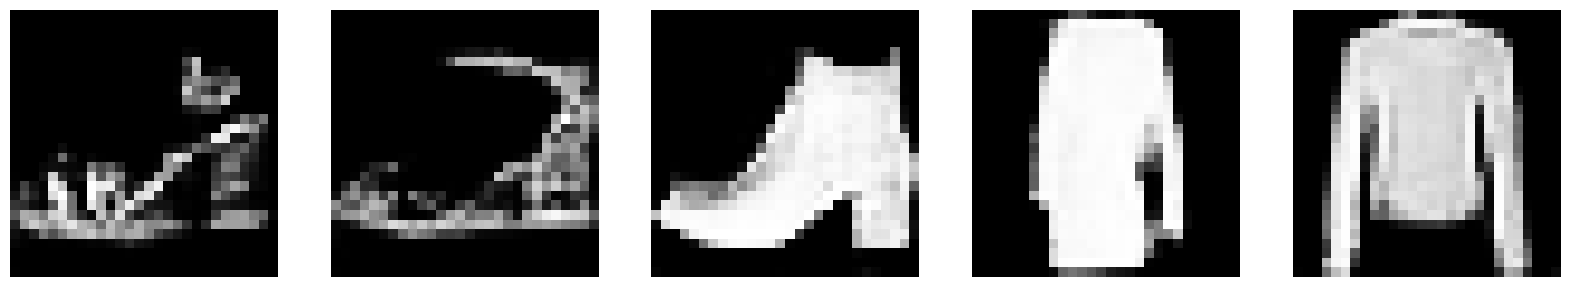

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.7999
Epoch 116/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.7997

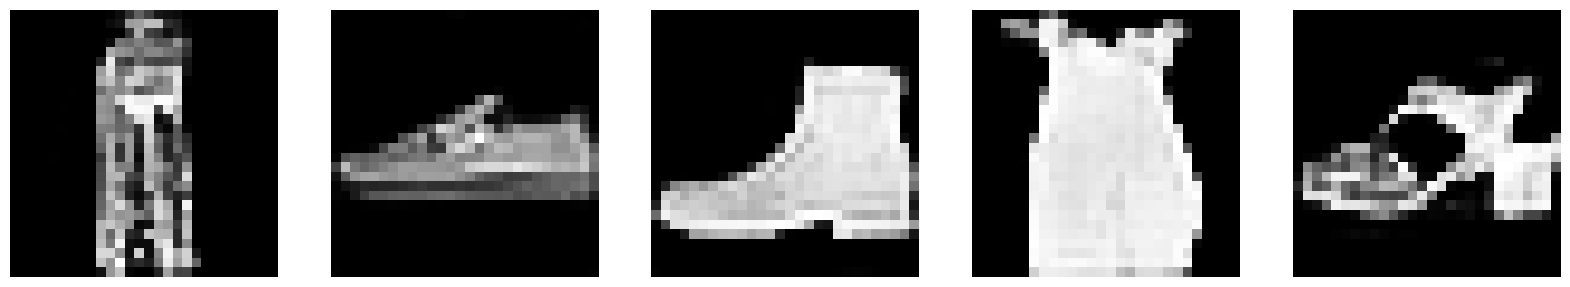

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.7997
Epoch 117/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3764 - g_loss: 0.7998

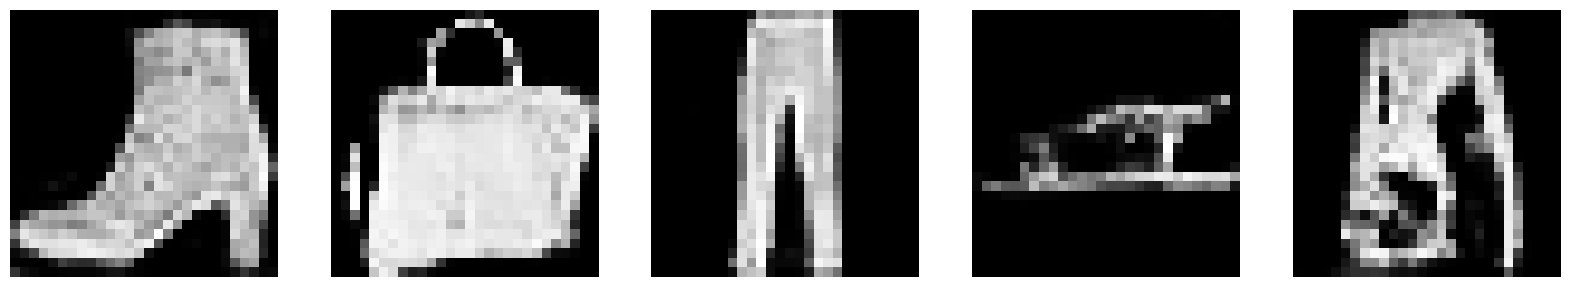

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.7998
Epoch 118/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3762 - g_loss: 0.7995

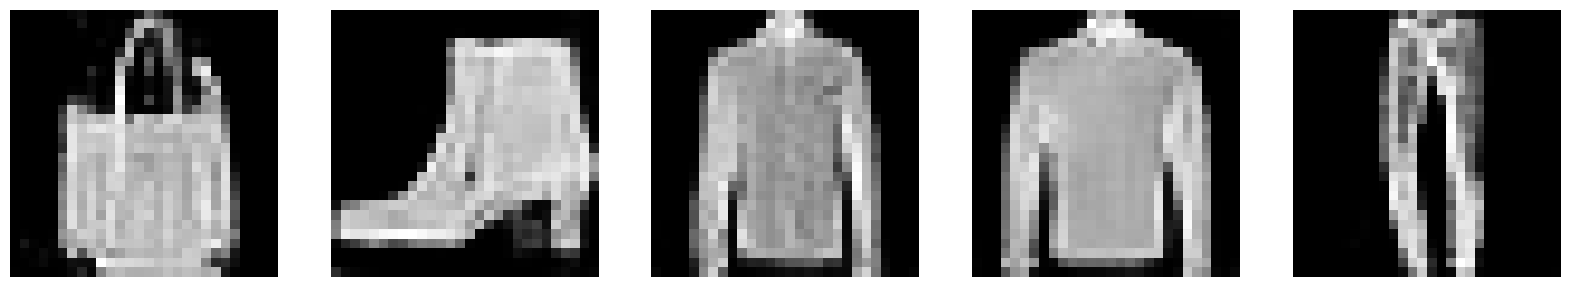

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3762 - g_loss: 0.7995
Epoch 119/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8007

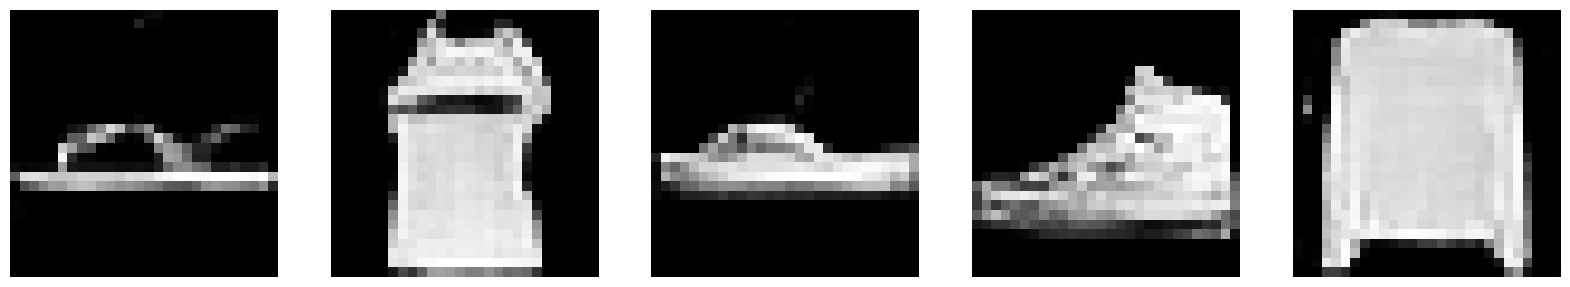

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8007
Epoch 120/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3765 - g_loss: 0.8000

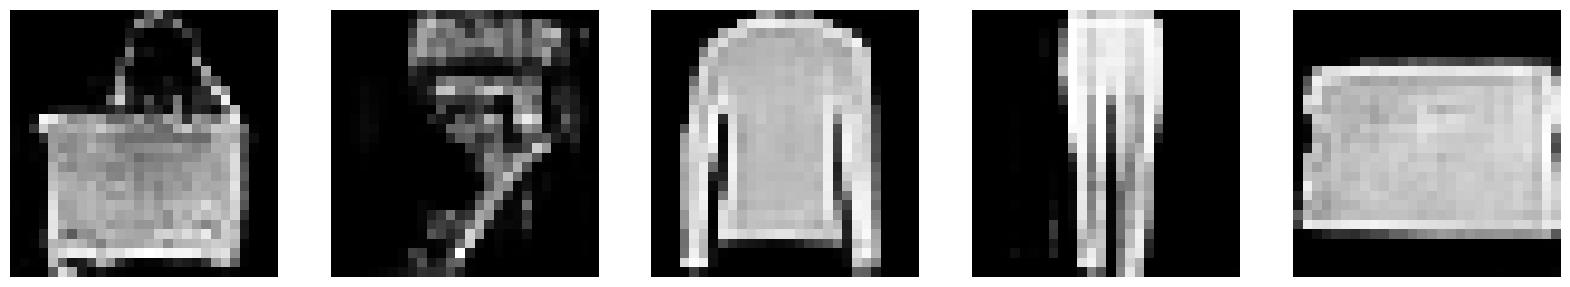

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3765 - g_loss: 0.8000
Epoch 121/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8007

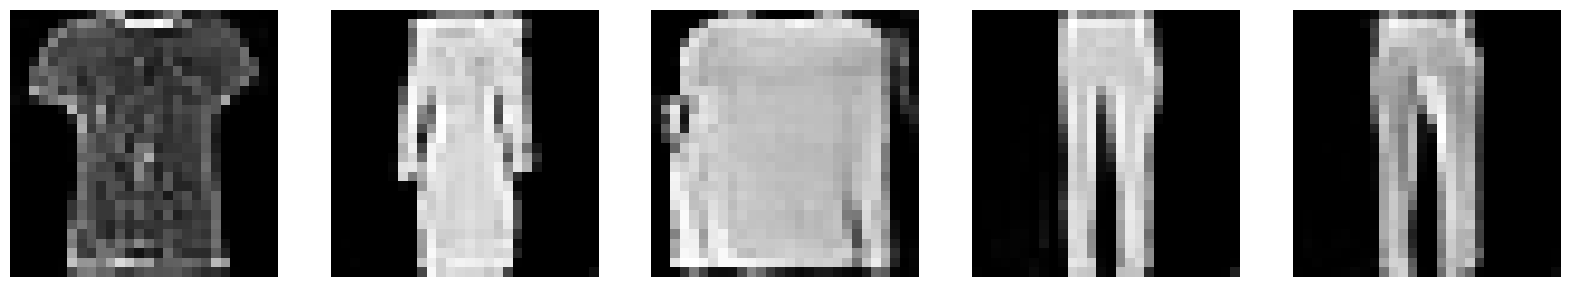

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8007
Epoch 122/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.7998

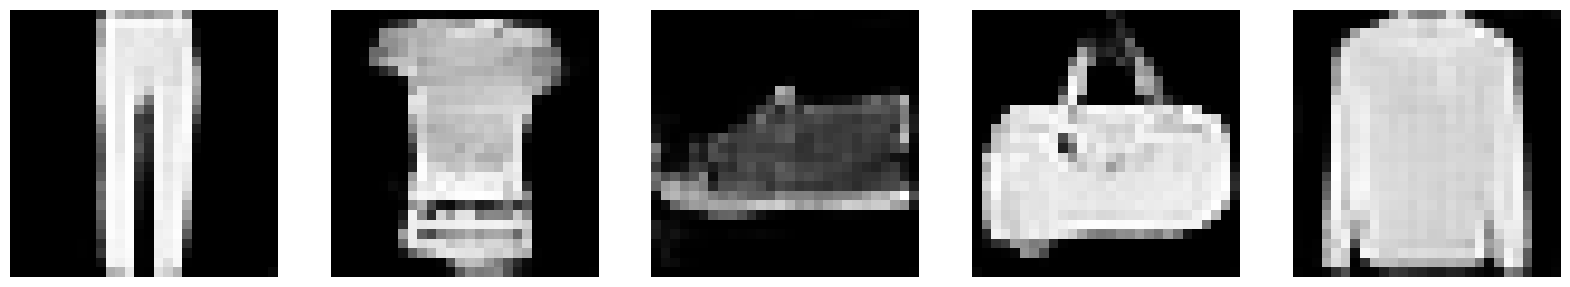

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.7997
Epoch 123/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8003

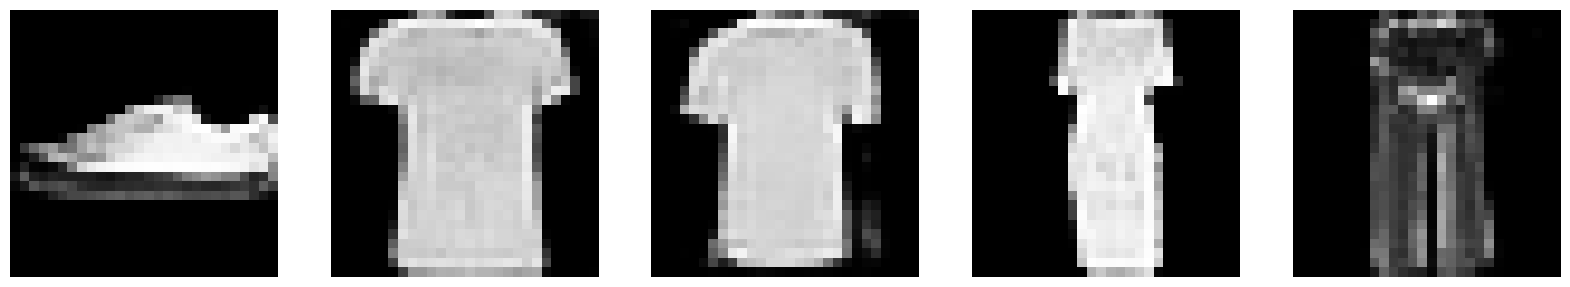

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3762 - g_loss: 0.8003
Epoch 124/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8003

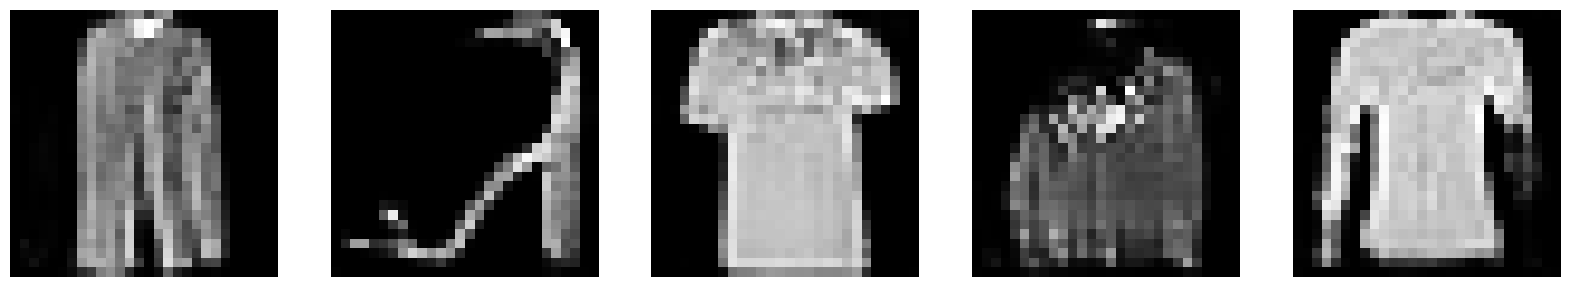

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8003
Epoch 125/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8009

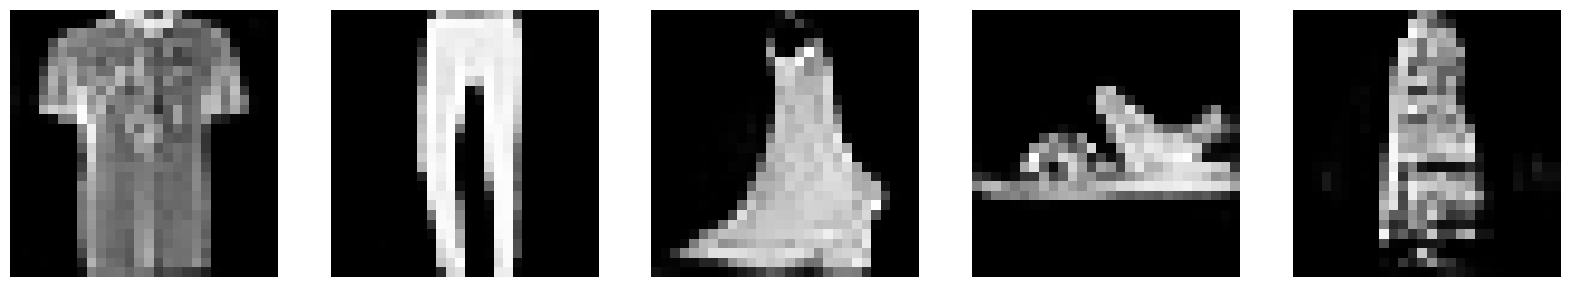

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.8010
Epoch 126/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8007

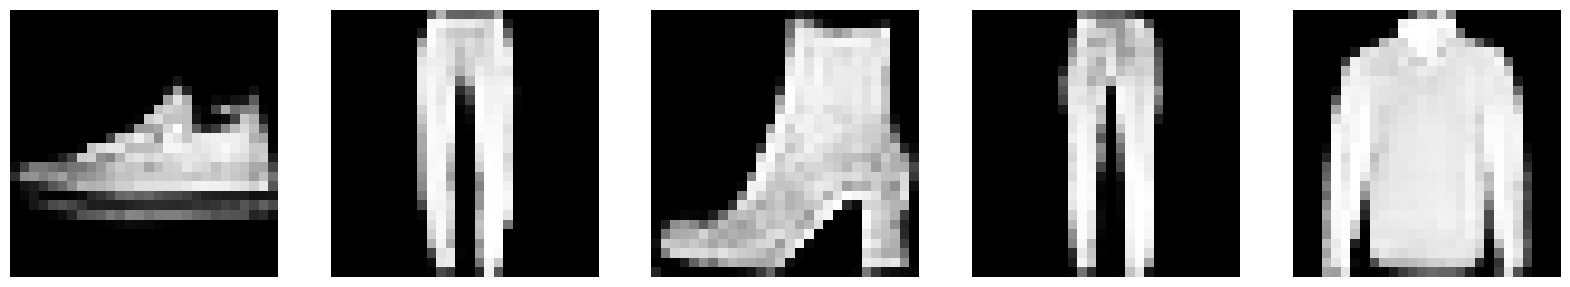

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8007
Epoch 127/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8001

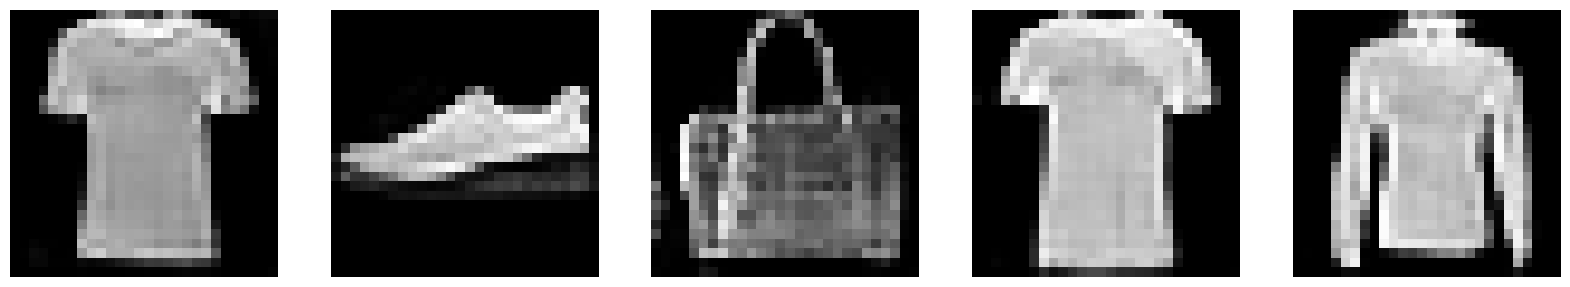

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3762 - g_loss: 0.8001
Epoch 128/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3765 - g_loss: 0.7998

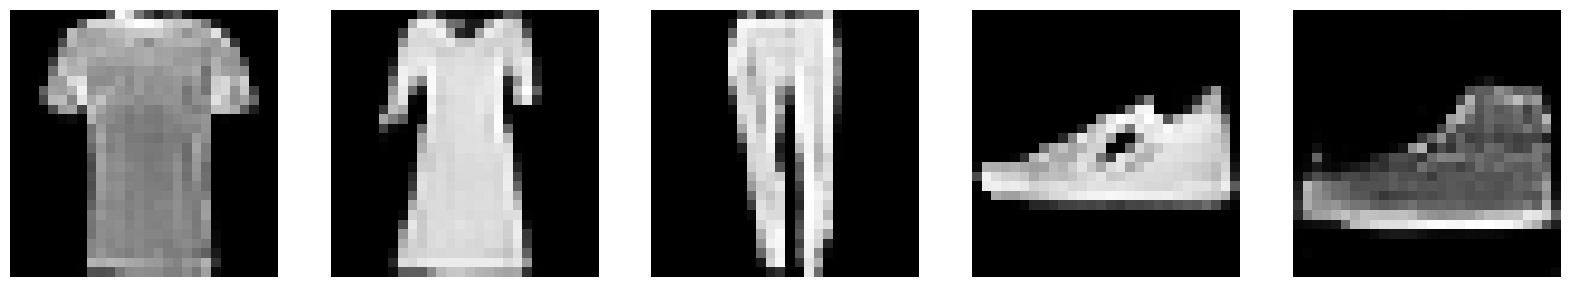

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.7998
Epoch 129/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3762 - g_loss: 0.8012

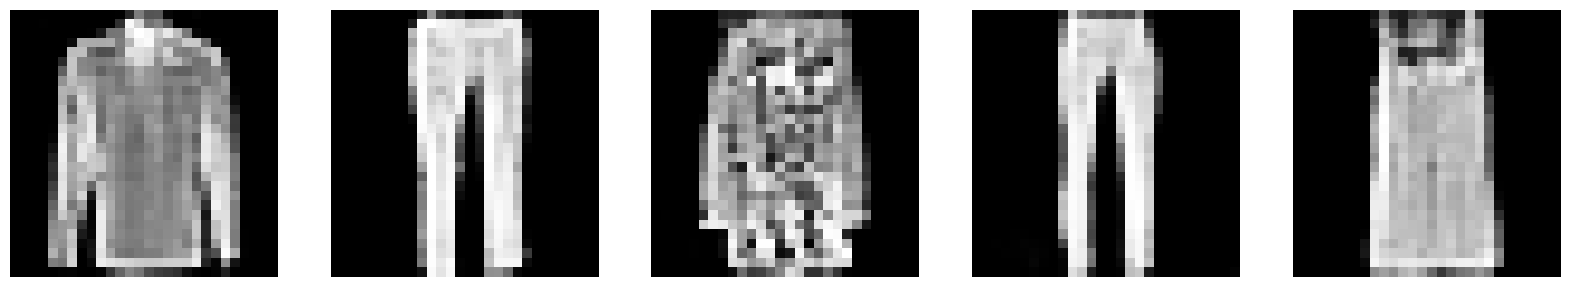

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3762 - g_loss: 0.8012
Epoch 130/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3765 - g_loss: 0.8003

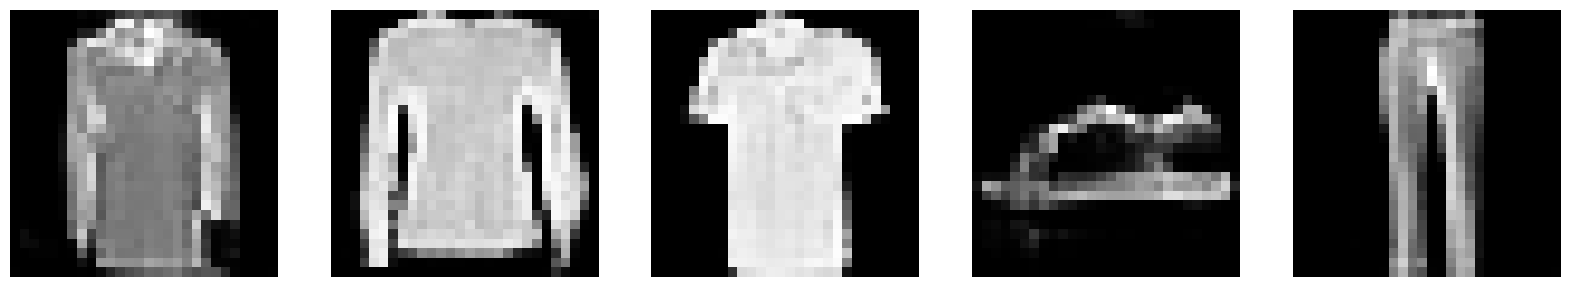

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3765 - g_loss: 0.8003
Epoch 131/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8013

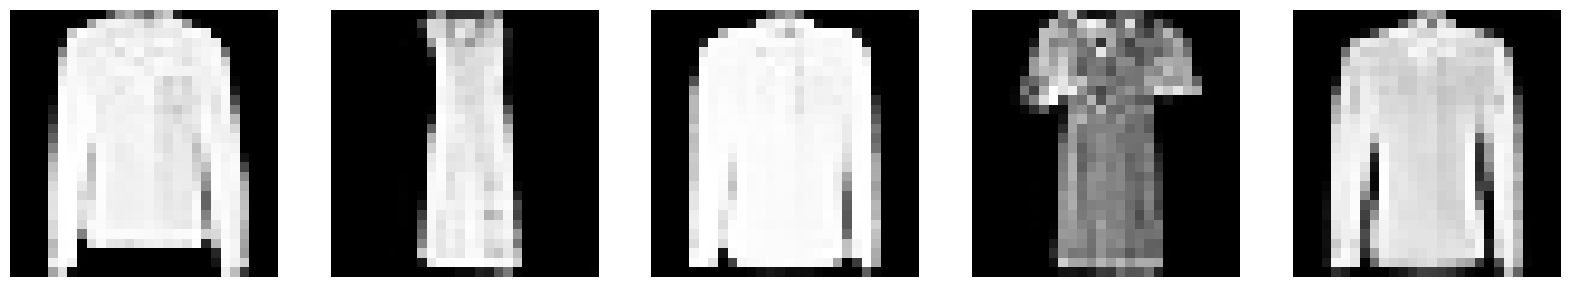

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3762 - g_loss: 0.8012
Epoch 132/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.7997

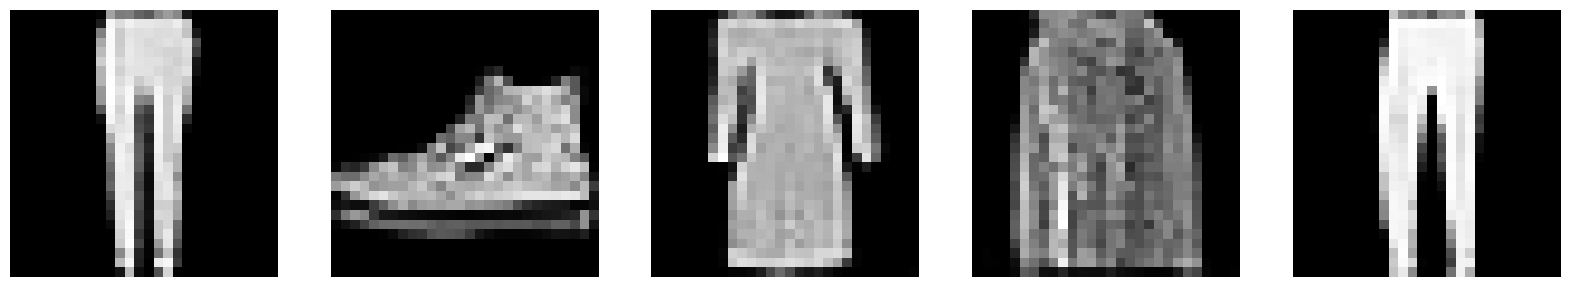

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3763 - g_loss: 0.7997
Epoch 133/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3765 - g_loss: 0.8005

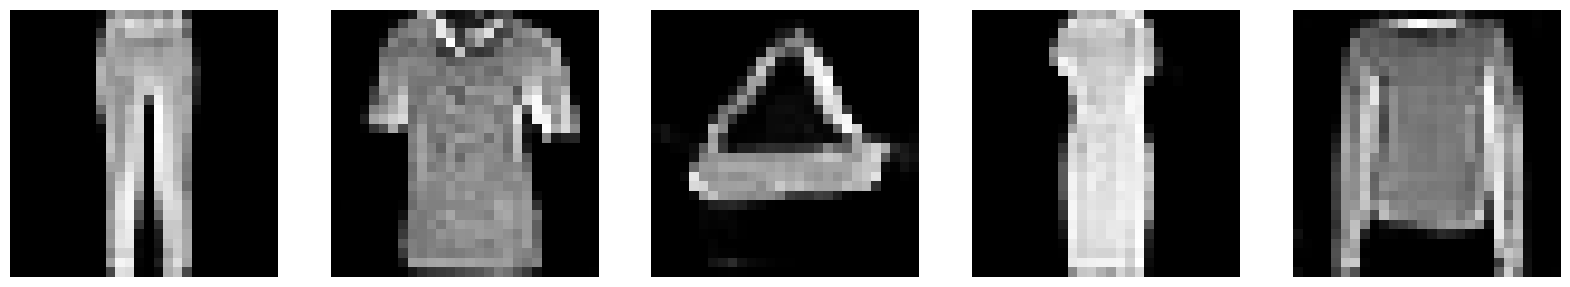

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3765 - g_loss: 0.8006
Epoch 134/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3765 - g_loss: 0.7993

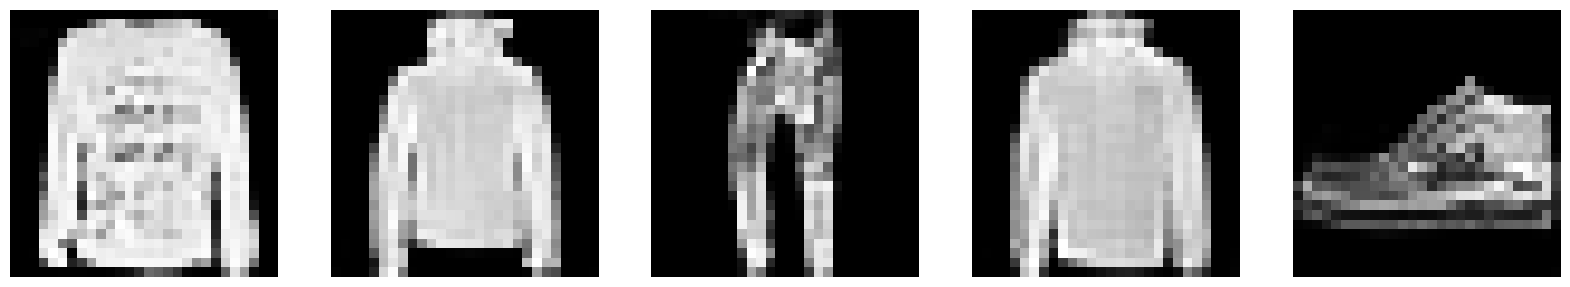

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3765 - g_loss: 0.7992
Epoch 135/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3766 - g_loss: 0.8020

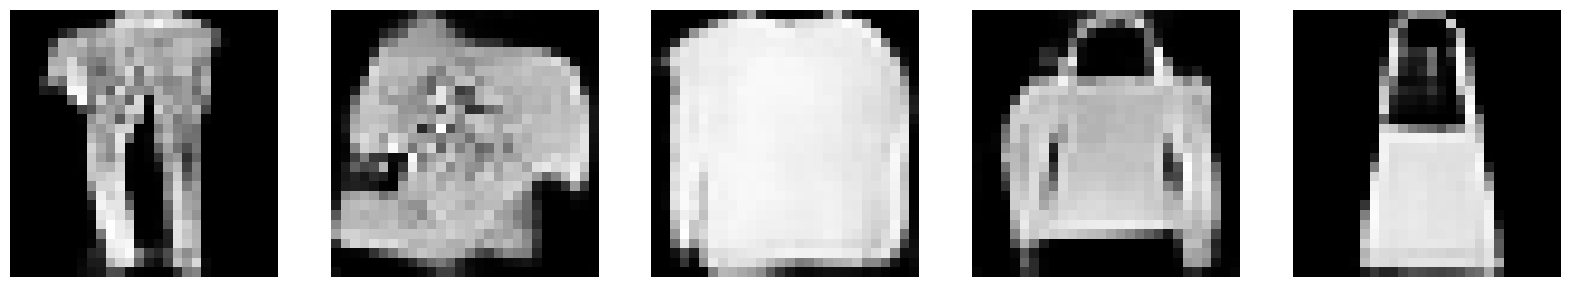

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3766 - g_loss: 0.8021
Epoch 136/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8017

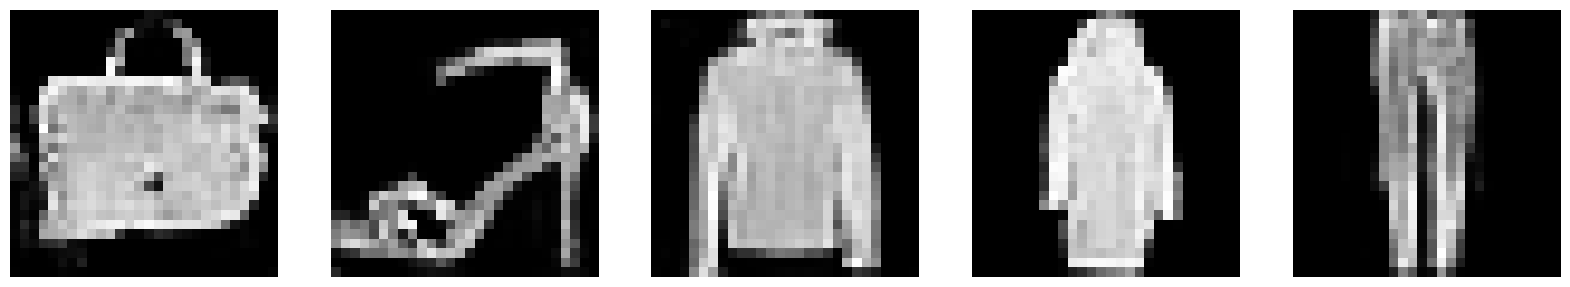

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8017
Epoch 137/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8019

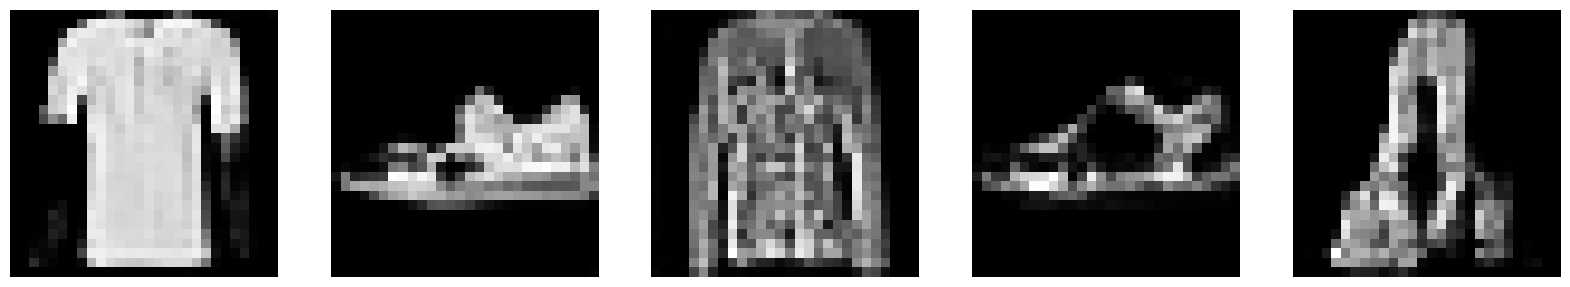

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8019
Epoch 138/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8018

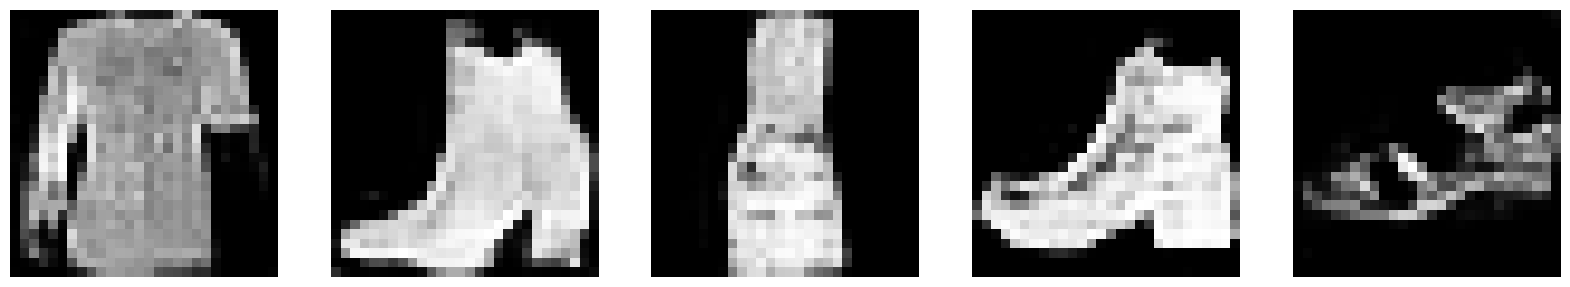

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8018
Epoch 139/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3763 - g_loss: 0.8022

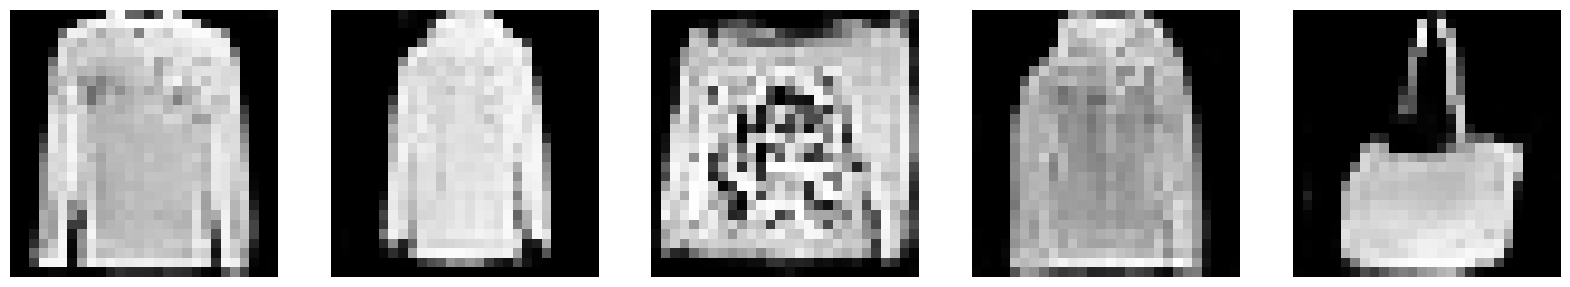

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.8022
Epoch 140/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3765 - g_loss: 0.8016

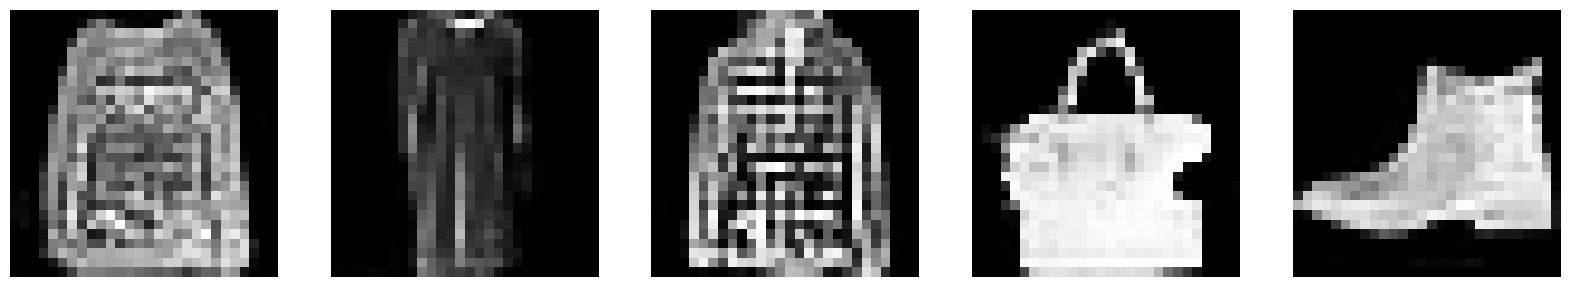

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3765 - g_loss: 0.8016
Epoch 141/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8012

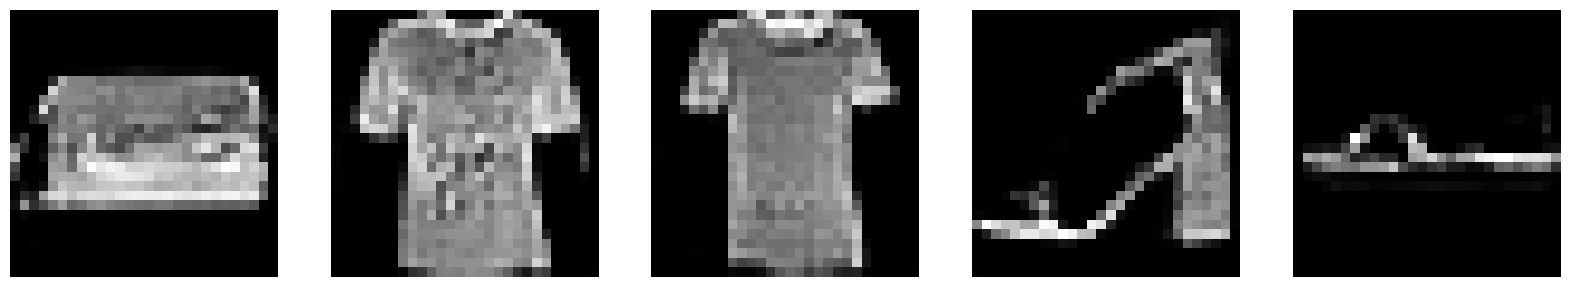

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8012
Epoch 142/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8019

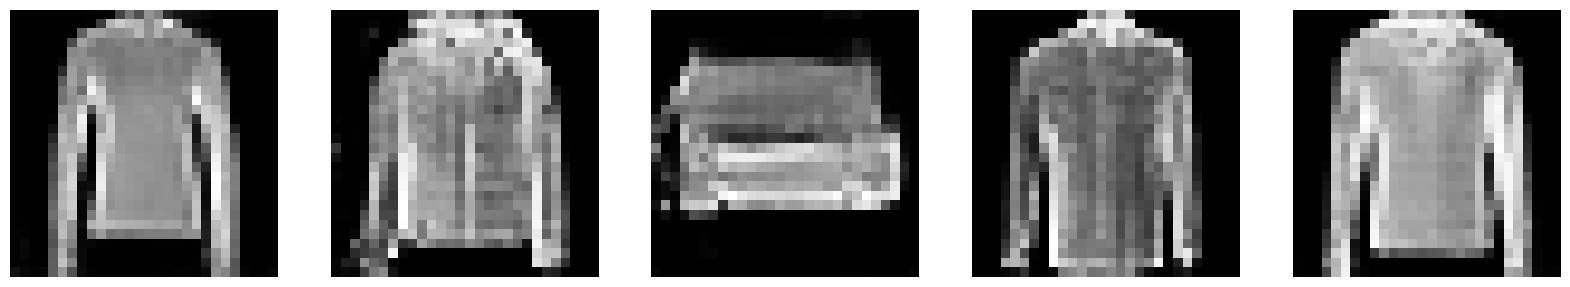

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8019
Epoch 143/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8014

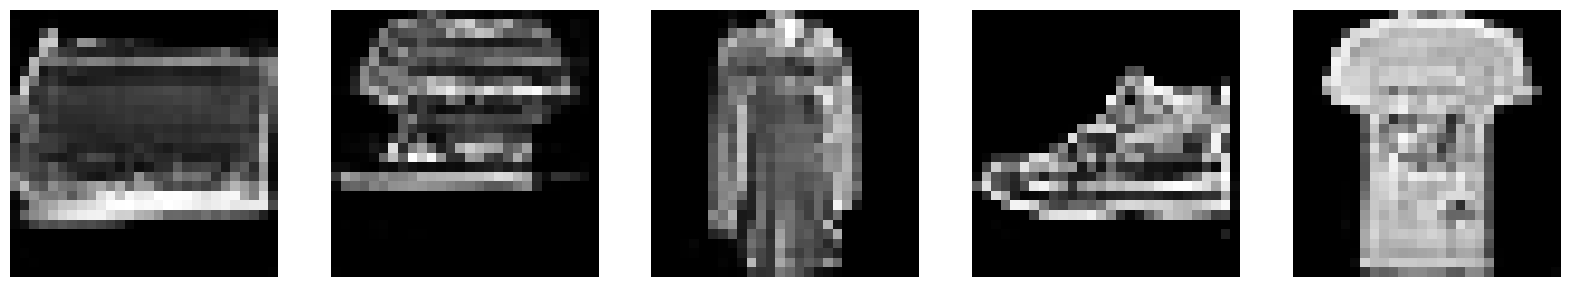

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8014
Epoch 144/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.7999

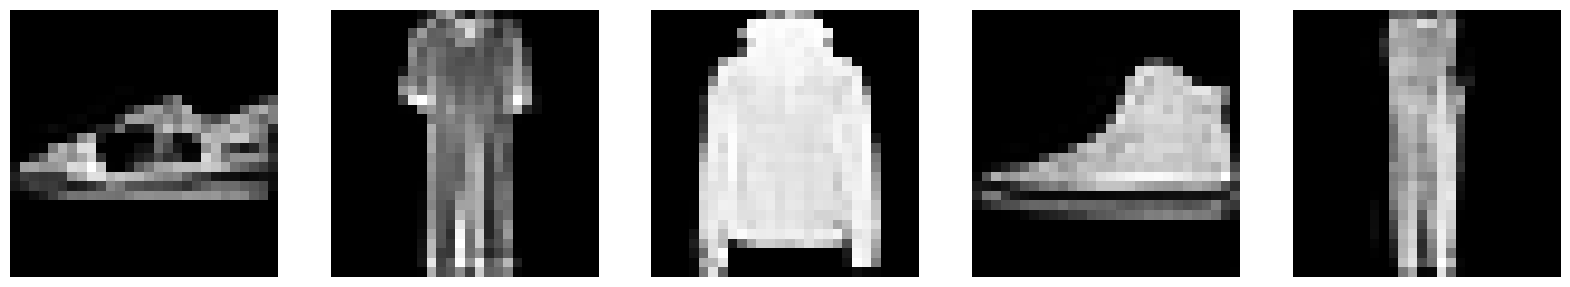

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3765 - g_loss: 0.7999
Epoch 145/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8007

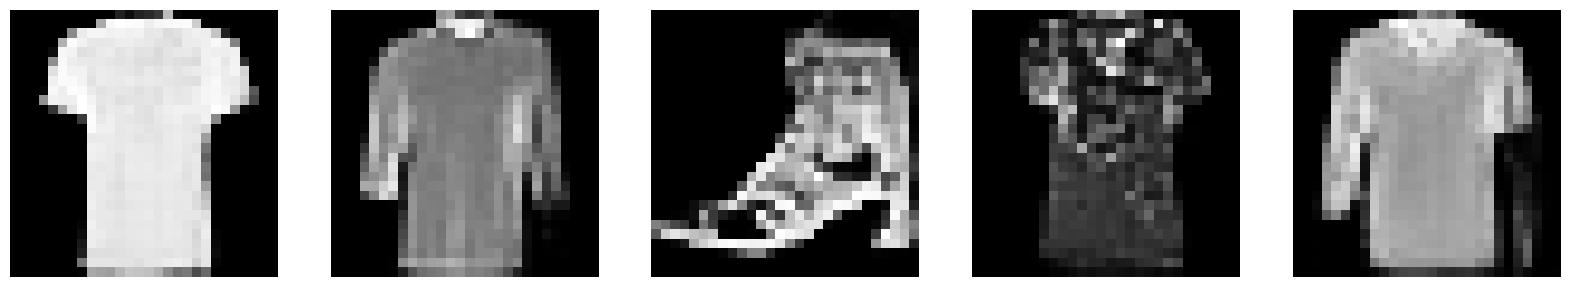

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3762 - g_loss: 0.8007
Epoch 146/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8007

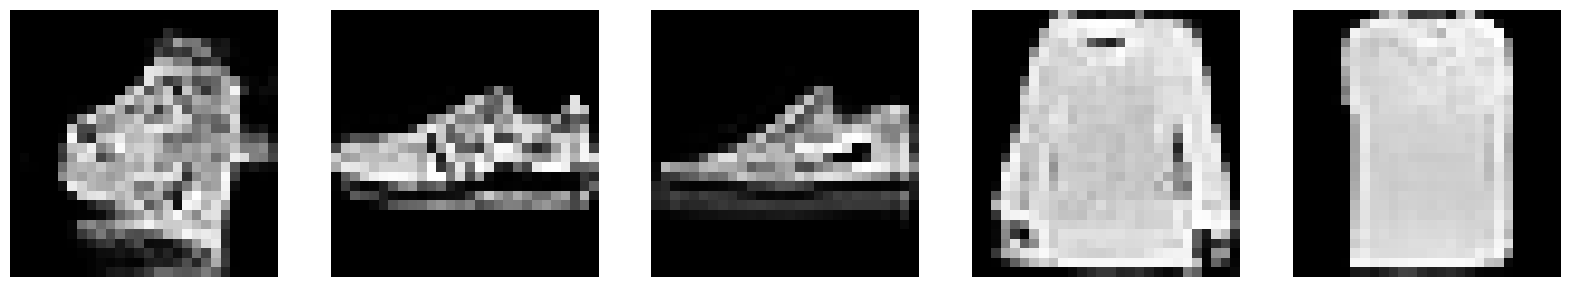

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8007
Epoch 147/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8012

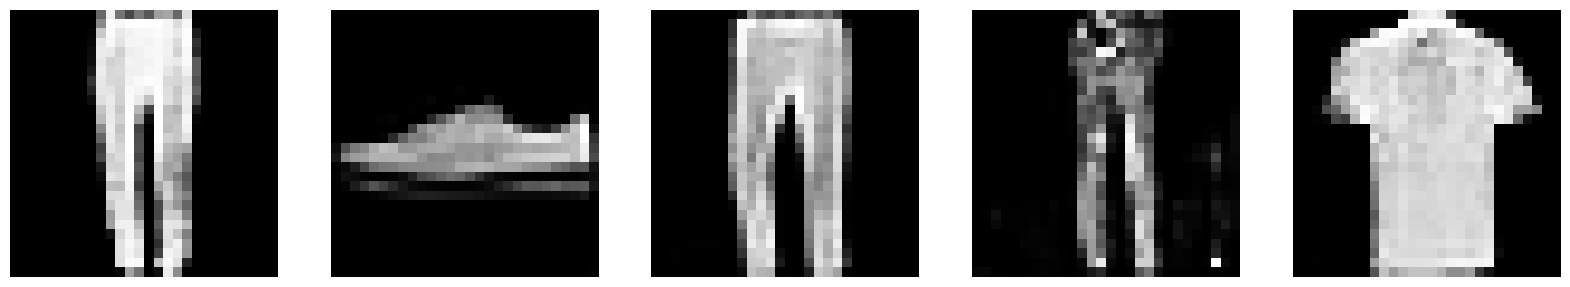

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8012
Epoch 148/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8000

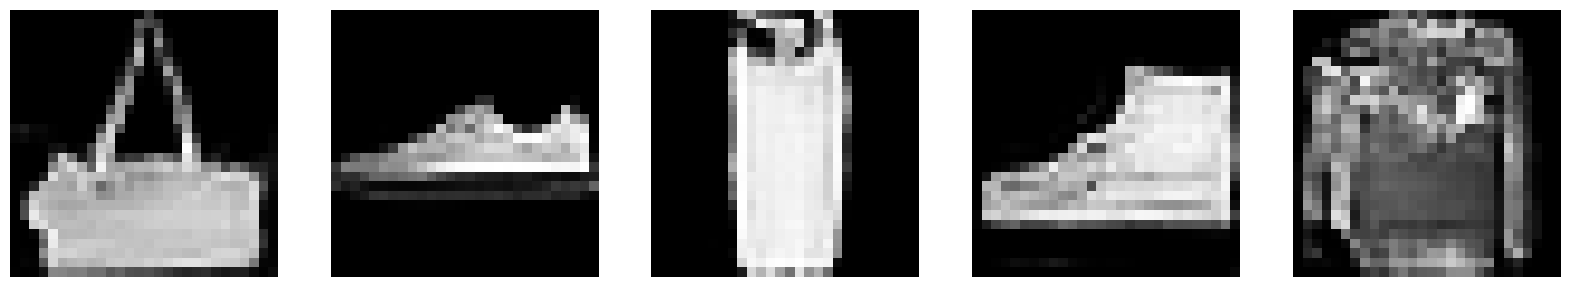

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 404ms/step - d_loss: 1.3762 - g_loss: 0.8000
Epoch 149/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8011

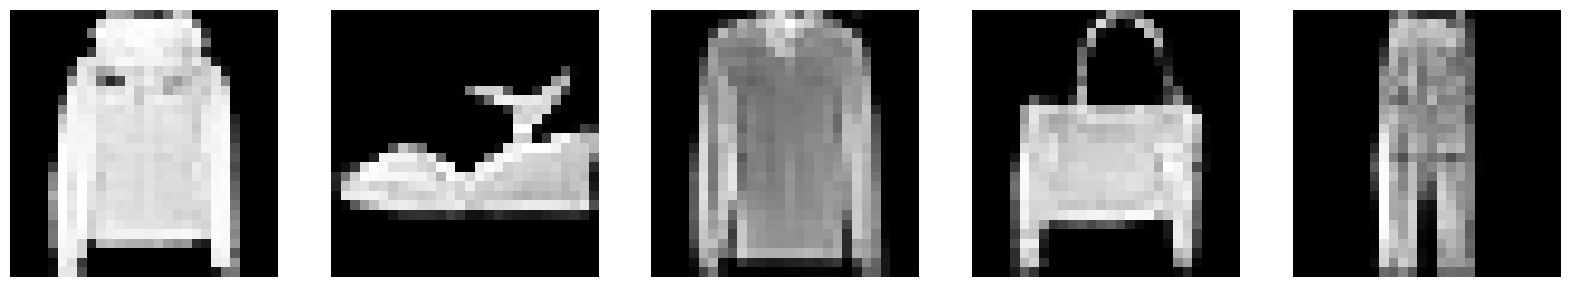

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8011
Epoch 150/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3761 - g_loss: 0.8013

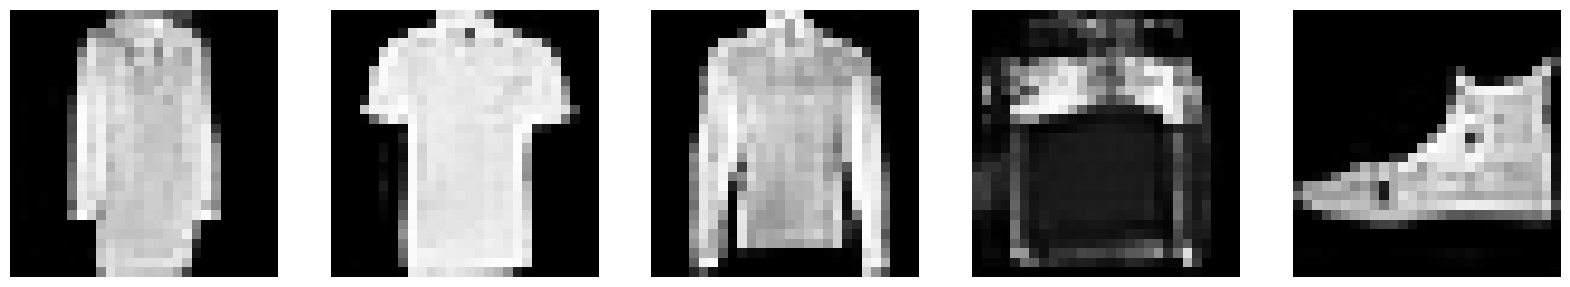

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3761 - g_loss: 0.8013
Epoch 151/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3763 - g_loss: 0.8018

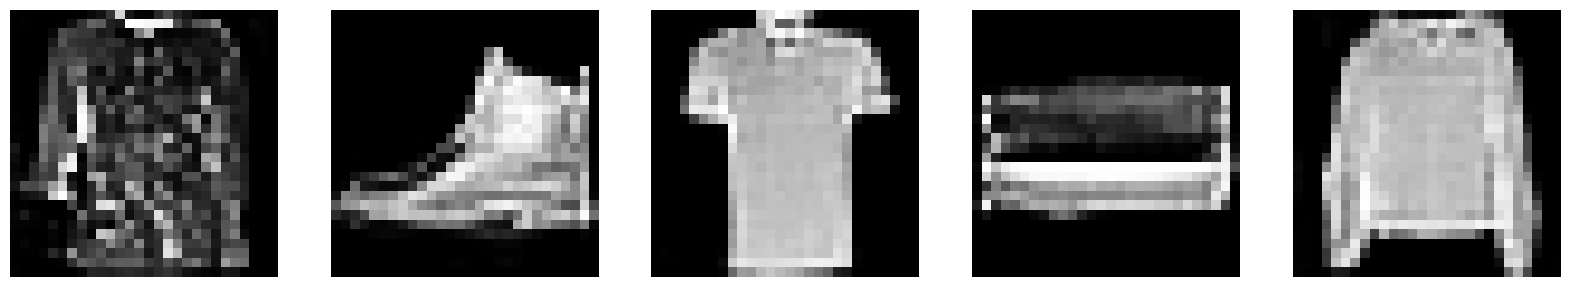

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3763 - g_loss: 0.8018
Epoch 152/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.8019

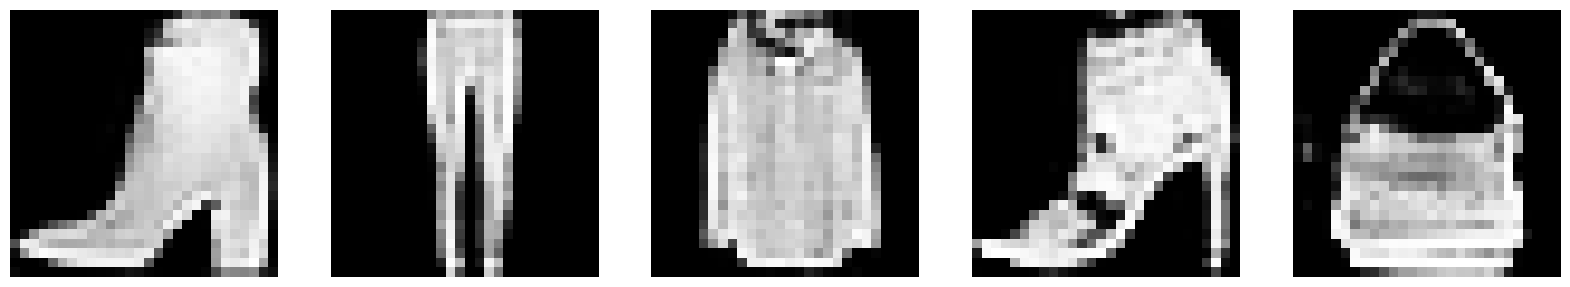

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3761 - g_loss: 0.8019
Epoch 153/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8011

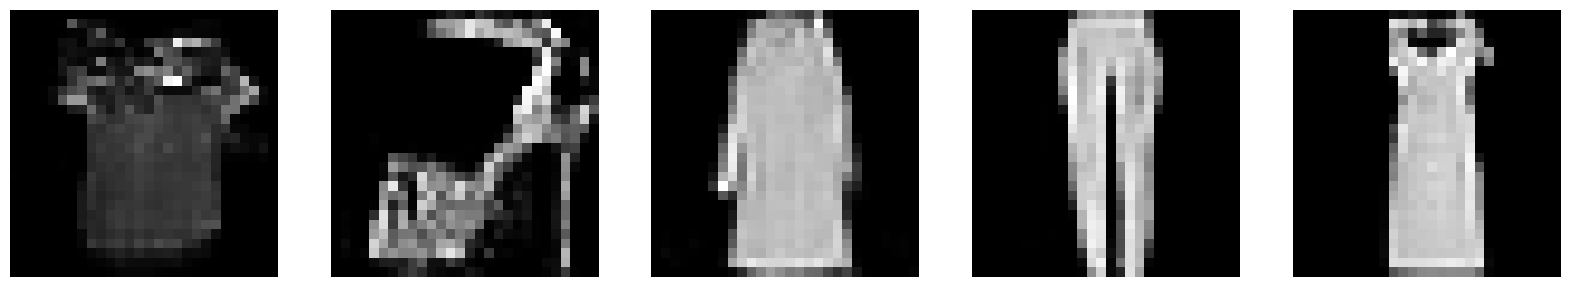

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8011
Epoch 154/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3763 - g_loss: 0.8020

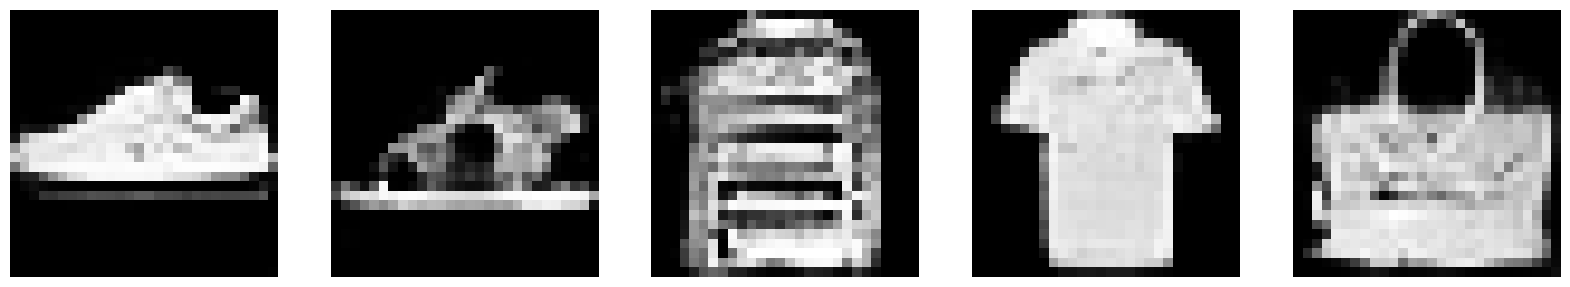

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.8020
Epoch 155/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8017

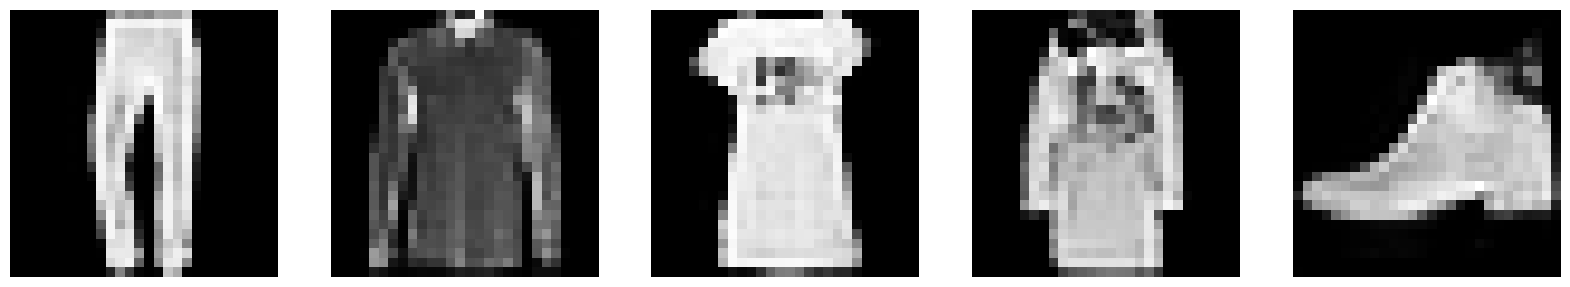

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8017
Epoch 156/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8019

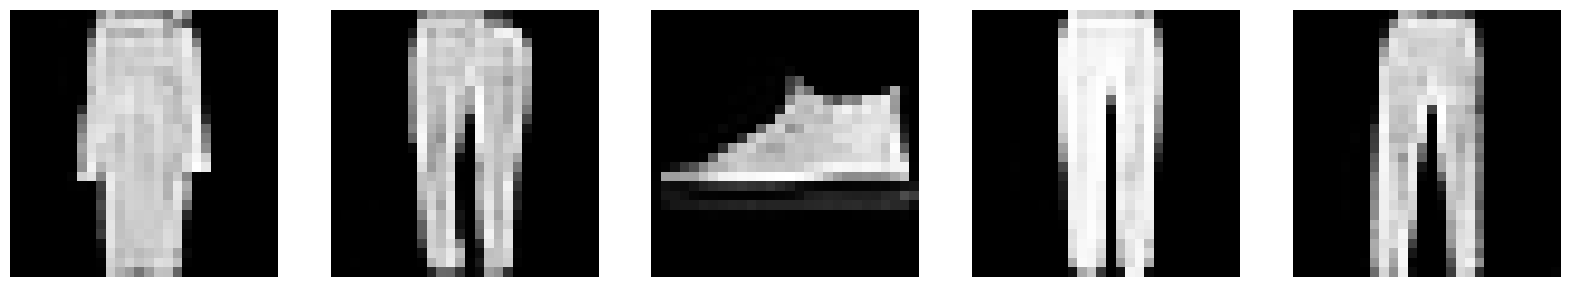

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8019
Epoch 157/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3764 - g_loss: 0.8017

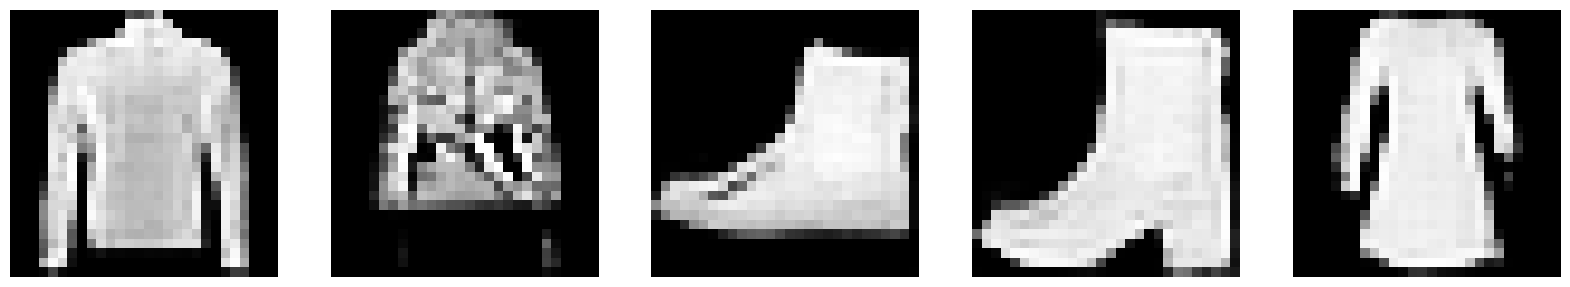

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3764 - g_loss: 0.8017
Epoch 158/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8025

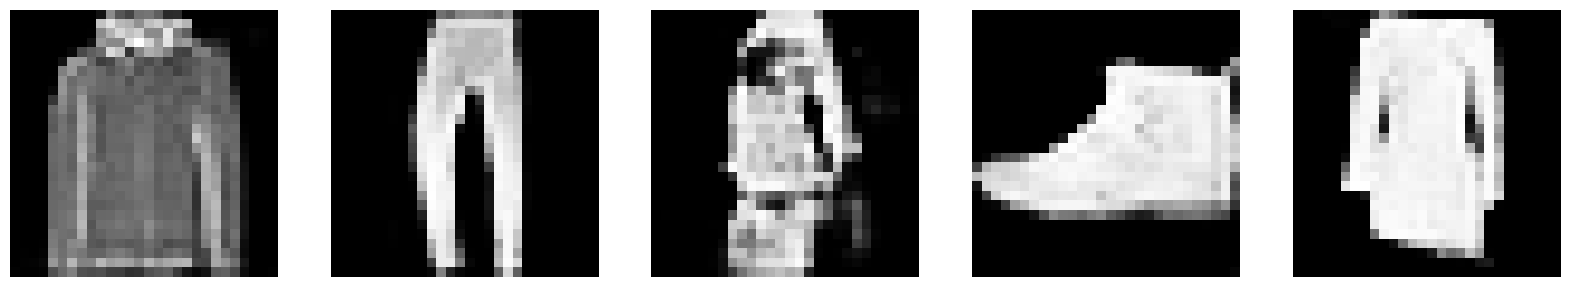

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8025
Epoch 159/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8024

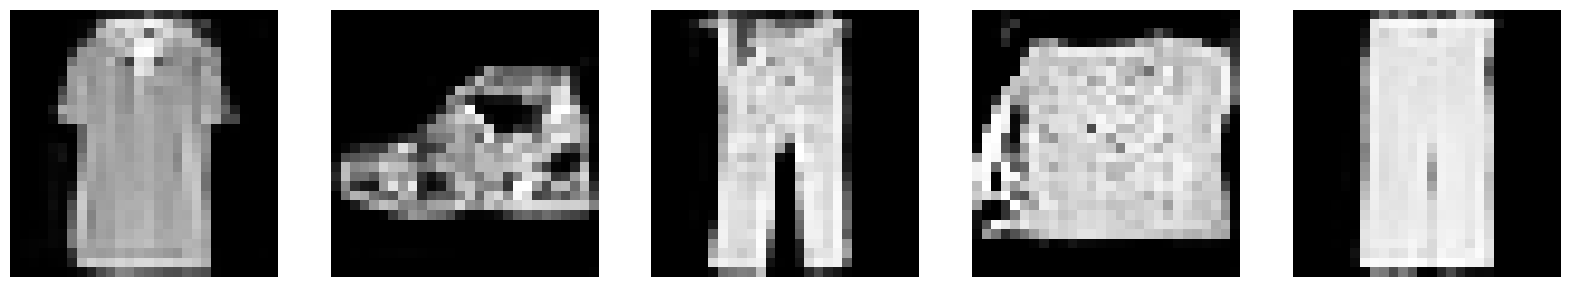

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8024
Epoch 160/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3764 - g_loss: 0.8025

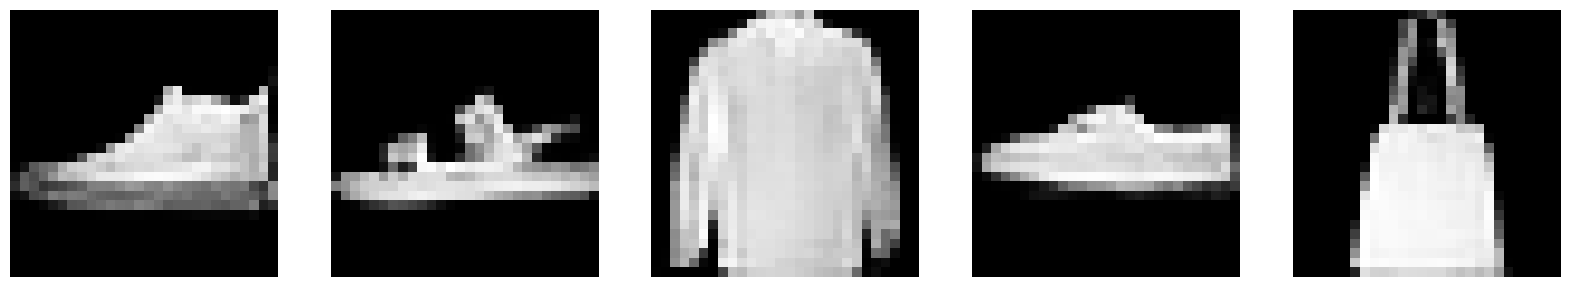

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3764 - g_loss: 0.8025
Epoch 161/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8027

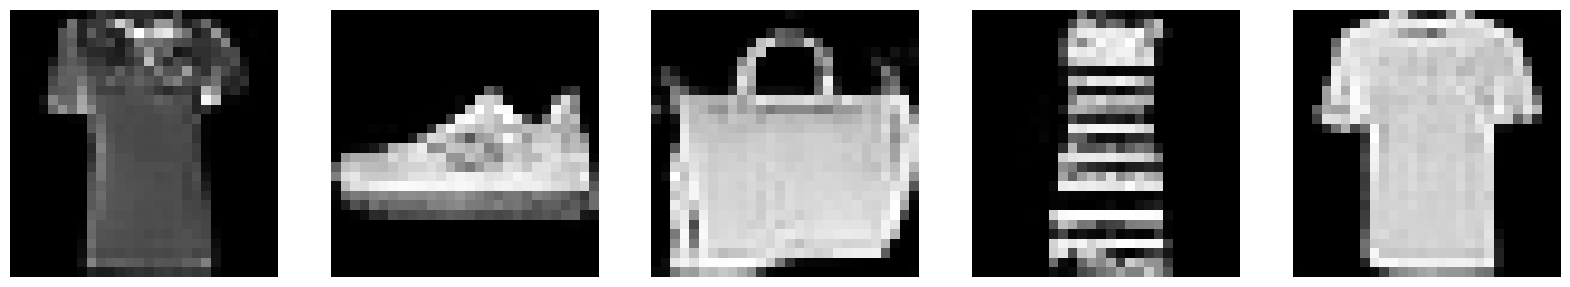

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8026
Epoch 162/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8029

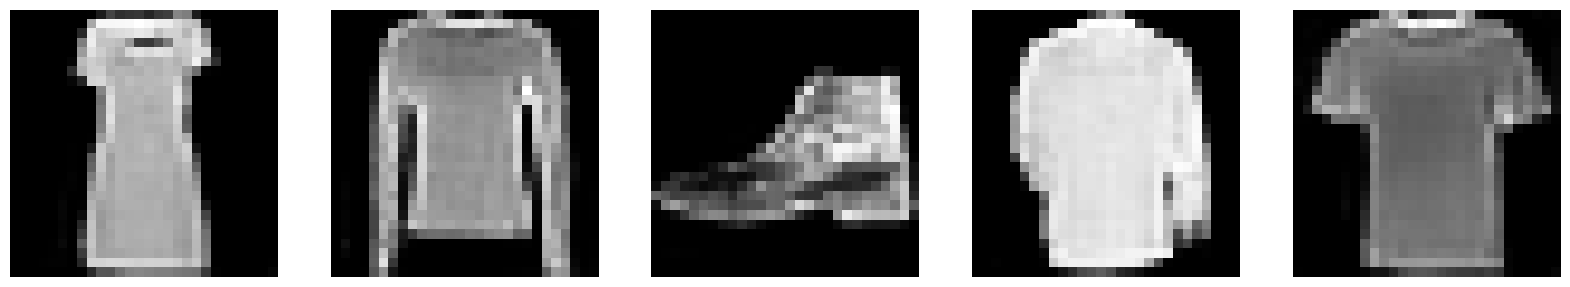

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8029
Epoch 163/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8024

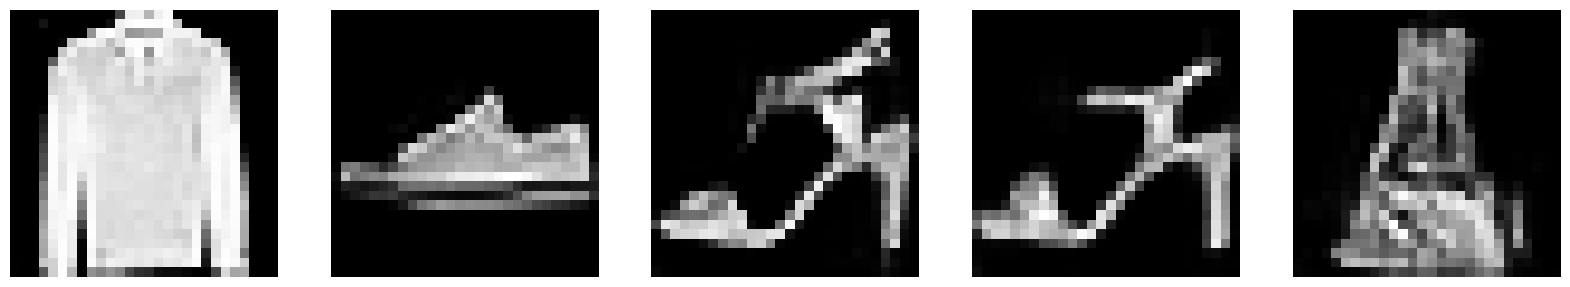

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8024
Epoch 164/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8019

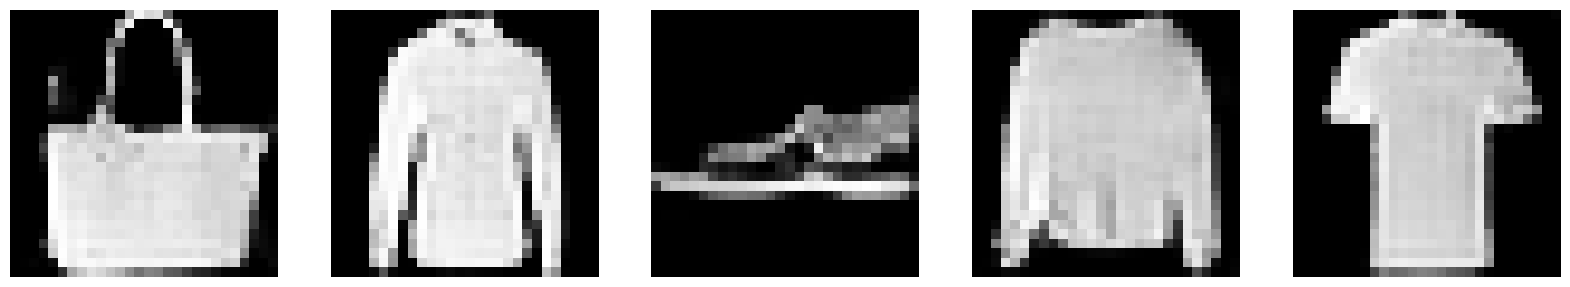

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 403ms/step - d_loss: 1.3762 - g_loss: 0.8019
Epoch 165/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8018

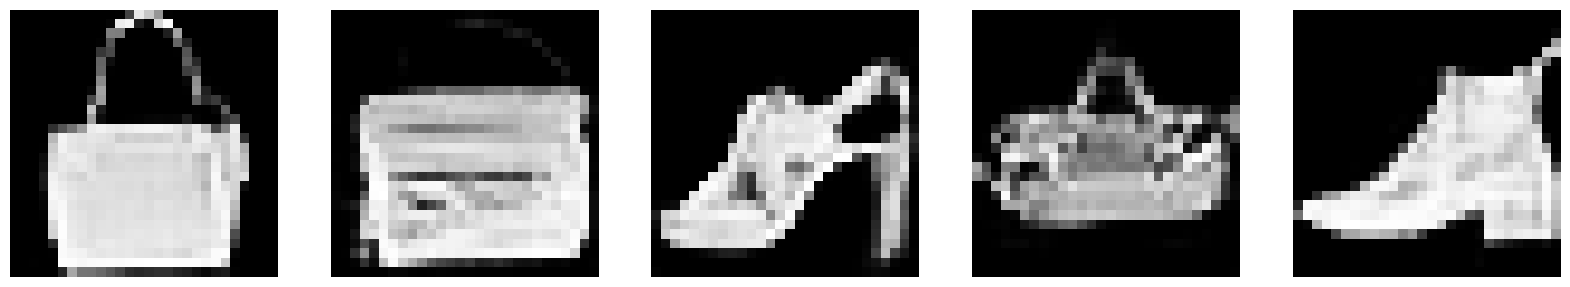

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3762 - g_loss: 0.8017
Epoch 166/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8026

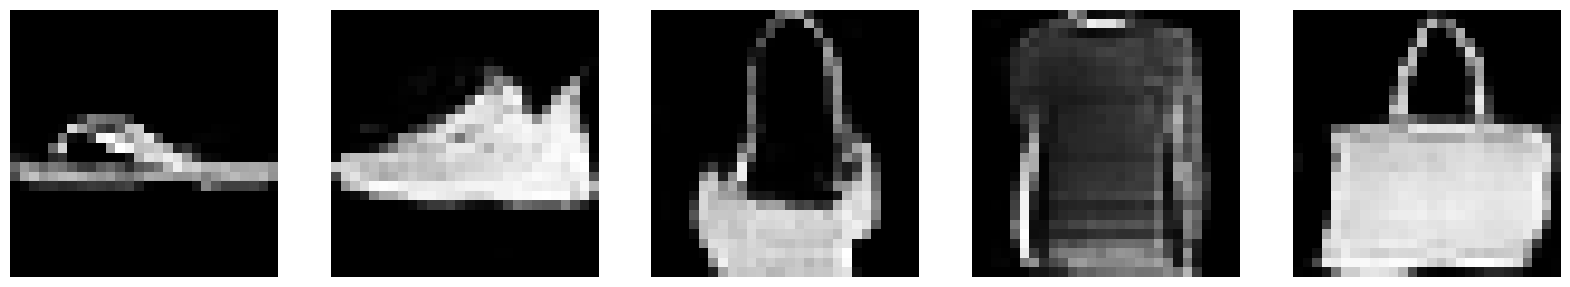

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3762 - g_loss: 0.8026
Epoch 167/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3763 - g_loss: 0.8022

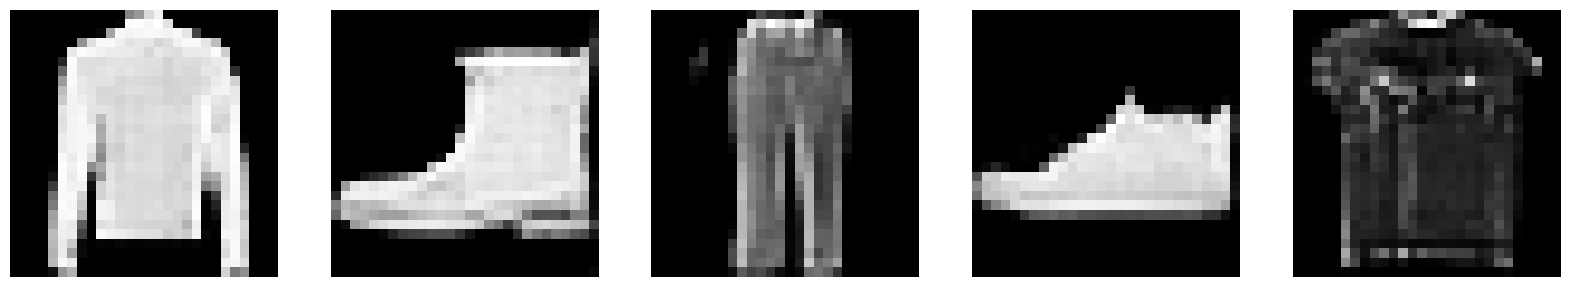

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.8022
Epoch 168/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8025

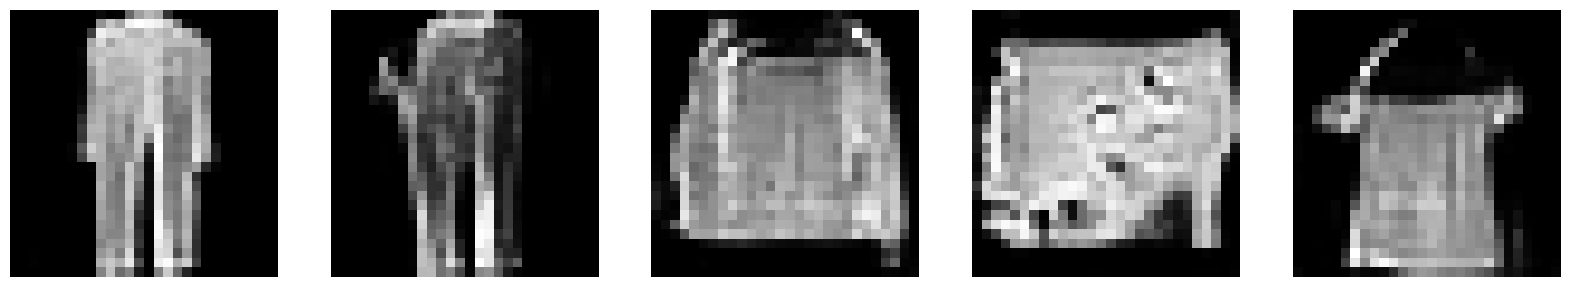

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8025
Epoch 169/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8024

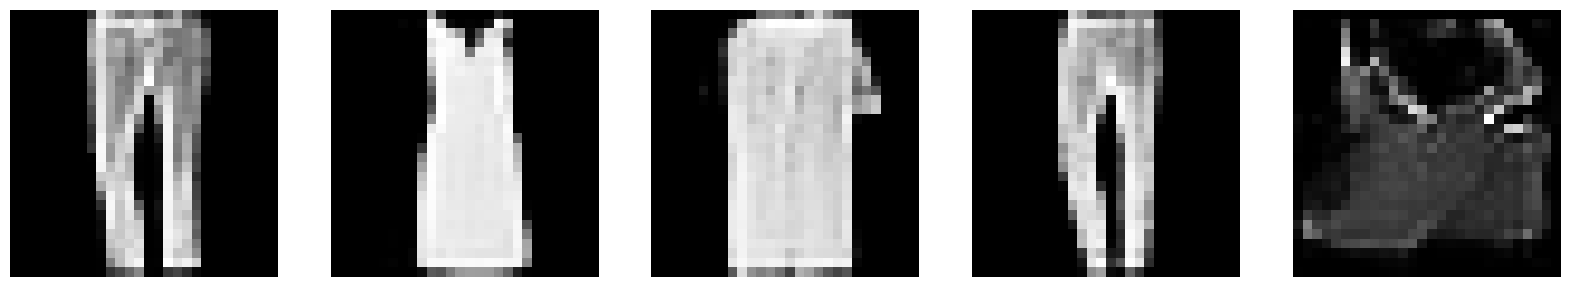

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8024
Epoch 170/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8022

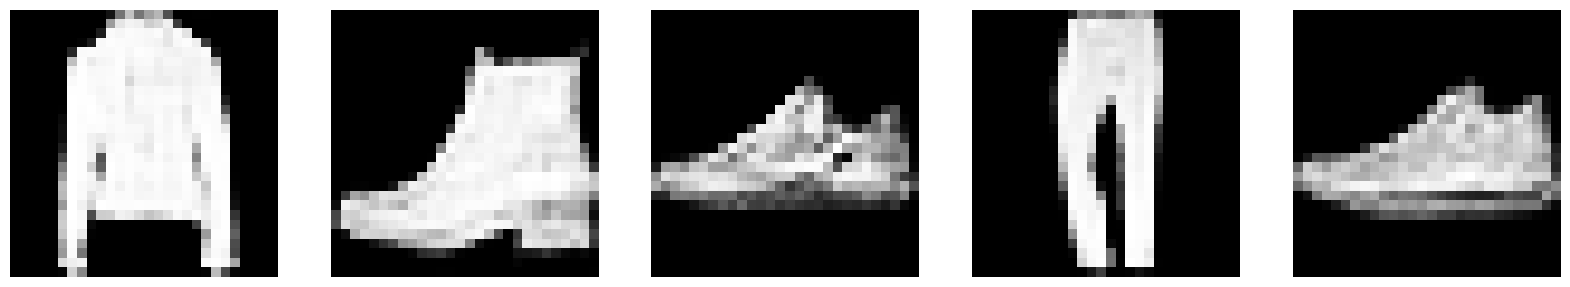

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8022
Epoch 171/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8029

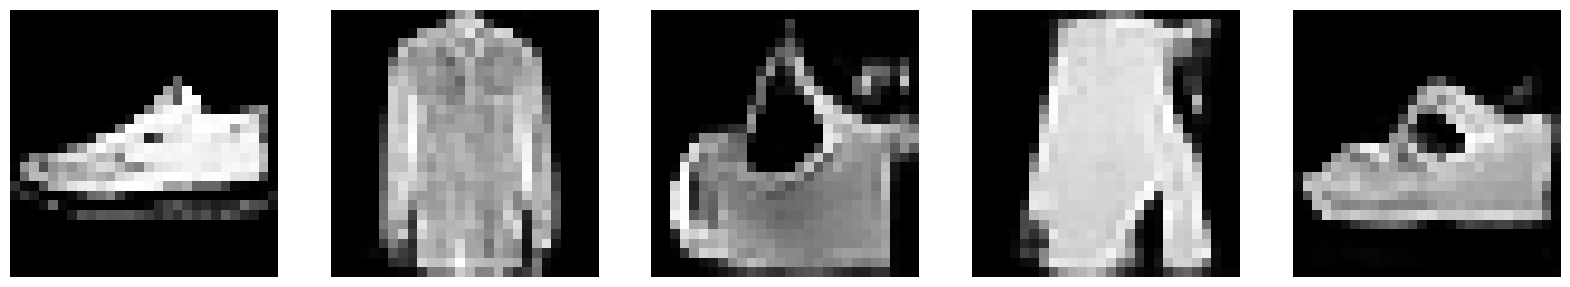

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8029
Epoch 172/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3763 - g_loss: 0.8022

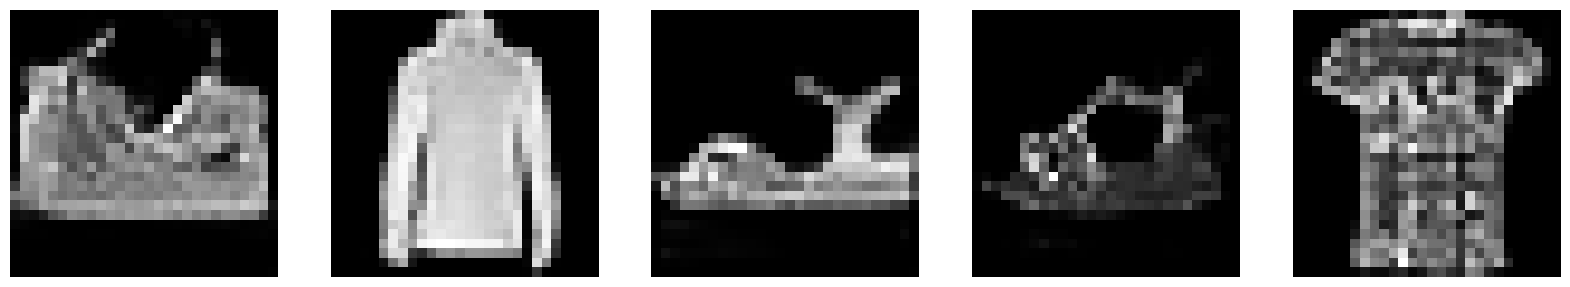

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.8022
Epoch 173/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8017

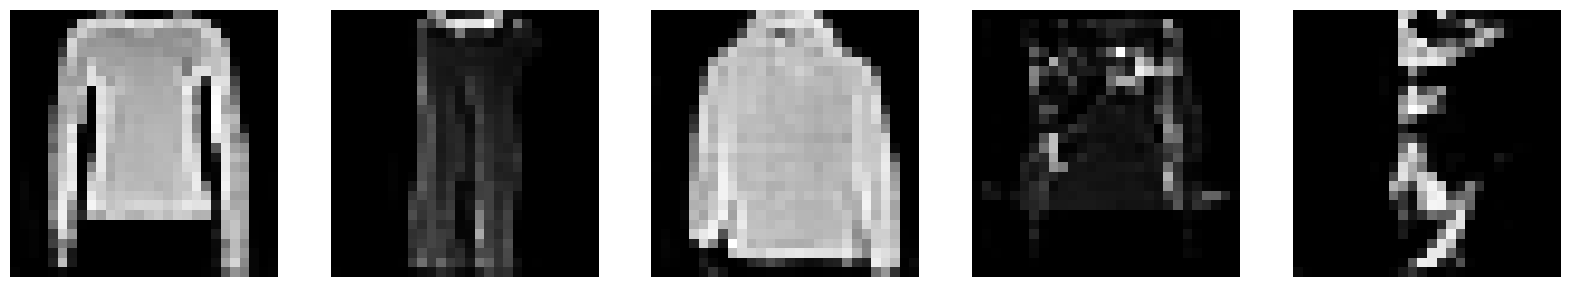

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8017
Epoch 174/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8008

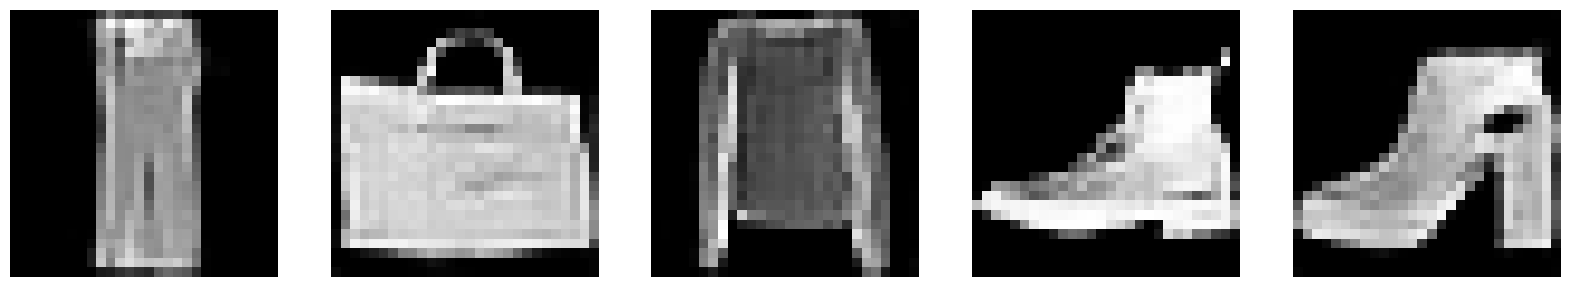

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8008
Epoch 175/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8024

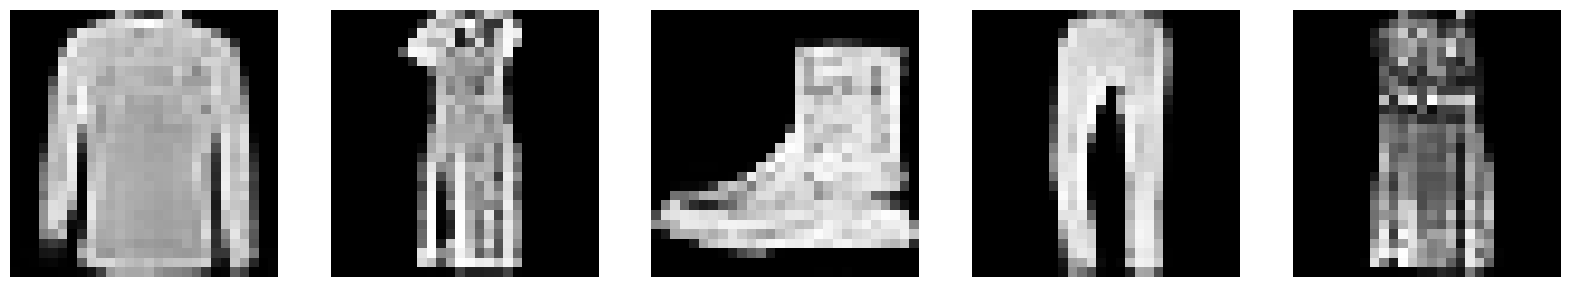

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3762 - g_loss: 0.8024
Epoch 176/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8019

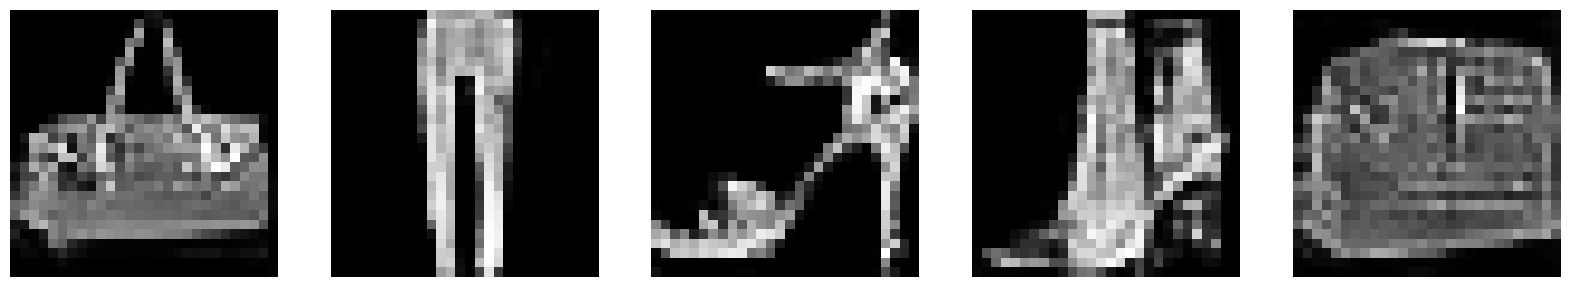

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8019
Epoch 177/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8016

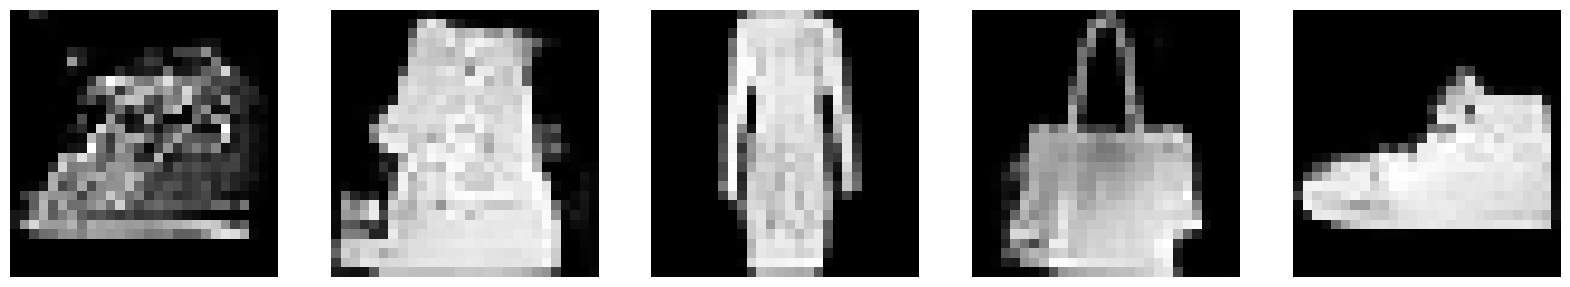

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3762 - g_loss: 0.8016
Epoch 178/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8023

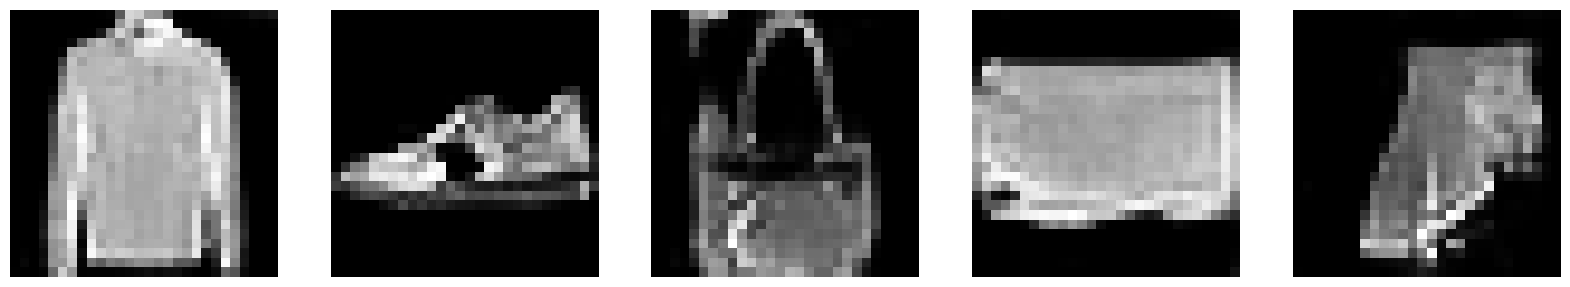

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3763 - g_loss: 0.8023
Epoch 179/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8030

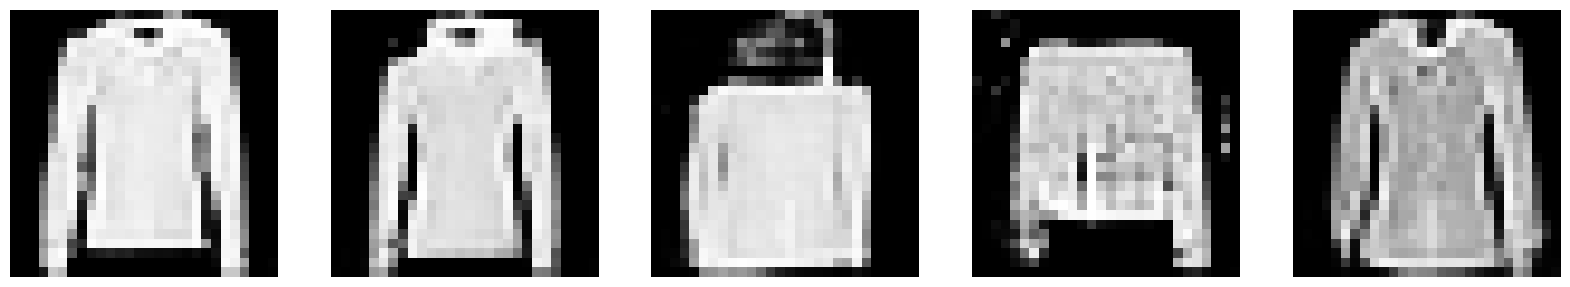

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8030
Epoch 180/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8026

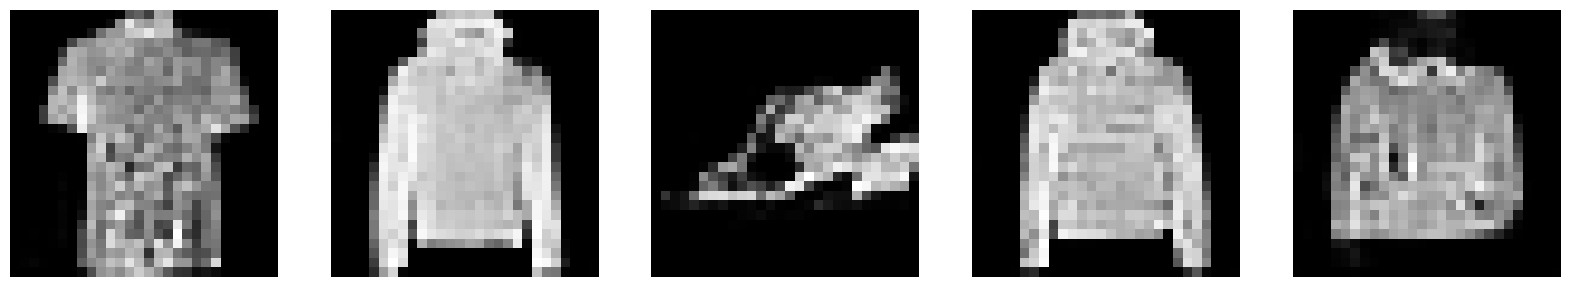

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8026
Epoch 181/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8024

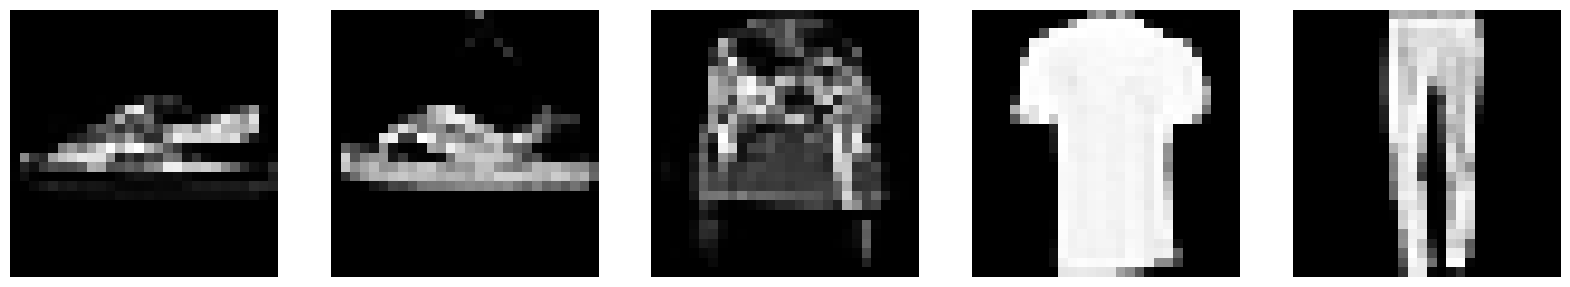

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.8024
Epoch 182/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8025

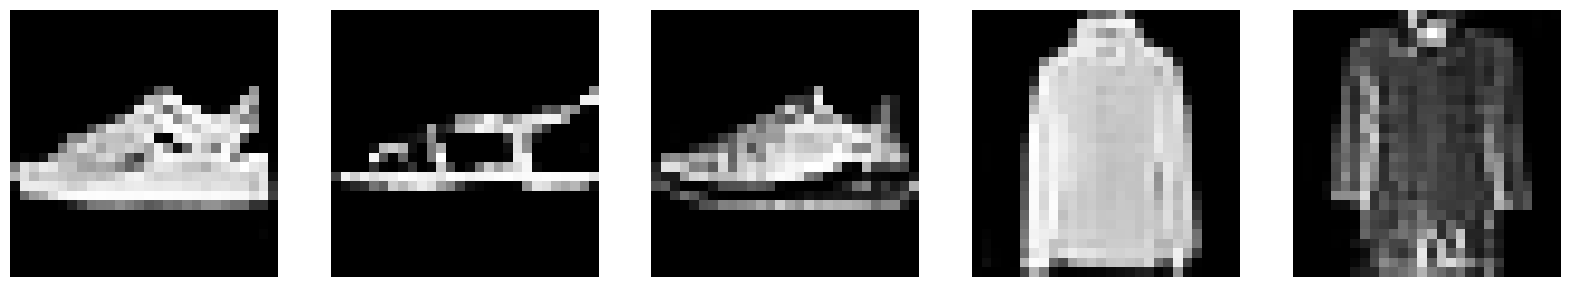

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8025
Epoch 183/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3764 - g_loss: 0.8030

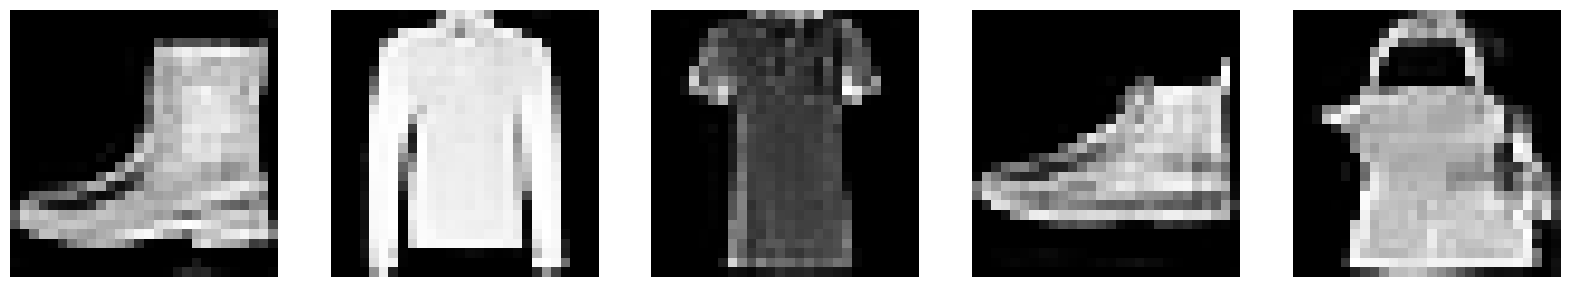

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8029
Epoch 184/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8027

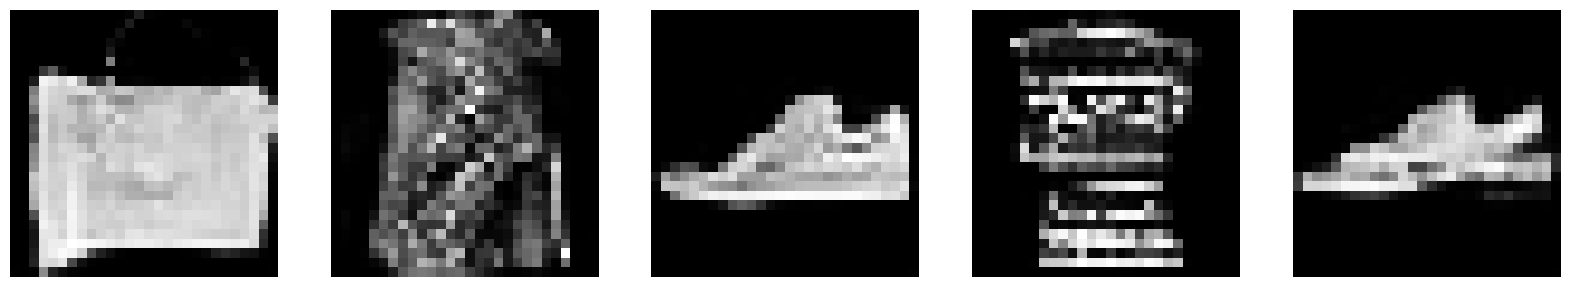

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8027
Epoch 185/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8032

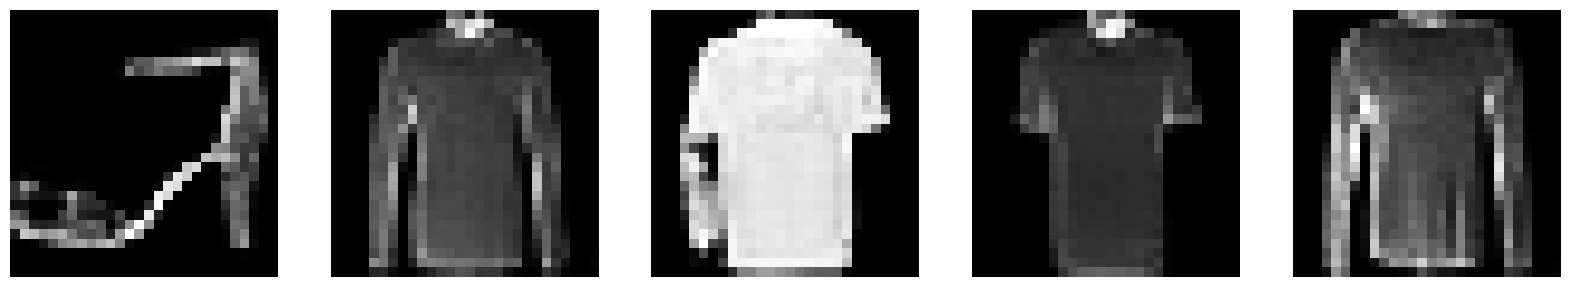

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8032
Epoch 186/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8037

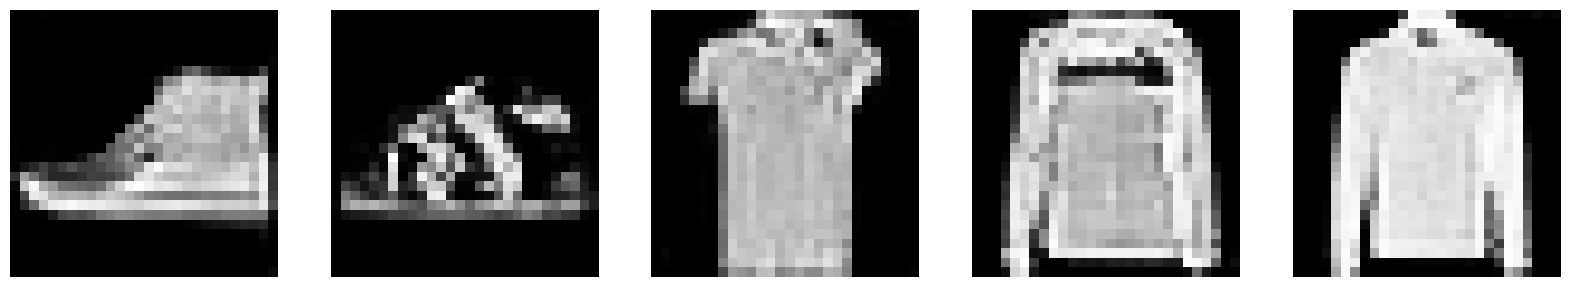

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8037
Epoch 187/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8027

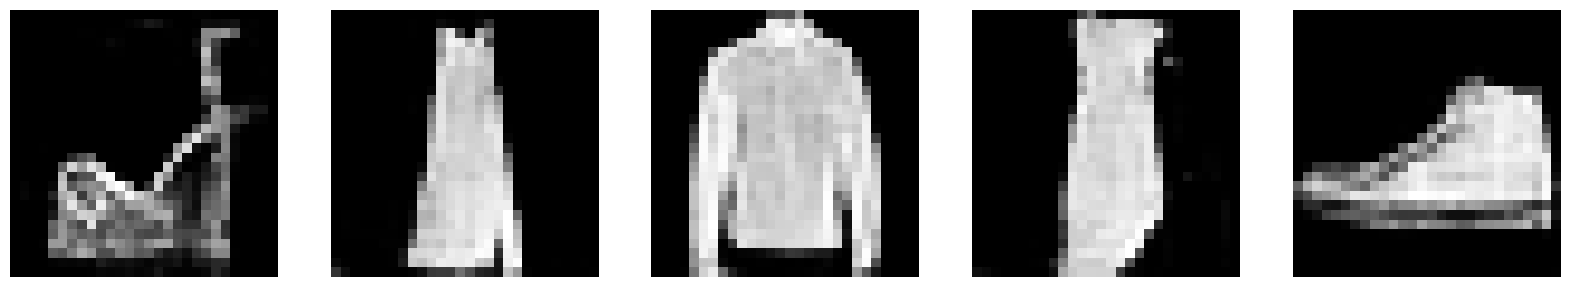

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3762 - g_loss: 0.8027
Epoch 188/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.8027

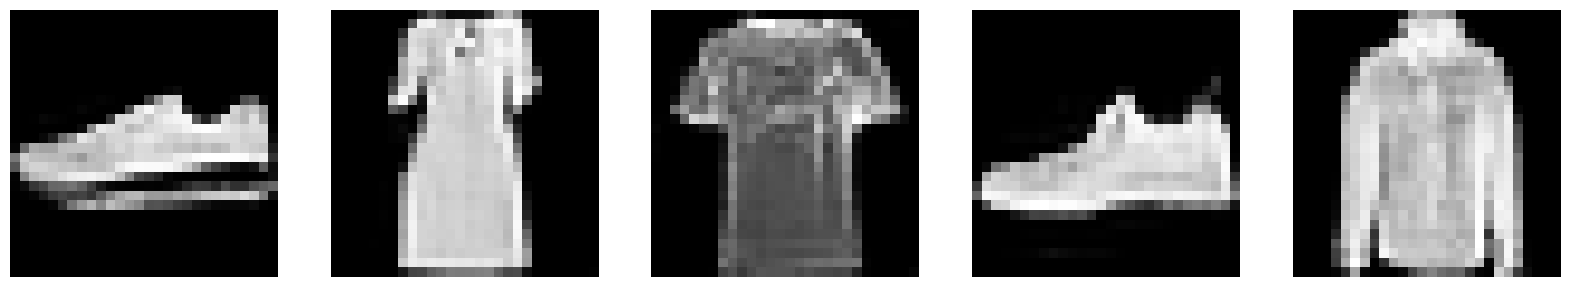

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3761 - g_loss: 0.8027
Epoch 189/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3763 - g_loss: 0.8027

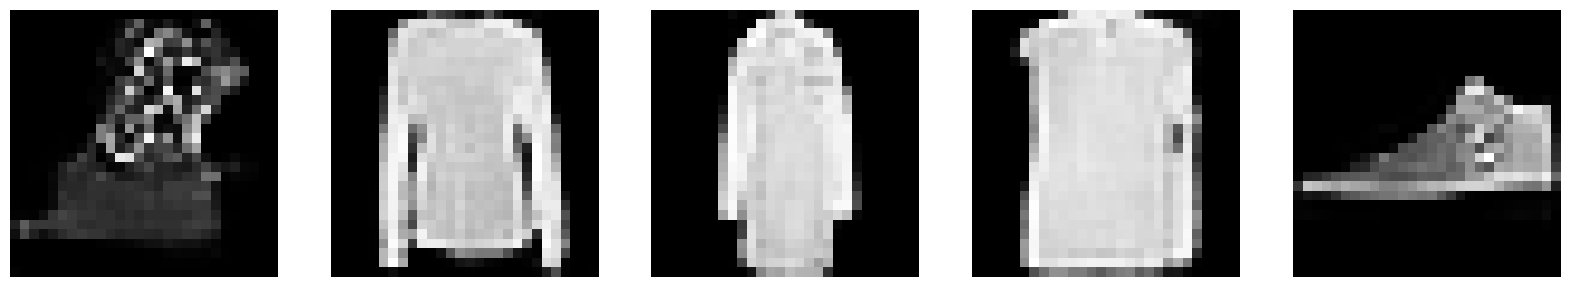

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3763 - g_loss: 0.8027
Epoch 190/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3763 - g_loss: 0.8027

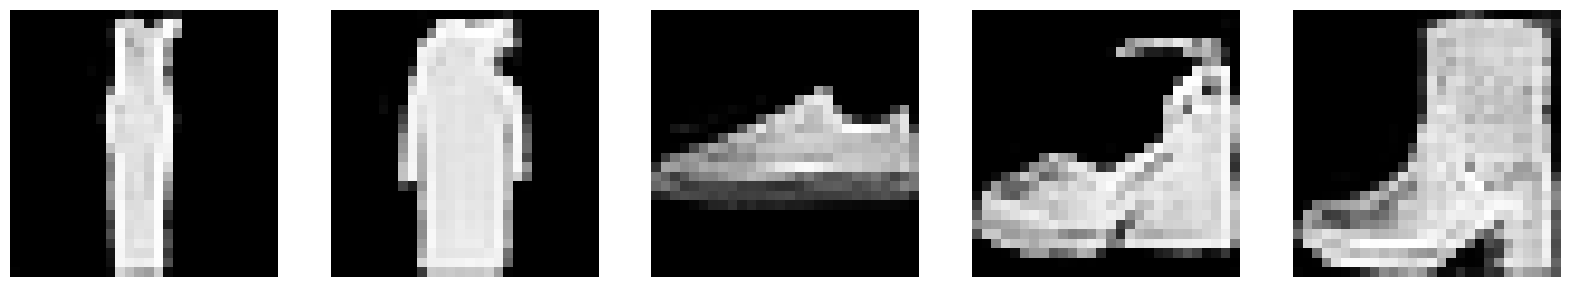

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.8027
Epoch 191/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8022

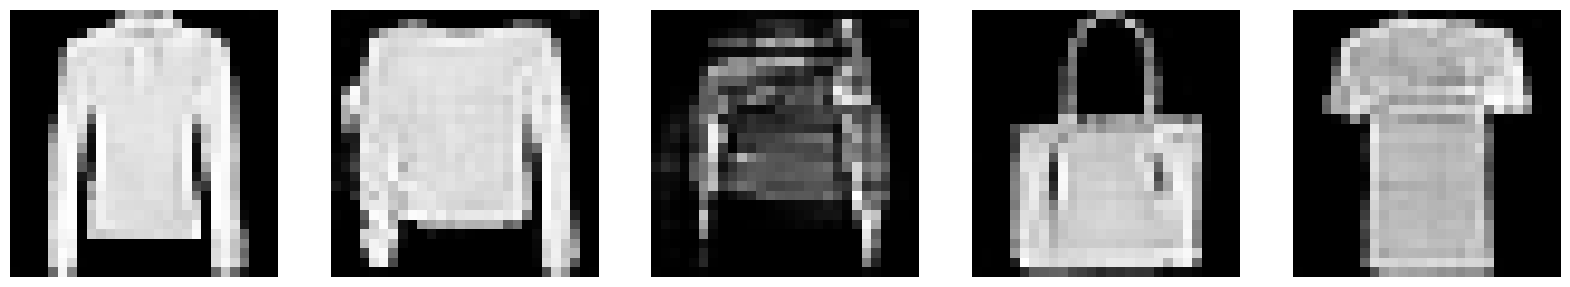

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.8022
Epoch 192/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8026

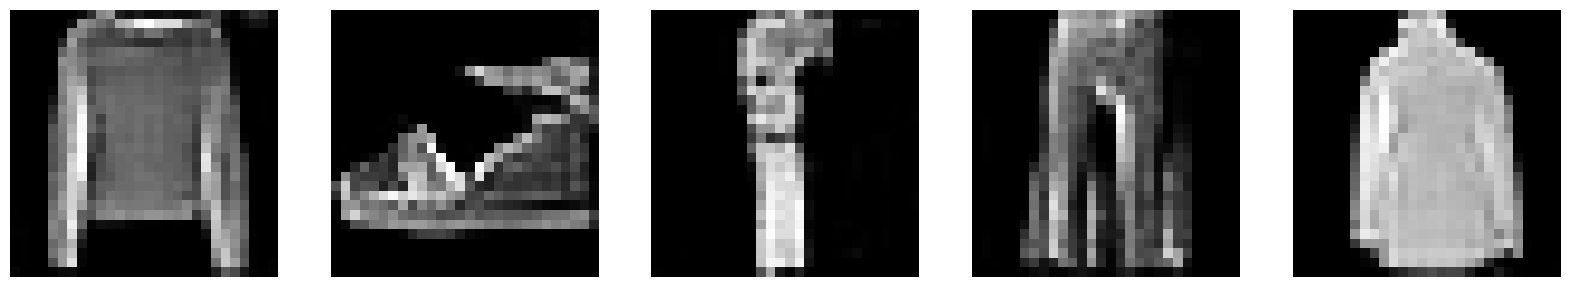

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8026
Epoch 193/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3762 - g_loss: 0.8031

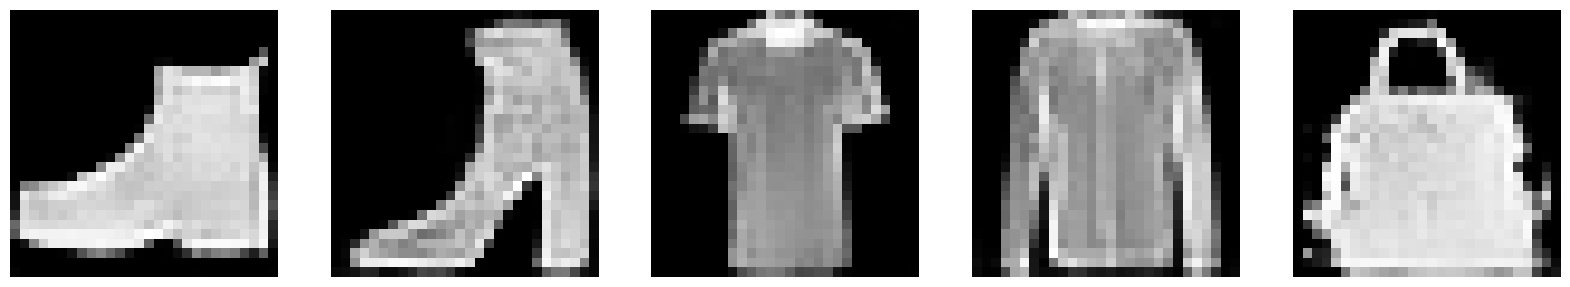

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3762 - g_loss: 0.8031
Epoch 194/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8030

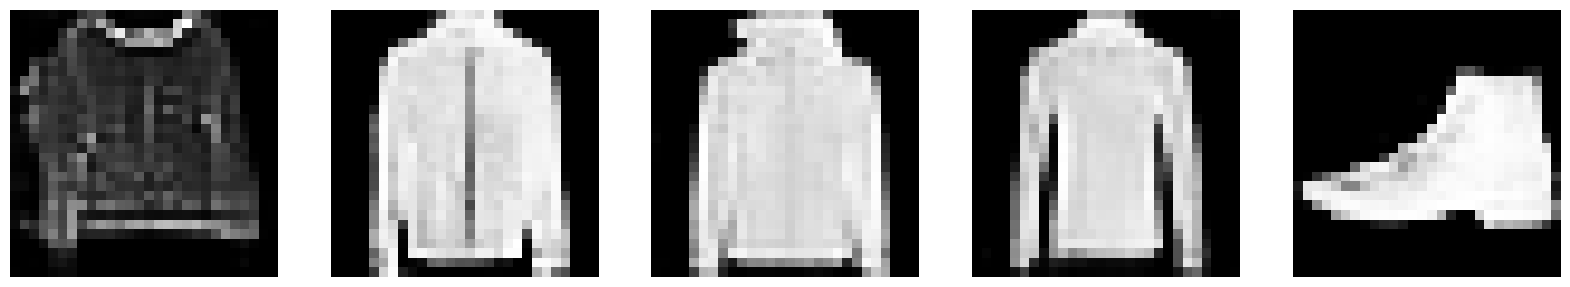

235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 402ms/step - d_loss: 1.3764 - g_loss: 0.8030
Epoch 195/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3763 - g_loss: 0.8020

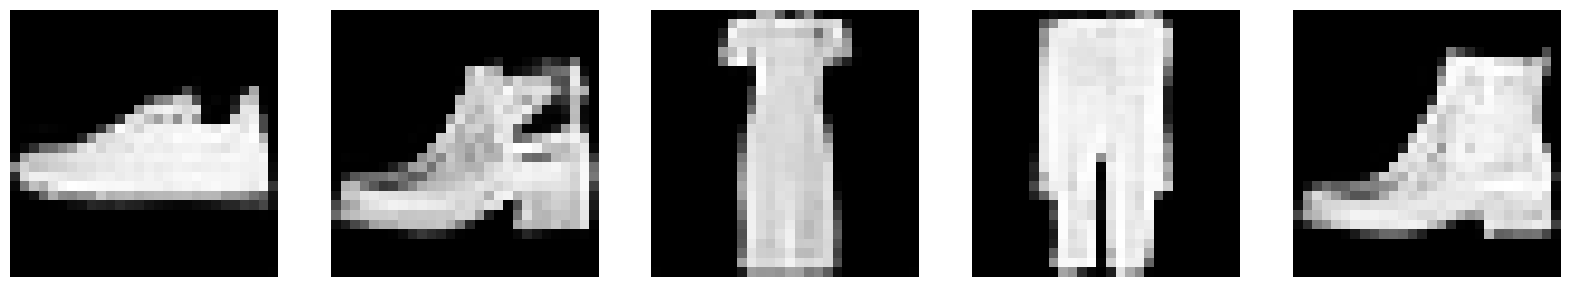

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3763 - g_loss: 0.8020
Epoch 196/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8015

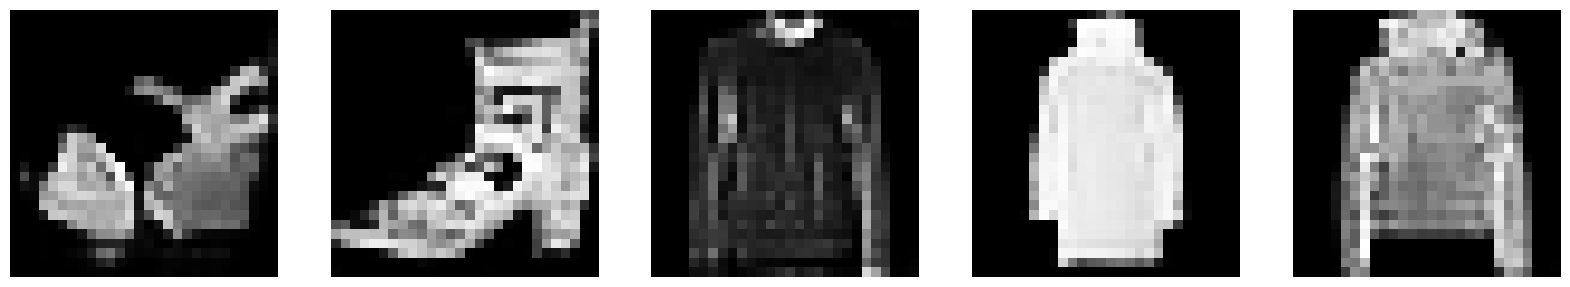

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3762 - g_loss: 0.8015
Epoch 197/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8027

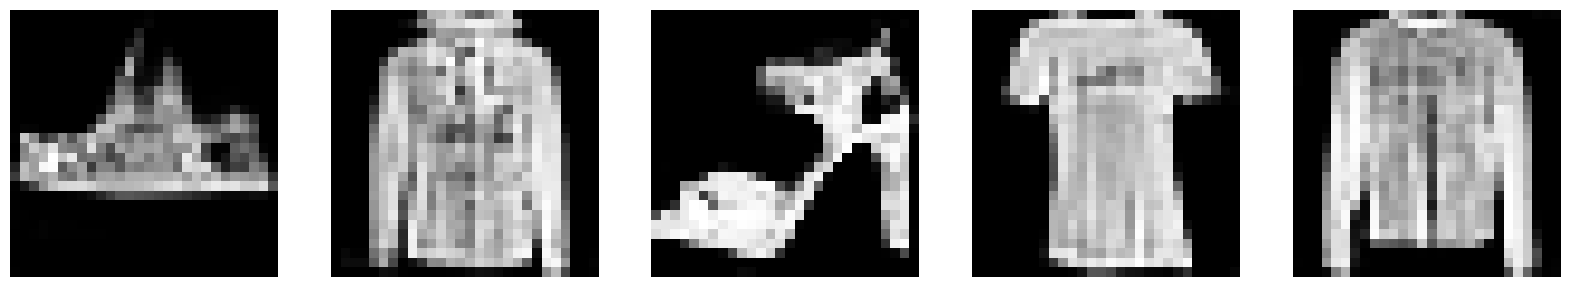

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8027
Epoch 198/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3760 - g_loss: 0.8031

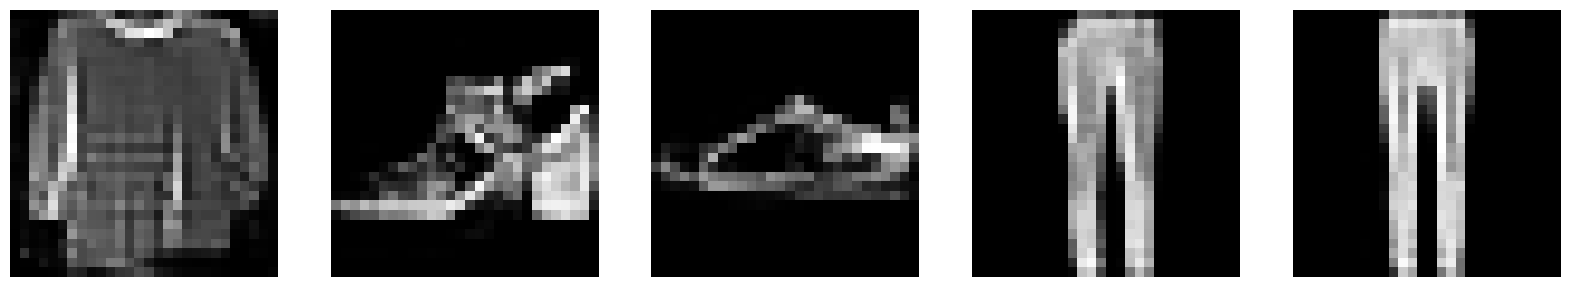

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3760 - g_loss: 0.8031
Epoch 199/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3762 - g_loss: 0.8030

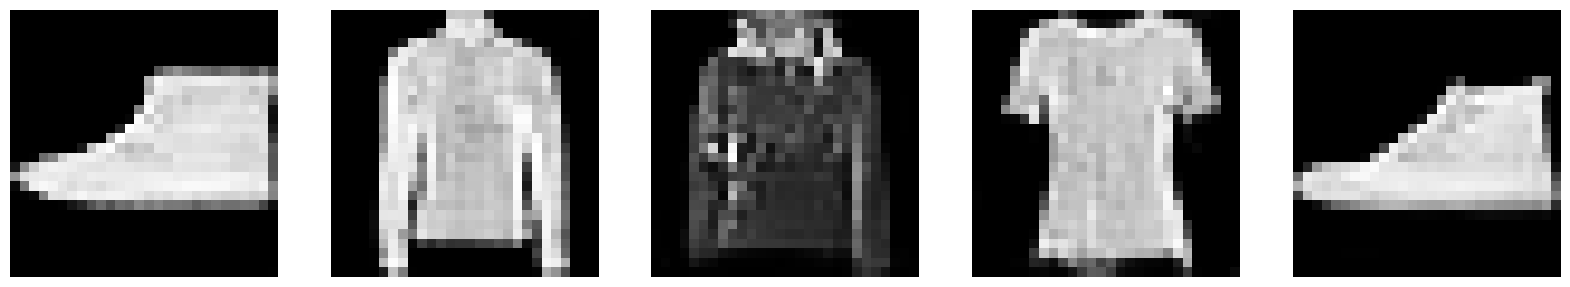

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3762 - g_loss: 0.8030
Epoch 200/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - d_loss: 1.3763 - g_loss: 0.8029

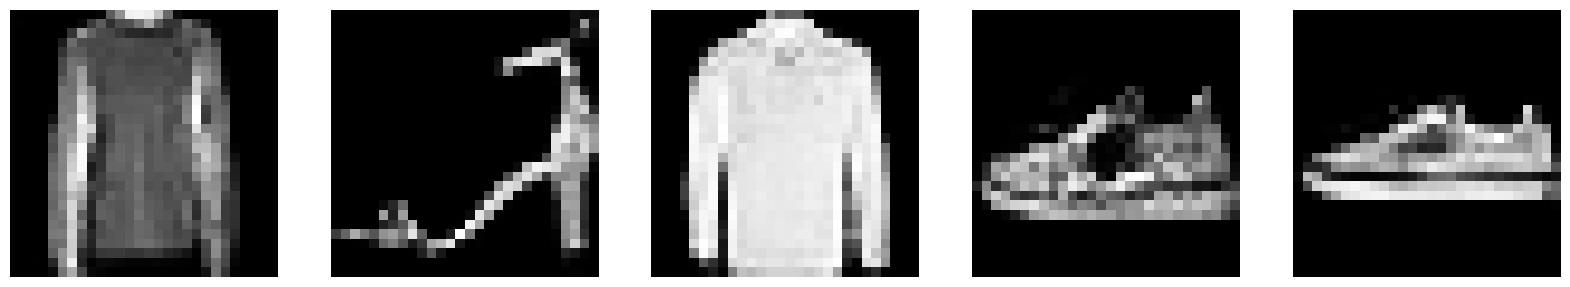

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 400ms/step - d_loss: 1.3763 - g_loss: 0.8029
Epoch 201/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3761 - g_loss: 0.8030

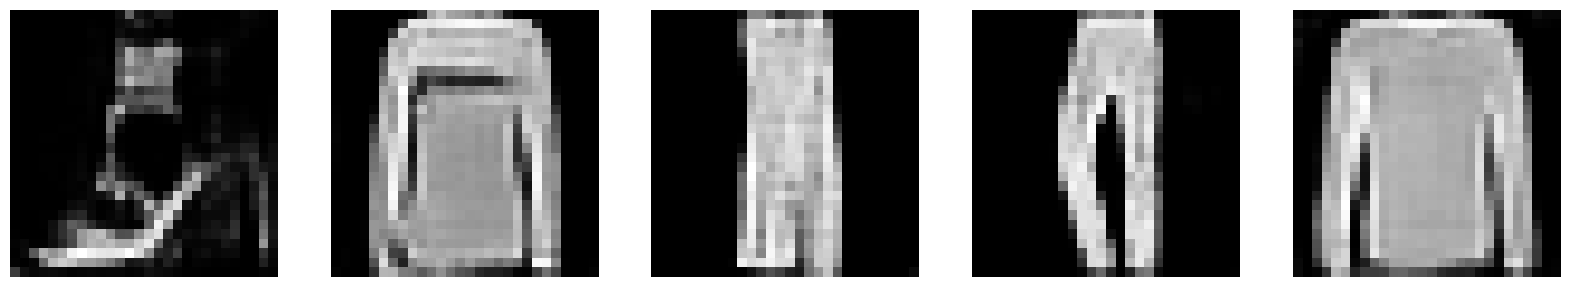

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3761 - g_loss: 0.8030
Epoch 202/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - d_loss: 1.3761 - g_loss: 0.8038

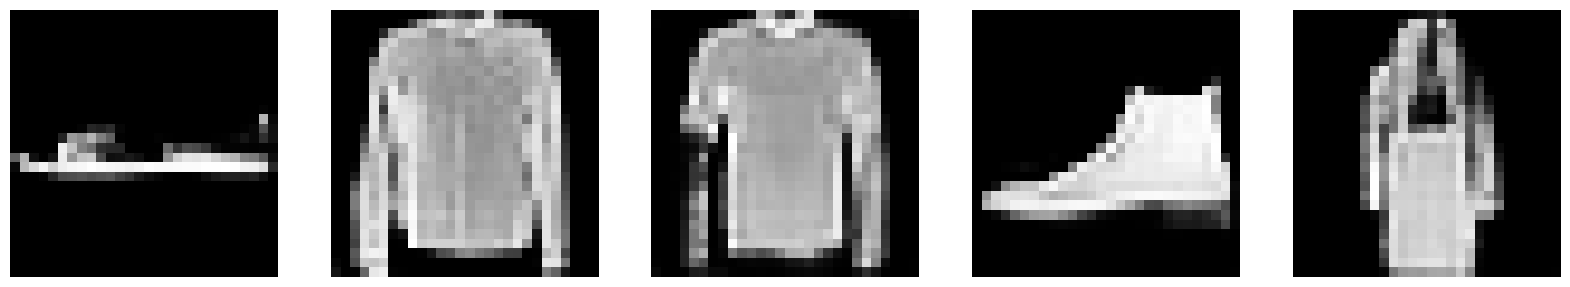

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 402ms/step - d_loss: 1.3761 - g_loss: 0.8038
Epoch 203/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8023

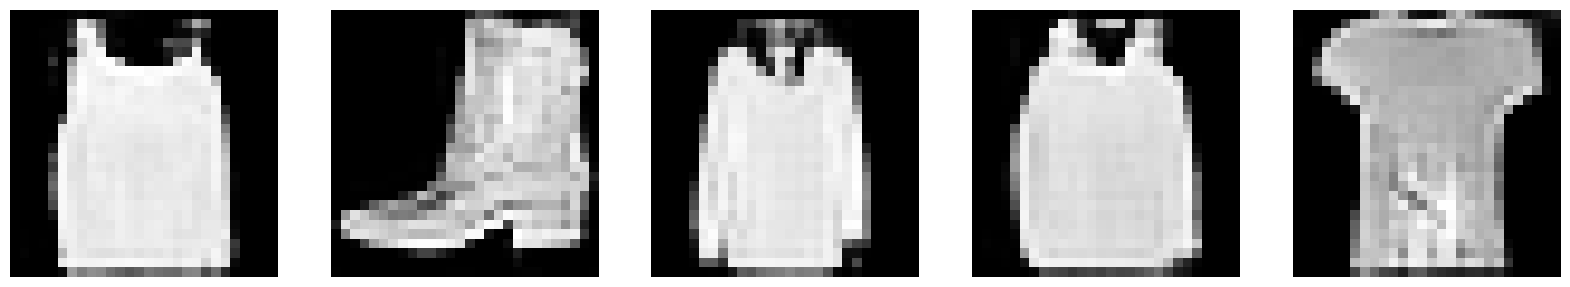

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8023
Epoch 204/400
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - d_loss: 1.3764 - g_loss: 0.8026

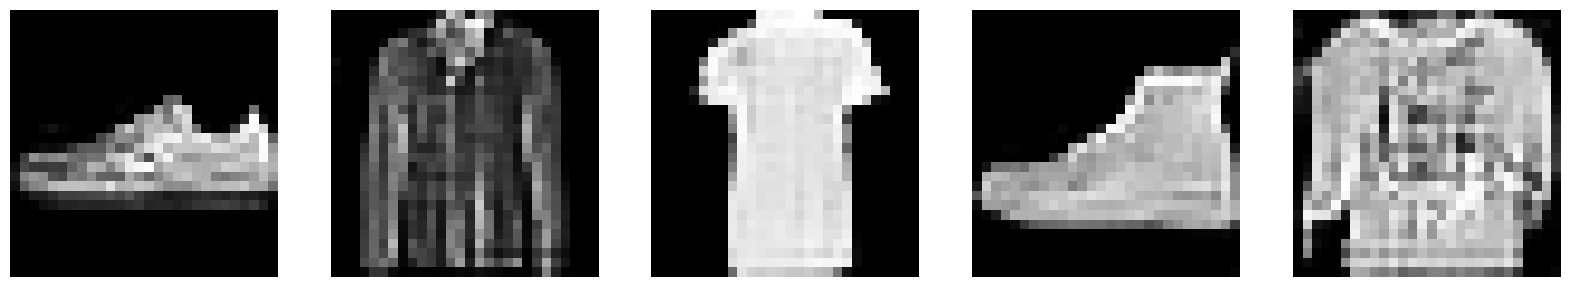

235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 401ms/step - d_loss: 1.3764 - g_loss: 0.8026
Epoch 205/400
158/235 ━━━━━━━━━━━━━━━━━━━━ 30s 402ms/step - d_loss: 1.3762 - g_loss: 0.8025

In [ ]:
class myGan(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.g = generator()
        self.d = discriminator()

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        real_images = batch
        batch_size = tf.shape(batch)[0]
        noise = tf.random.normal((batch_size, 128))
        fake_images = self.g(noise, training=False)

        #discriminator training
        with tf.GradientTape() as d_tape:
            yhat_real = self.d(real_images, training=True)
            yhat_fake = self.d(fake_images, training=True)

            
            real_labels = tf.ones_like(yhat_real) * 0.9
            fake_labels = tf.zeros_like(yhat_fake)
            total_d_loss = self.d_loss(real_labels, yhat_real) + self.d_loss(fake_labels, yhat_fake)

        d_grad = d_tape.gradient(total_d_loss, self.d.trainable_variables)
        self.d_opt.apply_gradients(zip(d_grad, self.d.trainable_variables))

        #generator training
        with tf.GradientTape() as g_tape:
            noise = tf.random.normal((batch_size, 128))
            gen_images = self.g(noise, training=True)
            predicted_labels = self.d(gen_images, training=False)
            total_g_loss = self.g_loss(tf.ones_like(predicted_labels), predicted_labels)

        g_grad = g_tape.gradient(total_g_loss, self.g.trainable_variables)
        self.g_opt.apply_gradients(zip(g_grad, self.g.trainable_variables))

        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

g_opt = Adam(learning_rate=0.0001, beta_1=0.5)
d_opt = Adam(learning_rate=0.00005, beta_1=0.5)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


mygan = myGan(generator, discriminator)
mygan.compile(g_opt, d_opt, g_loss, d_loss)

class ModelMonitor(tf.keras.callbacks.Callback):
    def __init__(self, num_img=5, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        os.makedirs("images", exist_ok=True)
        os.makedirs("models", exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):

        latent_vec = tf.random.normal((self.num_img, self.latent_dim))
        gen_img = self.model.g(latent_vec)
        gen_img = (gen_img * 255).numpy()


        fig, ax = plt.subplots(1, self.num_img, figsize=(20, 20))
        for i in range(self.num_img):
            ax[i].imshow(gen_img[i].squeeze(), cmap='gray')
            ax[i].axis('off')
        plt.show()


        self.model.g.save(f"models/generator_epoch_{epoch + 1}.h5")
        self.model.d.save(f"models/discriminator_epoch_{epoch + 1}.h5")


monitor = ModelMonitor(num_img=5) 
history = mygan.fit(ds, epochs=400, callbacks=[monitor])


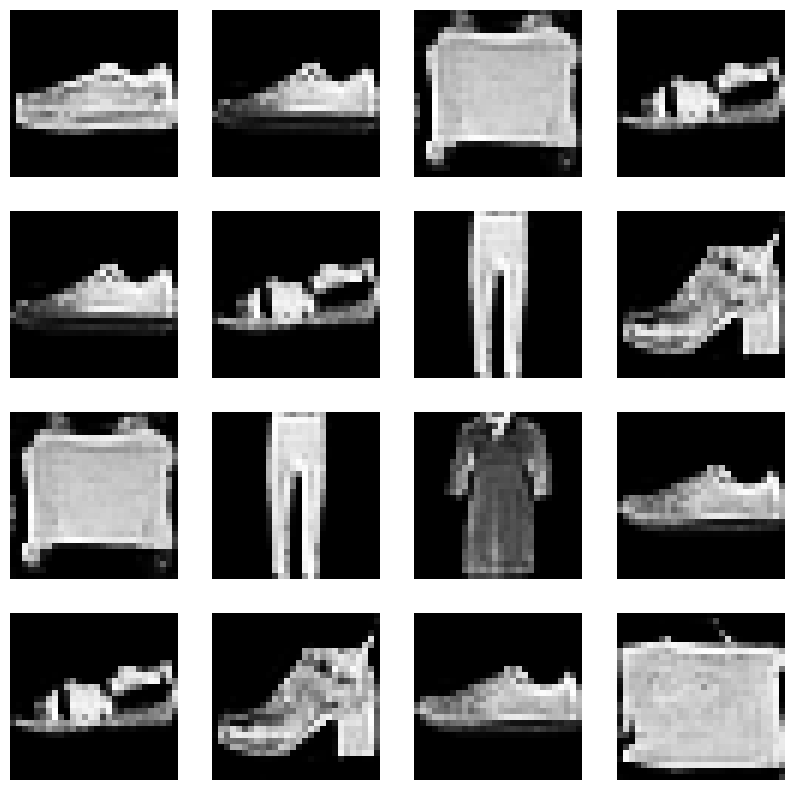

In [24]:
from tensorflow.keras.models import load_model

generator = load_model('/kaggle/input/testgan/keras/default/1/generator_epoch_204.h5')

num_img = 20 
random_latent_vectors = tf.random.normal((num_img, 128))
imgs = generator(random_latent_vectors)

fig, ax = plt.subplots(4,4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1], cmap='gray')
        ax[r][c].axis('off')
plt.show()